# Features engineer

📘 Reading X1 ...
📘 Reading X2 ...
📘 Reading X3 ...

✅ Total merged shape: (54804, 680)
🔢 Feature matrix shape: (54804, 672)

🚀 Fitting UMAP model ...


/opt/anaconda3/envs/ml4g_project1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


✅ UMAP embedding done.
💾 Saved UMAP model → ../preprocessed_data/reference/umap_models_20/umap_logzscore_model.joblib


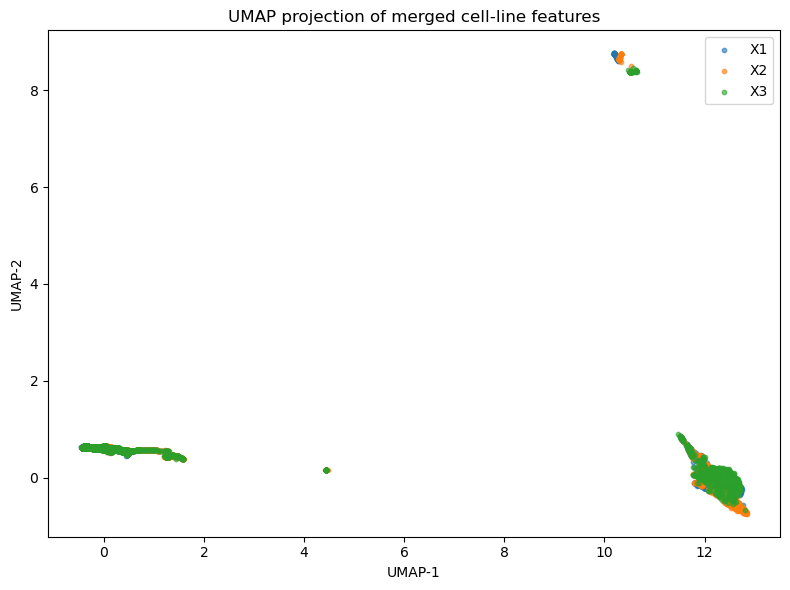

In [13]:
import os
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import joblib  # 用於模型存取

# ============================================================
# ⚙️ 基本設定
# ============================================================
files = [
    "../preprocessed_data/reference/1. merged data/without_y/X1_all_logzscore_logzscore.tsv",
    "../preprocessed_data/reference/1. merged data/without_y/X2_all_logzscore_logzscore.tsv",
    "../preprocessed_data/reference/1. merged data/without_y/X3_all_logzscore_logzscore.tsv"
]

META_COLS = [
    "gene_name", "chr", "gene_start", "gene_end",
    "TSS_start", "TSS_end", "strand"
]

# UMAP 模型與結果存放目錄
model_dir = "../preprocessed_data/reference/umap_models_20"
os.makedirs(model_dir, exist_ok=True)

# ============================================================
# 🧬 讀取與合併
# ============================================================
dfs = []
for path in files:
    cell_name = os.path.basename(path).split("_")[0]  # e.g., X1
    print(f"📘 Reading {cell_name} ...")
    df = pd.read_csv(path, sep="\t")
    df["cell"] = cell_name
    dfs.append(df)

df_all = pd.concat(dfs, axis=0, ignore_index=True)
print(f"\n✅ Total merged shape: {df_all.shape}")

# ============================================================
# 🔍 特徵矩陣準備
# ============================================================
feature_cols = [c for c in df_all.columns if c not in META_COLS + ["cell"]]
X = df_all[feature_cols].fillna(0.0).to_numpy()
print(f"🔢 Feature matrix shape: {X.shape}")

# ============================================================
# 🌈 UMAP 降維
# ============================================================
reducer = umap.UMAP(
    n_neighbors=30,
    min_dist=0.1,
    metric="cosine",
    random_state=42,
    n_components=20
)

print("\n🚀 Fitting UMAP model ...")
embedding = reducer.fit_transform(X)
print("✅ UMAP embedding done.")

# ============================================================
# 💾 儲存模型與結果
# ============================================================
# 1️⃣ 儲存模型
model_path = os.path.join(model_dir, "umap_logzscore_model.joblib")
joblib.dump(reducer, model_path)
print(f"💾 Saved UMAP model → {model_path}")

# 2️⃣ 儲存投影座標
df_umap = df_all[META_COLS + ["cell"]].copy()
df_umap["UMAP1"] = embedding[:, 0]
df_umap["UMAP2"] = embedding[:, 1]


# ============================================================
# 📊 可視化
# ============================================================
plt.figure(figsize=(8, 6))
for cell in sorted(df_all["cell"].unique()):
    idx = df_all["cell"] == cell
    plt.scatter(
        embedding[idx, 0], embedding[idx, 1],
        s=10, alpha=0.6, label=cell
    )

plt.title("UMAP projection of merged cell-line features")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_77823/1434198033.py:19: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_77823/1434198033.py:19: UserWarning: Glyph 32622 (\N{CJK UNIFIED IDEOGRAPH-7F6E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_77823/1434198033.py:19: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_77823/1434198033.py:19: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7g/j5s0yzcj34l3v043s7znkplc0000gn/T/ipykernel_77823/1434198033.py:19: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


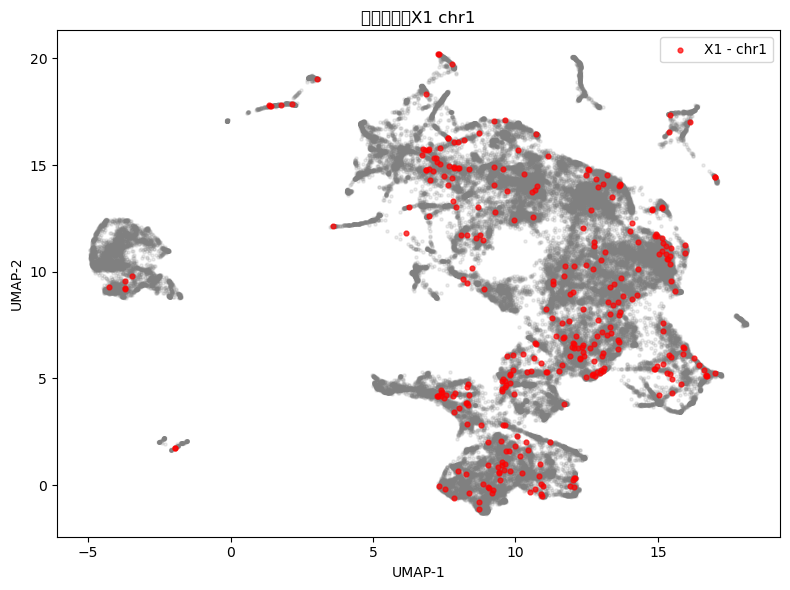

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# 淡灰：其他點
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, alpha=0.15, color="gray")

# 紅色：X1 chr1 的點
mask = (df_all["cell"] == "X2") & (df_all["chr"] == "chr13")
plt.scatter(
    embedding[mask, 0], embedding[mask, 1],
    s=12, color="red", alpha=0.7, label="X1 - chr1"
)

plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.title("位置分布：X1 chr1")
plt.legend()
plt.tight_layout()
plt.show()


✅ Total merged shape: (54804, 680)
🔢 Feature matrix: (54804, 672)


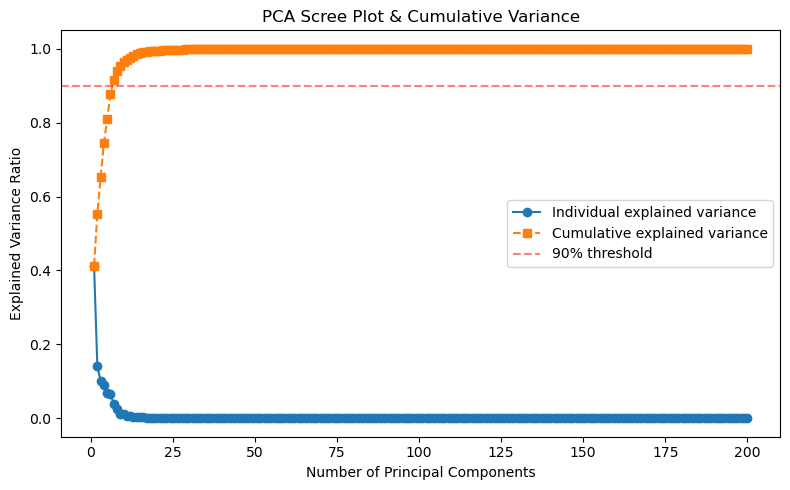

✅ 建議保留維度數: 7 (可解釋 90.0% 的變異)


In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ============================================================
# ⚙️ 基本設定
# ============================================================
files = [
    "../preprocessed_data/reference/1. merged data/without_y/X1_all_logzscore_logzscore.tsv",
    "../preprocessed_data/reference/1. merged data/without_y/X2_all_logzscore_logzscore.tsv",
    "../preprocessed_data/reference/1. merged data/without_y/X3_all_logzscore_logzscore.tsv"
]

META_COLS = [
    "gene_name", "chr", "gene_start", "gene_end",
    "TSS_start", "TSS_end", "strand"
]

# ============================================================
# 🧬 讀取與合併
# ============================================================
dfs = []
for path in files:
    cell_name = os.path.basename(path).split("_")[0]
    df = pd.read_csv(path, sep="\t")
    df["cell"] = cell_name
    dfs.append(df)

df_all = pd.concat(dfs, axis=0, ignore_index=True)
print(f"✅ Total merged shape: {df_all.shape}")

# ============================================================
# 🔍 特徵矩陣
# ============================================================
feature_cols = [c for c in df_all.columns if c not in META_COLS + ["cell"]]
X = df_all[feature_cols].fillna(0.0).to_numpy()
print(f"🔢 Feature matrix: {X.shape}")

# ============================================================
# 🧠 PCA 分析
# ============================================================
pca = PCA(n_components=min(200, X.shape[1]))  # 降到最多 200 維看趨勢
pca.fit(X)

explained_var_ratio = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var_ratio)

# ============================================================
# 📈 Scree Plot
# ============================================================
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var_ratio)+1), explained_var_ratio, 'o-', label="Individual explained variance")
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, 's--', label="Cumulative explained variance")
plt.axhline(y=0.9, color='r', linestyle='--', alpha=0.5, label="90% threshold")
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Scree Plot & Cumulative Variance")
plt.legend()
plt.tight_layout()
plt.show()

# ============================================================
# 🔢 自動顯示建議維度
# ============================================================
target_variance = 0.9
n_components_optimal = np.argmax(cumulative_var >= target_variance) + 1
print(f"✅ 建議保留維度數: {n_components_optimal} (可解釋 {target_variance*100:.1f}% 的變異)")


In [3]:
import os
import pandas as pd

X1 = pd.read_csv("../preprocessed_data/reference/0. raw_data/raw_bed/X1_with_allMarks_raw.tsv", sep="\t")
X2 = pd.read_csv("../preprocessed_data/reference/0. raw_data/raw_bed/X2_with_allMarks_raw.tsv", sep="\t")
X3 = pd.read_csv("../preprocessed_data/reference/0. raw_data/raw_bed/X3_with_allMarks_raw.tsv", sep="\t")

meta_cols = ["gene_name","chr","gene_start","gene_end","TSS_start","TSS_end","strand"]

X1_qn, X2_qn, X3_qn = quantile_normalize_across([X1, X2, X3], meta_cols)

output_path = "../preprocessed_data/reference/1. quantile_normalized/bed/"
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# 儲存結果
X1_qn.to_csv(f"{output_path}X1_bed_qn.tsv", sep="\t", index=False)
X2_qn.to_csv(f"{output_path}X2_bed_qn.tsv", sep="\t", index=False)
X3_qn.to_csv(f"{output_path}X3_bed_qn.tsv", sep="\t", index=False)


🧩 Performing quantile normalization on 3 datasets, each with 18268 rows and 350 features


In [4]:
import os
import pandas as pd

# ============================================================
#                  基本設定
# ============================================================
base_dir = "../preprocessed_data/reference/1. quantile_normalized"
bed_dir = os.path.join(base_dir, "bed")
bw_dir = os.path.join(base_dir, "bigwig")
output_dir = base_dir  # 合併輸出在這層
os.makedirs(output_dir, exist_ok=True)

cells = ["X1", "X2", "X3"]

# 要去除的欄位
drop_cols = ["chr", "gene_start", "gene_end", "TSS_start", "TSS_end", "strand"]

# ============================================================
#                  逐 cell line 合併
# ============================================================
for cell in cells:
    bed_path = os.path.join(bed_dir, f"{cell}_bed_qn.tsv")
    bw_path = os.path.join(bw_dir, f"{cell}_bigwig_qn.tsv")
    out_path = os.path.join(output_dir, f"{cell}_all_qn.tsv")

    print(f"\n=== 🧬 {cell}: merging quantile-normalized bed + bigwig ===")

    if not os.path.exists(bed_path):
        print(f"⚠️ Missing bed file: {bed_path}")
        continue
    if not os.path.exists(bw_path):
        print(f"⚠️ Missing bigwig file: {bw_path}")
        continue

    # --- 讀取 ---
    df_bed = pd.read_csv(bed_path, sep="\t")
    df_bw = pd.read_csv(bw_path, sep="\t")

    if "gene_name" not in df_bed.columns or "gene_name" not in df_bw.columns:
        raise ValueError(f"❌ Missing 'gene_name' column in {cell}")

    print(f"📘 Loaded bed={df_bed.shape}, bigwig={df_bw.shape}")

    # --- 去掉不需要的欄位 ---
    keep_cols = [c for c in df_bed.columns if c not in drop_cols]
    df_bed = df_bed[keep_cols]

    # --- 合併 ---
    df_merged = pd.merge(df_bed, df_bw, on="gene_name", how="outer")
    print(f"✅ Merged shape: {df_merged.shape}")

    # --- 儲存 ---
    df_merged.to_csv(out_path, sep="\t", index=False)
    print(f"💾 Saved → {out_path}")



=== 🧬 X1: merging quantile-normalized bed + bigwig ===
📘 Loaded bed=(18268, 357), bigwig=(18268, 175)
✅ Merged shape: (18268, 525)
💾 Saved → ../preprocessed_data/reference/1. quantile_normalized/X1_all_qn.tsv

=== 🧬 X2: merging quantile-normalized bed + bigwig ===
📘 Loaded bed=(18268, 357), bigwig=(18268, 175)
✅ Merged shape: (18268, 525)
💾 Saved → ../preprocessed_data/reference/1. quantile_normalized/X2_all_qn.tsv

=== 🧬 X3: merging quantile-normalized bed + bigwig ===
📘 Loaded bed=(18268, 357), bigwig=(18268, 175)
✅ Merged shape: (18268, 525)
💾 Saved → ../preprocessed_data/reference/1. quantile_normalized/X3_all_qn.tsv


In [5]:
import os
import pandas as pd

# ============================================================
#                  基本設定
# ============================================================
raw_dir = "../preprocessed_data/reference/0. raw_data"
qn_dir = "../preprocessed_data/reference/1. quantile_normalized"
output_dir = "../preprocessed_data/reference/1. quantile_normalized"
os.makedirs(output_dir, exist_ok=True)

cells = ["X1", "X2"]

# ============================================================
#                  主流程
# ============================================================
for cell in cells:
    y_path = os.path.join(raw_dir, f"{cell}_y.tsv")
    qn_path = os.path.join(qn_dir, f"{cell}_all_qn.tsv")
    out_path = os.path.join(output_dir, f"{cell}_all_qn_with_y.tsv")

    print(f"\n=== 🧬 {cell}: dense normalized rank (0–1) + merge with QN ===")

    if not os.path.exists(y_path):
        print(f"⚠️ Missing Y file: {y_path}")
        continue
    if not os.path.exists(qn_path):
        print(f"⚠️ Missing QN file: {qn_path}")
        continue

    # --- 讀取 ---
    df_y = pd.read_csv(y_path, sep="\t")
    df_qn = pd.read_csv(qn_path, sep="\t")

    if "gene_name" not in df_y.columns or "gene_name" not in df_qn.columns:
        raise ValueError(f"❌ Missing 'gene_name' column in {cell}")
    if "gex" not in df_y.columns:
        raise ValueError(f"❌ Missing 'gex' column in {cell}_y.tsv")

    print(f"📘 Loaded y={df_y.shape}, qn={df_qn.shape}")

    # --- AVERAGE rank: normalize to [0,1], higher gex = higher rank ---
    n_unique = df_y["gex"].nunique()
    df_y["rank_global"] = df_y["gex"].rank(method="average", ascending=True)
    df_y["rank_global"] = (df_y["rank_global"] - 1) / (df_y["rank_global"].max() - 1)

    if "chr" in df_y.columns:
        df_y["rank_chr"] = df_y.groupby("chr")["gex"].rank(method="average", ascending=True)
        df_y["rank_chr"] = df_y.groupby("chr")["rank_chr"].transform(
            lambda x: (x - 1) / (x.max() - 1) if x.max() > 1 else 0
        )
    else:
        print("⚠️ No 'chr' column found in y file — using global rank for rank_chr")
        df_y["rank_chr"] = df_y["rank_global"]

    # --- 合併 ---
    df_merged = pd.merge(df_qn, df_y, on="gene_name", how="left")
    df_merged = df_merged.fillna(0.0)

    # --- 排序輸出 ---
    df_merged = df_merged.sort_values("gene_name").reset_index(drop=True)

    print(f"✅ Merged shape: {df_merged.shape}")
    df_merged.to_csv(out_path, sep="\t", index=False)
    print(f"💾 Saved → {out_path}")



=== 🧬 X1: dense normalized rank (0–1) + merge with QN ===
📘 Loaded y=(16284, 2), qn=(18268, 525)
⚠️ No 'chr' column found in y file — using global rank for rank_chr
✅ Merged shape: (18268, 528)
💾 Saved → ../preprocessed_data/reference/1. quantile_normalized/X1_all_qn_with_y.tsv

=== 🧬 X2: dense normalized rank (0–1) + merge with QN ===
📘 Loaded y=(16284, 2), qn=(18268, 525)
⚠️ No 'chr' column found in y file — using global rank for rank_chr
✅ Merged shape: (18268, 528)
💾 Saved → ../preprocessed_data/reference/1. quantile_normalized/X2_all_qn_with_y.tsv


In [ ]:
df_train_full['rank_global']

0        11560.5
1        11560.5
2        11560.5
3        11560.5
4            0.0
          ...   
18263        0.0
18264        0.0
18265     5742.0
18266    11560.5
18267        0.0
Name: rank_global, Length: 18268, dtype: float64

In [12]:
df_train_full

,gene_name,chr,gene_start,gene_end,TSS_start,TSS_end,strand,gex_x,rank_global_x,rank_chr_x,...,DNase_gene_min_score_global_rank,DNase_gene_sum_score_global_rank,DNase_tss_mean_score_global_rank,DNase_tss_std_score_global_rank,DNase_tss_max_score_global_rank,DNase_tss_min_score_global_rank,DNase_tss_sum_score_global_rank,gex_y,rank_global_y,rank_chr_y
0,A1BG,chr19,58345178,58353492,58353079,58353129,-,0.0,0.0,0.0,...,0.500031,0.500031,0.500031,0.500031,0.500031,0.500031,0.500031,0.000000,0.290088,0.290088
1,A1CF,chr10,50799409,50885675,50828411,50828461,-,0.0,0.0,0.0,...,0.500031,0.500031,0.500031,0.500031,0.500031,0.500031,0.500031,0.000000,0.290088,0.290088
2,A2M,chr12,9067664,9116229,9106246,9106296,-,0.0,0.0,0.0,...,0.500031,0.500031,0.500031,0.500031,0.500031,0.500031,0.500031,0.000000,0.290088,0.290088
3,A2ML1,chr12,8822621,8887001,8822471,8845003,+,0.0,0.0,0.0,...,0.500031,0.500031,0.500031,0.500031,0.500031,0.500031,0.500031,0.000000,0.290088,0.290088
4,A4GALT,chr22,42692121,42721298,42695583,42721298,-,0.0,0.0,0.0,...,0.500031,0.500031,0.500031,0.500031,0.500031,0.500031,0.500031,0.000000,0.290088,0.290088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16279,ZWILCH,chr15,66504959,66550130,66505294,66505344,+,0.0,0.0,0.0,...,0.500031,0.500031,0.500031,0.500031,0.500031,0.500031,0.500031,138.153963,0.924584,0.924584
16280,ZWINT,chr10,56357227,56361273,56359708,56359758,-,0.0,0.0,0.0,...,0.500031,0.500031,0.500031,0.500031,0.500031,0.500031,0.500031,16.145994,0.787601,0.787601
16281,ZXDC,chr3,126437601,126475891,126475869,126475919,-,0.0,0.0,0.0,...,0.500031,0.500031,0.500031,0.500031,0.500031,0.500031,0.500031,23.834562,0.810907,0.810907
16282,ZYX,chr7,143381295,143391111,143381360,143381410,+,0.0,0.0,0.0,...,0.500031,0.500031,0.500031,0.500031,0.500031,0.500031,0.500031,1.057178,0.647424,0.647424


In [ ]:
import os
import json
import random
import pickle   # ✅ 新增
import pandas as pd
import numpy as np
import lightgbm as lgb
from scipy.stats import spearmanr
from datetime import datetime

# ============================================================
#                  GLOBAL REPRODUCIBILITY
# ============================================================
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
print(f"🔒 Global seed set to {SEED}")

# ============================================================
#                  EXPERIMENT CONFIGURATION
# ============================================================
EXPERIMENT_DIR = "../results/lgbm/reference/qn_pruned/"
TRAIN_PATH = "../preprocessed_data/reference/2. features_engineered_selected/X1_all_features_with_bed_pruned_and_y.tsv"
VAL_PATH   = "../preprocessed_data/reference/2. features_engineered_selected/X2_all_features_with_bed_pruned_and_y.tsv"

META_COLS = ["gene_name", "chr", "gene_start", "gene_end",
             "TSS_start", "TSS_end", "strand", "gex", "rank_global", "rank_chr"]
TARGET_COL = "rank_global"

os.makedirs(EXPERIMENT_DIR, exist_ok=True)
LOG_PATH = os.path.join(EXPERIMENT_DIR, "log.txt")

# ✅ 如果已有舊的 log.txt，直接覆蓋（清空）
with open(LOG_PATH, "w") as f:
    f.write("")  # 或寫入 header，如 "==== New Experiment ====\n"

def log(msg):
    """同時印出並寫入 log.txt"""
    print(msg)
    with open(LOG_PATH, "a") as f:
        f.write(f"{msg}\n")


log(f"🚀 Experiment started at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
log(f"Experiment directory: {EXPERIMENT_DIR}")

# ============================================================
#                  DATA LOADING
# ============================================================
df_train_full = pd.read_csv(TRAIN_PATH, sep="\t")
df_val_full   = pd.read_csv(VAL_PATH, sep="\t")

# ============================================================
# 🚫 去除 chr1
# ============================================================
before_train = len(df_train_full)
before_val = len(df_val_full)

df_train_full = df_train_full[df_train_full["chr"] != "chr1"].reset_index(drop=True)
df_val_full   = df_val_full[df_val_full["chr"] != "chr1"].reset_index(drop=True)

print(f"🧹 Removed chr1 → train: {before_train} → {len(df_train_full)}, val: {before_val} → {len(df_val_full)}")

feature_cols = [c for c in df_train_full.columns if c not in META_COLS]
log(f"Feature count: {len(feature_cols)}")

# ============================================================
#                  K-FOLD DEFINITION
# ============================================================
chromosomes = [f"chr{i}" for i in range(2, 23)]
folds = [chromosomes[i::5] for i in range(5)]

log("🧩 Chromosome folds:")
for i, fset in enumerate(folds):
    log(f"Fold {i+1}: {fset}")

# ============================================================
#                  LIGHTGBM PARAMETERS
# ============================================================
params = {'verbose': -1,
    'boosting_type': 'gbdt', 'learning_rate': 0.016676974956976915, 'num_leaves': 48, 'max_depth': 8, 'feature_fraction': 0.64561553423692, 'bagging_fraction': 0.8113835038425429, 'bagging_freq': 6, 'lambda_l1': 0.3316673054635859, 'lambda_l2': 0.8969317795206216, 'min_gain_to_split': 0.04923442843722911, 'min_data_in_leaf': 38}


# ============================================================
#                  SAVE CONFIG
# ============================================================
config = {
    "train_path": TRAIN_PATH,
    "val_path": VAL_PATH,
    "seed": SEED,
    "params": params,
    "folds": folds,
    "target_col": TARGET_COL,
}
with open(os.path.join(EXPERIMENT_DIR, "config.json"), "w") as f:
    json.dump(config, f, indent=4)

# ============================================================
#                  TRAINING
# ============================================================
results = []
preds_all = []

for fold_idx, val_chrs in enumerate(folds):
    log(f"\n🚀 Fold {fold_idx+1}/{len(folds)} | Val chromosomes: {val_chrs}")
    fold_dir = os.path.join(EXPERIMENT_DIR, f"fold_{fold_idx+1}")
    os.makedirs(fold_dir, exist_ok=True)

    # Split
    train_chrs = [c for c in chromosomes if c not in val_chrs]
    df_train = df_train_full[df_train_full["chr"].isin(train_chrs)].copy()
    df_val   = df_val_full[df_val_full["chr"].isin(val_chrs)].copy()

    df_val = df_val.reset_index().rename(columns={"index": "orig_idx"})

    X_train, y_train = df_train[feature_cols], df_train[TARGET_COL]
    X_val, y_val     = df_val[feature_cols], df_val[TARGET_COL]

    dtrain = lgb.Dataset(X_train, label=y_train)
    dval   = lgb.Dataset(X_val, label=y_val, reference=dtrain)

    model = lgb.train(
        params,
        dtrain,
        valid_sets=[dtrain, dval],
        valid_names=["train", "val"],
        num_boost_round=2000,
        callbacks=[
            lgb.early_stopping(stopping_rounds=100),
            lgb.log_evaluation(period=200)
        ],
    )

    # Save model (.pkl)
    model_path = os.path.join(fold_dir, "model.pkl")
    with open(model_path, "wb") as f:
        pickle.dump(model, f)
    log(f"💾 Model saved: {model_path}")

    # Predict
    df_val["predicted_gex_rank"] = model.predict(X_val, num_iteration=model.best_iteration)
    df_val["fold_id"] = fold_idx + 1

    preds_all.append(df_val[["orig_idx", "gene_name", "predicted_gex_rank", "fold_id"]])

    # ============================================================
    # EVALUATION: Spearman vs rank_global & rank_chr
    # ============================================================
    rho_global = spearmanr(df_val["rank_global"], df_val["predicted_gex_rank"])[0]
    rho_chr_rank = spearmanr(df_val["rank_chr"], df_val["predicted_gex_rank"])[0]

    log(f"📈 Fold {fold_idx+1} Spearman ρ (global) = {rho_global:.4f}")
    log(f"📉 Fold {fold_idx+1} Spearman ρ (chr_rank) = {rho_chr_rank:.4f}")
    log("📊 Per-Chromosome Spearman (vs rank_global):")

    chr_corrs = []
    for chrom, subdf in df_val.groupby("chr"):
        if len(subdf) < 2:
            continue
        rho = spearmanr(subdf["rank_global"], subdf["predicted_gex_rank"])[0]
        chr_corrs.append({"chr": chrom, "spearman": rho})
        log(f"   {chrom:<6s}: ρ = {rho:.4f}")

    results.append({
        "fold": fold_idx + 1,
        "val_chr": val_chrs,
        "spearman_global": rho_global,
        "spearman_chr_rank": rho_chr_rank,
        "per_chr": chr_corrs
    })

# ============================================================
#                  SAVE PREDICTIONS & SUMMARY
# ============================================================

# ============================================================
# 🔁 合併並依照原始順序還原
# ============================================================
df_preds_all = pd.concat(preds_all, ignore_index=True)
df_preds_all = df_preds_all.sort_values("orig_idx").reset_index(drop=True)

# 驗證對齊
assert len(df_preds_all) == len(df_val_full)
assert (df_preds_all["gene_name"].values == df_val_full["gene_name"].values).all(), \
    "❌ Prediction order mismatch with df_val_full!"

# ✅ 輸出只有 gene_name + predicted_gex_rank
df_preds_all[["gene_name", "predicted_gex_rank"]].to_csv(
    os.path.join(EXPERIMENT_DIR, "predict_val.tsv"), sep="\t", index=False
)
log("💾 Final predictions (aligned) saved (predict_val.tsv)")

# ✅ 全域 Spearman：用原始 df_val_full 的真值 vs 你的預測
overall_val_spearman = spearmanr(
    df_val_full["rank_global"], 
    df_preds_all["predicted_gex_rank"]
)[0]
log(f"🌍 Overall validation Spearman (aligned) = {overall_val_spearman:.4f}")



summary_fold = pd.DataFrame([
    {"fold": r["fold"], "val_chr": ",".join(r["val_chr"]), "overall_spearman": r["overall_spearman"]}
    for r in results
])

chr_rows = []
for r in results:
    for c in r["per_chr"]:
        chr_rows.append({"fold": r["fold"], "chr": c["chr"], "spearman": c["spearman"]})
summary_chr = pd.DataFrame(chr_rows)

chr_mean = summary_chr.groupby("chr", as_index=False)["spearman"].mean()
chr_mean.rename(columns={"spearman": "mean_spearman"}, inplace=True)

# summary_output = summary_fold.merge(chr_mean, how="cross")
# summary_output.to_csv(os.path.join(EXPERIMENT_DIR, "summary.tsv"), sep="\t", index=False)

# log("💾 Summary saved (summary.tsv)")
log(f"Mean Spearman (across folds): {summary_fold['overall_spearman'].mean():.4f}")
log(f"Overall mean of per-chromosome means: {chr_mean['mean_spearman'].mean():.4f}")

log(f"\n✅ Experiment finished at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


🔒 Global seed set to 42
🚀 Experiment started at 2025-10-16 01:22:47
Experiment directory: ../results/lgbm/reference/logzscore_logzscore/
🧹 Removed chr1 → train: 16284 → 16284, val: 16284 → 16284
Feature count: 672
🧩 Chromosome folds:
Fold 1: ['chr2', 'chr7', 'chr12', 'chr17', 'chr22']
Fold 2: ['chr3', 'chr8', 'chr13', 'chr18']
Fold 3: ['chr4', 'chr9', 'chr14', 'chr19']
Fold 4: ['chr5', 'chr10', 'chr15', 'chr20']
Fold 5: ['chr6', 'chr11', 'chr16', 'chr21']

🚀 Fold 1/5 | Val chromosomes: ['chr2', 'chr7', 'chr12', 'chr17', 'chr22']
Training until validation scores don't improve for 100 rounds
[200]	train's l2: 0.0147257	val's l2: 0.0297021
[400]	train's l2: 0.0122484	val's l2: 0.0293314
Early stopping, best iteration is:
[379]	train's l2: 0.0123658	val's l2: 0.0291607
💾 Model saved: ../results/lgbm/reference/logzscore_logzscore/fold_1/model.pkl
📈 Fold 1 Spearman ρ (global) = 0.7701
📊 Per-Chromosome Spearman (vs rank_global):
   chr12 : ρ = 0.7808
   chr17 : ρ = 0.7667
   chr2  : ρ = 0.753

KeyError: 'overall_spearman'

In [24]:
import optuna
import lightgbm as lgb
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import warnings, json, os, random
warnings.filterwarnings("ignore")

# ============================================================
#                  CONFIGURATION
# ============================================================
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

TRAIN_PATH = "../preprocessed_data/CAGE-merged/4. features selection/X1_all_rank_features_pruned.tsv"
VAL_PATH   = "../preprocessed_data/CAGE-merged/4. features selection/X2_all_rank_features_pruned.tsv"

META_COLS = ["gene_name", "chr", "gene_start", "gene_end",
             "TSS_start", "TSS_end", "strand", "gex", "gex_rank"]
TARGET_COL = "gex_rank"

# ============================================================
#                  LOAD DATA
# ============================================================
df_train = pd.read_csv(TRAIN_PATH, sep="\t")
df_val   = pd.read_csv(VAL_PATH, sep="\t")

# 合併訓練 + 驗證作為整體 pool（我們會從中抽 chr）
df_all = pd.concat([df_train, df_val], ignore_index=True)
chromosomes = sorted(df_all["chr"].unique())

print(f"🧬 Total chromosomes in dataset: {chromosomes}")
print(f"Total samples: {len(df_all):,}")

feature_cols = [c for c in df_all.columns if c not in META_COLS]

# ============================================================
#                  OBJECTIVE FUNCTION
# ============================================================
def objective(trial):
    """Optuna optimization objective for LightGBM hyperparameters"""

    # 1️⃣ 隨機抽取 4 個 chromosome 當 validation
    # 為每個 trial 建立獨立的隨機種子（可重現）
    rng = random.Random(SEED)
    val_chrs = rng.sample(chromosomes, 4)
    train_chrs = [c for c in chromosomes if c not in val_chrs]
    df_train_fold = df_all[df_all["chr"].isin(train_chrs)].copy()
    df_val_fold   = df_all[df_all["chr"].isin(val_chrs)].copy()

    X_train, y_train = df_train_fold[feature_cols], df_train_fold[TARGET_COL]
    X_val, y_val     = df_val_fold[feature_cols], df_val_fold[TARGET_COL]

    # 2️⃣ 定義超參數搜尋空間
    params = {
        "objective": "regression",
        "metric": "rmse",
        "boosting_type": trial.suggest_categorical("boosting_type", ["gbdt", "dart"]),
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.05, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 16, 128, step=8),
        "max_depth": trial.suggest_int("max_depth", -1, 12),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.6, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.5, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "lambda_l1": trial.suggest_float("lambda_l1", 0.0, 1.0),
        "lambda_l2": trial.suggest_float("lambda_l2", 0.0, 2.0),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0.0, 0.05),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 10, 100),
        "verbosity": -1,
        "seed": SEED,
        "deterministic": True,
        "force_row_wise": True,
    }

    # 3️⃣ 訓練模型
    dtrain = lgb.Dataset(X_train, label=y_train)
    dval = lgb.Dataset(X_val, label=y_val, reference=dtrain)

    model = lgb.train(
        params,
        dtrain,
        valid_sets=[dval],
        num_boost_round=3000,
        callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=False)],
    )

    # 4️⃣ 評估 Spearman correlation
    y_pred = model.predict(X_val, num_iteration=model.best_iteration)
    rho_overall = spearmanr(y_val, y_pred)[0]

    # 🔍 也可計算每個 chr 的平均 Spearman（可開啟）
    per_chr_rho = []
    for chrom, subdf in df_val_fold.assign(pred=y_pred).groupby("chr"):
        if len(subdf) > 2:
            per_chr_rho.append(spearmanr(subdf["gex_rank"], subdf["pred"])[0])
    mean_rho = np.nanmean(per_chr_rho)

    # 你可以切換回傳哪個：
    return mean_rho if not np.isnan(mean_rho) else rho_overall


# ============================================================
#                  RUN OPTIMIZATION
# ============================================================
study = optuna.create_study(
    direction="maximize",
    sampler=optuna.samplers.TPESampler(seed=SEED)
)
study.optimize(objective, n_trials=300, show_progress_bar=True)

# ============================================================
#                  SHOW BEST RESULT
# ============================================================
print("✅ Best Spearman:", study.best_value)
print("🏆 Best Parameters:")
for k, v in study.best_params.items():
    print(f"   {k}: {v}")

# ============================================================
#                  SAVE RESULT
# ============================================================
SAVE_DIR = "../results/lgbm/optuna_qn_random4chr"
os.makedirs(SAVE_DIR, exist_ok=True)

study.trials_dataframe().to_csv(os.path.join(SAVE_DIR, "trials_log.csv"), index=False)
with open(os.path.join(SAVE_DIR, "best_params.json"), "w") as f:
    json.dump(study.best_params, f, indent=4)

print(f"💾 Saved best params and log to {SAVE_DIR}")


[I 2025-10-14 00:35:10,754] A new study created in memory with name: no-name-1a41df6d-1e5d-461d-8503-301a45b7d576


🧬 Total chromosomes in dataset: ['chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21', 'chr22', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9']
Total samples: 32,568


Best trial: 0. Best value: 0.715367:   0%|          | 1/300 [00:20<1:42:05, 20.49s/it]

[I 2025-10-14 00:35:31,242] Trial 0 finished with value: 0.7153666975380131 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.026975154833351143, 'num_leaves': 80, 'max_depth': 1, 'feature_fraction': 0.662397808134481, 'bagging_fraction': 0.5290418060840998, 'bagging_freq': 7, 'lambda_l1': 0.6011150117432088, 'lambda_l2': 1.416145155592091, 'min_gain_to_split': 0.0010292247147901223, 'min_data_in_leaf': 98}. Best is trial 0 with value: 0.7153666975380131.


Best trial: 1. Best value: 0.754737:   1%|          | 2/300 [00:34<1:22:38, 16.64s/it]

[I 2025-10-14 00:35:45,184] Trial 1 finished with value: 0.7547368544923448 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007599674150654906, 'num_leaves': 32, 'max_depth': 3, 'feature_fraction': 0.8099025726528951, 'bagging_fraction': 0.7159725093210578, 'bagging_freq': 3, 'lambda_l1': 0.6118528947223795, 'lambda_l2': 0.27898772130408367, 'min_gain_to_split': 0.014607232426760909, 'min_data_in_leaf': 43}. Best is trial 1 with value: 0.7547368544923448.


Best trial: 2. Best value: 0.75688:   1%|          | 3/300 [02:45<5:41:11, 68.93s/it] 

[I 2025-10-14 00:37:56,335] Trial 2 finished with value: 0.7568799198332631 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.007918515779559376, 'num_leaves': 72, 'max_depth': 7, 'feature_fraction': 0.6185801650879991, 'bagging_fraction': 0.8037724259507192, 'bagging_freq': 2, 'lambda_l1': 0.06505159298527952, 'lambda_l2': 1.8977710745066665, 'min_gain_to_split': 0.04828160165372797, 'min_data_in_leaf': 83}. Best is trial 2 with value: 0.7568799198332631.


Best trial: 2. Best value: 0.75688:   1%|▏         | 4/300 [03:02<3:59:11, 48.48s/it]

[I 2025-10-14 00:38:13,482] Trial 3 finished with value: 0.754927019994781 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.024165903162442326, 'num_leaves': 64, 'max_depth': 0, 'feature_fraction': 0.798070764044508, 'bagging_fraction': 0.5171942605576092, 'bagging_freq': 7, 'lambda_l1': 0.2587799816000169, 'lambda_l2': 1.325044568707964, 'min_gain_to_split': 0.015585553804470548, 'min_data_in_leaf': 57}. Best is trial 2 with value: 0.7568799198332631.


Best trial: 2. Best value: 0.75688:   2%|▏         | 5/300 [03:12<2:50:33, 34.69s/it]

[I 2025-10-14 00:38:23,717] Trial 4 finished with value: 0.7568458261056382 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.046618106758907395, 'num_leaves': 104, 'max_depth': 12, 'feature_fraction': 0.9579309401710595, 'bagging_fraction': 0.7989499894055425, 'bagging_freq': 7, 'lambda_l1': 0.0884925020519195, 'lambda_l2': 0.3919657248382904, 'min_gain_to_split': 0.002261364445526903, 'min_data_in_leaf': 39}. Best is trial 2 with value: 0.7568799198332631.


Best trial: 2. Best value: 0.75688:   2%|▏         | 6/300 [03:18<2:01:46, 24.85s/it]

[I 2025-10-14 00:38:29,467] Trial 5 finished with value: 0.7538414894889531 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.033706023053513806, 'num_leaves': 56, 'max_depth': 2, 'feature_fraction': 0.8170784332632994, 'bagging_fraction': 0.5704621124873813, 'bagging_freq': 6, 'lambda_l1': 0.07455064367977082, 'lambda_l2': 1.9737738732010346, 'min_gain_to_split': 0.038612238464832874, 'min_data_in_leaf': 28}. Best is trial 2 with value: 0.7568799198332631.


Best trial: 6. Best value: 0.757612:   2%|▏         | 7/300 [05:55<5:32:37, 68.11s/it]

[I 2025-10-14 00:41:06,649] Trial 6 finished with value: 0.7576116717105731 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.025458179729092763, 'num_leaves': 96, 'max_depth': 9, 'feature_fraction': 0.6296178606936361, 'bagging_fraction': 0.6792328642721364, 'bagging_freq': 1, 'lambda_l1': 0.8631034258755935, 'lambda_l2': 1.2465962536551158, 'min_gain_to_split': 0.01654490124263246, 'min_data_in_leaf': 15}. Best is trial 6 with value: 0.7576116717105731.


Best trial: 7. Best value: 0.759086:   3%|▎         | 8/300 [08:15<7:21:40, 90.76s/it]

[I 2025-10-14 00:43:25,885] Trial 7 finished with value: 0.7590859646080659 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.026827251621760122, 'num_leaves': 88, 'max_depth': 11, 'feature_fraction': 0.7888859700647797, 'bagging_fraction': 0.5597971229691509, 'bagging_freq': 5, 'lambda_l1': 0.7607850486168974, 'lambda_l2': 1.1225543951389925, 'min_gain_to_split': 0.03854835899772805, 'min_data_in_leaf': 54}. Best is trial 7 with value: 0.7590859646080659.


Best trial: 8. Best value: 0.759894:   3%|▎         | 9/300 [08:51<5:56:57, 73.60s/it]

[I 2025-10-14 00:44:01,761] Trial 8 finished with value: 0.7598936681288462 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.005301382389479432, 'num_leaves': 24, 'max_depth': -1, 'feature_fraction': 0.8545641645055122, 'bagging_fraction': 0.6571779905381634, 'bagging_freq': 4, 'lambda_l1': 0.907566473926093, 'lambda_l2': 0.4985844582977499, 'min_gain_to_split': 0.02051914615178149, 'min_data_in_leaf': 78}. Best is trial 8 with value: 0.7598936681288462.


Best trial: 8. Best value: 0.759894:   3%|▎         | 10/300 [09:09<4:33:46, 56.64s/it]

[I 2025-10-14 00:44:20,438] Trial 9 finished with value: 0.7593280898570334 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.009743645106784238, 'num_leaves': 32, 'max_depth': 12, 'feature_fraction': 0.9232481518257668, 'bagging_fraction': 0.8167018782552118, 'bagging_freq': 7, 'lambda_l1': 0.8036720768991145, 'lambda_l2': 0.3731401177720717, 'min_gain_to_split': 0.044627949924498894, 'min_data_in_leaf': 59}. Best is trial 8 with value: 0.7598936681288462.


Best trial: 8. Best value: 0.759894:   4%|▎         | 11/300 [09:39<3:53:08, 48.40s/it]

[I 2025-10-14 00:44:50,159] Trial 10 finished with value: 0.7591914091195334 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0050695240451904405, 'num_leaves': 128, 'max_depth': 5, 'feature_fraction': 0.886067844878718, 'bagging_fraction': 0.9538323976412588, 'bagging_freq': 4, 'lambda_l1': 0.9766771359497862, 'lambda_l2': 0.6695903524464729, 'min_gain_to_split': 0.027585755040565922, 'min_data_in_leaf': 76}. Best is trial 8 with value: 0.7598936681288462.


Best trial: 8. Best value: 0.759894:   4%|▍         | 12/300 [10:00<3:12:17, 40.06s/it]

[I 2025-10-14 00:45:11,143] Trial 11 finished with value: 0.7593655983871537 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01125464824042569, 'num_leaves': 16, 'max_depth': -1, 'feature_fraction': 0.9773778853851628, 'bagging_fraction': 0.9132335190929217, 'bagging_freq': 4, 'lambda_l1': 0.7571262865901494, 'lambda_l2': 0.013906060398697961, 'min_gain_to_split': 0.027207276645573885, 'min_data_in_leaf': 72}. Best is trial 8 with value: 0.7598936681288462.


Best trial: 12. Best value: 0.760453:   4%|▍         | 13/300 [10:21<2:44:50, 34.46s/it]

[I 2025-10-14 00:45:32,718] Trial 12 finished with value: 0.760453201009108 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.014265138162796039, 'num_leaves': 16, 'max_depth': -1, 'feature_fraction': 0.9930899415141673, 'bagging_fraction': 0.9980082658737177, 'bagging_freq': 4, 'lambda_l1': 0.9942460885963612, 'lambda_l2': 0.0036895999588275365, 'min_gain_to_split': 0.026482461330550773, 'min_data_in_leaf': 76}. Best is trial 12 with value: 0.760453201009108.


Best trial: 12. Best value: 0.760453:   5%|▍         | 14/300 [10:42<2:23:50, 30.18s/it]

[I 2025-10-14 00:45:52,991] Trial 13 finished with value: 0.7598767350382971 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.015705631302127234, 'num_leaves': 16, 'max_depth': 4, 'feature_fraction': 0.7213785203554233, 'bagging_fraction': 0.9954169742310286, 'bagging_freq': 3, 'lambda_l1': 0.999472629618036, 'lambda_l2': 0.8405826438580081, 'min_gain_to_split': 0.021855932197366482, 'min_data_in_leaf': 95}. Best is trial 12 with value: 0.760453201009108.


Best trial: 12. Best value: 0.760453:   5%|▌         | 15/300 [11:22<2:38:28, 33.36s/it]

[I 2025-10-14 00:46:33,738] Trial 14 finished with value: 0.7602902482563878 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.005686413917135672, 'num_leaves': 32, 'max_depth': -1, 'feature_fraction': 0.869376242509013, 'bagging_fraction': 0.637877442871202, 'bagging_freq': 5, 'lambda_l1': 0.4488431862525139, 'lambda_l2': 0.015090055453537143, 'min_gain_to_split': 0.03214934217888981, 'min_data_in_leaf': 83}. Best is trial 12 with value: 0.760453201009108.


Best trial: 12. Best value: 0.760453:   5%|▌         | 16/300 [11:29<1:59:22, 25.22s/it]

[I 2025-10-14 00:46:40,054] Trial 15 finished with value: 0.7276967330121342 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.015264612277621286, 'num_leaves': 48, 'max_depth': 1, 'feature_fraction': 0.9913368583750904, 'bagging_fraction': 0.6112877943387895, 'bagging_freq': 5, 'lambda_l1': 0.3583902847905419, 'lambda_l2': 0.009524516083712754, 'min_gain_to_split': 0.033272062979396264, 'min_data_in_leaf': 89}. Best is trial 12 with value: 0.760453201009108.


Best trial: 16. Best value: 0.760968:   6%|▌         | 17/300 [11:53<1:57:52, 24.99s/it]

[I 2025-10-14 00:47:04,508] Trial 16 finished with value: 0.7609683276044146 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01274279283313665, 'num_leaves': 40, 'max_depth': 7, 'feature_fraction': 0.9147220349249673, 'bagging_fraction': 0.8982393444710525, 'bagging_freq': 5, 'lambda_l1': 0.4225618679760095, 'lambda_l2': 0.15104596120767105, 'min_gain_to_split': 0.035816665085451005, 'min_data_in_leaf': 66}. Best is trial 16 with value: 0.7609683276044146.


Best trial: 16. Best value: 0.760968:   6%|▌         | 18/300 [12:17<1:55:00, 24.47s/it]

[I 2025-10-14 00:47:27,761] Trial 17 finished with value: 0.7595041520288267 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.012592618071407708, 'num_leaves': 48, 'max_depth': 7, 'feature_fraction': 0.9189991401785472, 'bagging_fraction': 0.8897141011558393, 'bagging_freq': 3, 'lambda_l1': 0.2712301803544349, 'lambda_l2': 0.8251920172231035, 'min_gain_to_split': 0.039416588880006695, 'min_data_in_leaf': 67}. Best is trial 16 with value: 0.7609683276044146.


Best trial: 16. Best value: 0.760968:   6%|▋         | 19/300 [14:05<3:53:23, 49.84s/it]

[I 2025-10-14 00:49:16,690] Trial 18 finished with value: 0.7596389632714364 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.020184742917546027, 'num_leaves': 40, 'max_depth': 7, 'feature_fraction': 0.937583206930923, 'bagging_fraction': 0.8708212734909406, 'bagging_freq': 6, 'lambda_l1': 0.6398425719810309, 'lambda_l2': 0.2514317631054029, 'min_gain_to_split': 0.03217215850135967, 'min_data_in_leaf': 66}. Best is trial 16 with value: 0.7609683276044146.


Best trial: 19. Best value: 0.761328:   7%|▋         | 20/300 [14:25<3:09:57, 40.71s/it]

[I 2025-10-14 00:49:36,122] Trial 19 finished with value: 0.7613275431703359 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01775834373149064, 'num_leaves': 16, 'max_depth': 9, 'feature_fraction': 0.9935183677374444, 'bagging_fraction': 0.989597490830107, 'bagging_freq': 6, 'lambda_l1': 0.4941352886042697, 'lambda_l2': 1.6436056894989055, 'min_gain_to_split': 0.007962205769490298, 'min_data_in_leaf': 52}. Best is trial 19 with value: 0.7613275431703359.


Best trial: 19. Best value: 0.761328:   7%|▋         | 21/300 [14:36<2:28:13, 31.88s/it]

[I 2025-10-14 00:49:47,404] Trial 20 finished with value: 0.7600121282258745 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.020153398904821884, 'num_leaves': 48, 'max_depth': 9, 'feature_fraction': 0.8997667449755823, 'bagging_fraction': 0.8530376566790268, 'bagging_freq': 6, 'lambda_l1': 0.48065163540761624, 'lambda_l2': 1.494175198821833, 'min_gain_to_split': 0.011306331624924584, 'min_data_in_leaf': 46}. Best is trial 19 with value: 0.7613275431703359.


Best trial: 19. Best value: 0.761328:   7%|▋         | 22/300 [14:56<2:10:25, 28.15s/it]

[I 2025-10-14 00:50:06,864] Trial 21 finished with value: 0.7604935679296743 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01337875727548767, 'num_leaves': 16, 'max_depth': 9, 'feature_fraction': 0.9865003697330635, 'bagging_fraction': 0.9881521895502142, 'bagging_freq': 5, 'lambda_l1': 0.373448794062361, 'lambda_l2': 1.7194044659119503, 'min_gain_to_split': 0.005878949780088707, 'min_data_in_leaf': 64}. Best is trial 19 with value: 0.7613275431703359.


Best trial: 22. Best value: 0.7621:   8%|▊         | 23/300 [15:10<1:50:43, 23.98s/it]  

[I 2025-10-14 00:50:21,133] Trial 22 finished with value: 0.762100468229771 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.019330336865129066, 'num_leaves': 24, 'max_depth': 9, 'feature_fraction': 0.9542436217867867, 'bagging_fraction': 0.9436377946664403, 'bagging_freq': 5, 'lambda_l1': 0.36124534636116445, 'lambda_l2': 1.6583770380773004, 'min_gain_to_split': 0.0063587406995280924, 'min_data_in_leaf': 51}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:   8%|▊         | 24/300 [15:25<1:38:16, 21.36s/it]

[I 2025-10-14 00:50:36,383] Trial 23 finished with value: 0.7592112405032605 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.018572484403460657, 'num_leaves': 32, 'max_depth': 10, 'feature_fraction': 0.947914947663845, 'bagging_fraction': 0.937961594526056, 'bagging_freq': 6, 'lambda_l1': 0.19269415482820434, 'lambda_l2': 1.6452566030807139, 'min_gain_to_split': 0.007998509730298281, 'min_data_in_leaf': 31}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:   8%|▊         | 25/300 [15:46<1:37:17, 21.23s/it]

[I 2025-10-14 00:50:57,299] Trial 24 finished with value: 0.7601937852643205 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.010777682949532538, 'num_leaves': 24, 'max_depth': 6, 'feature_fraction': 0.8572537641150577, 'bagging_fraction': 0.9505328898582166, 'bagging_freq': 5, 'lambda_l1': 0.537291697882116, 'lambda_l2': 1.6728532040004969, 'min_gain_to_split': 0.006252870753846059, 'min_data_in_leaf': 48}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:   9%|▊         | 26/300 [16:02<1:30:19, 19.78s/it]

[I 2025-10-14 00:51:13,696] Trial 25 finished with value: 0.7611337504655737 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01806935903936326, 'num_leaves': 40, 'max_depth': 8, 'feature_fraction': 0.9485195622505924, 'bagging_fraction': 0.7502780425469886, 'bagging_freq': 6, 'lambda_l1': 0.4106154249850188, 'lambda_l2': 1.0064918811674979, 'min_gain_to_split': 0.009863425806631292, 'min_data_in_leaf': 35}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:   9%|▉         | 27/300 [18:22<4:12:57, 55.60s/it]

[I 2025-10-14 00:53:32,853] Trial 26 finished with value: 0.7596126275187389 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.01795563917880385, 'num_leaves': 64, 'max_depth': 8, 'feature_fraction': 0.9555400184202256, 'bagging_fraction': 0.7484885472869306, 'bagging_freq': 6, 'lambda_l1': 0.29279813539154476, 'lambda_l2': 1.0126996279702, 'min_gain_to_split': 0.010243768325796408, 'min_data_in_leaf': 21}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:   9%|▉         | 28/300 [18:31<3:09:32, 41.81s/it]

[I 2025-10-14 00:53:42,503] Trial 27 finished with value: 0.7583311101880391 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.03501179300037419, 'num_leaves': 24, 'max_depth': 10, 'feature_fraction': 0.7624610977947756, 'bagging_fraction': 0.8443772759136309, 'bagging_freq': 6, 'lambda_l1': 0.5494129617777894, 'lambda_l2': 1.8072282385748806, 'min_gain_to_split': 0.0030505032086491405, 'min_data_in_leaf': 35}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  10%|▉         | 29/300 [18:43<2:27:33, 32.67s/it]

[I 2025-10-14 00:53:53,844] Trial 28 finished with value: 0.7590513484782127 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.023281403590623737, 'num_leaves': 40, 'max_depth': 10, 'feature_fraction': 0.9614578802212921, 'bagging_fraction': 0.7599883664125442, 'bagging_freq': 7, 'lambda_l1': 0.1900247300127622, 'lambda_l2': 1.54608357011459, 'min_gain_to_split': 0.012031929099969987, 'min_data_in_leaf': 51}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  10%|█         | 30/300 [20:00<3:27:32, 46.12s/it]

[I 2025-10-14 00:55:11,348] Trial 29 finished with value: 0.7591103473099263 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.030509910066258347, 'num_leaves': 56, 'max_depth': 5, 'feature_fraction': 0.7042256138489096, 'bagging_fraction': 0.933584698134126, 'bagging_freq': 6, 'lambda_l1': 0.6558174689667873, 'lambda_l2': 1.3626598691559415, 'min_gain_to_split': 0.00020250541477712276, 'min_data_in_leaf': 25}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  10%|█         | 31/300 [20:15<2:44:40, 36.73s/it]

[I 2025-10-14 00:55:26,170] Trial 30 finished with value: 0.7615471326770987 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.017171399313968858, 'num_leaves': 24, 'max_depth': 8, 'feature_fraction': 0.8363859891028941, 'bagging_fraction': 0.752990449188799, 'bagging_freq': 7, 'lambda_l1': 0.3759661346554937, 'lambda_l2': 1.1680630353352655, 'min_gain_to_split': 0.019089053990118898, 'min_data_in_leaf': 40}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  11%|█         | 32/300 [20:27<2:10:54, 29.31s/it]

[I 2025-10-14 00:55:38,159] Trial 31 finished with value: 0.7608408125099564 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.017493259507801277, 'num_leaves': 24, 'max_depth': 8, 'feature_fraction': 0.836385085565067, 'bagging_fraction': 0.7178586448322043, 'bagging_freq': 7, 'lambda_l1': 0.36992242914184603, 'lambda_l2': 1.189660968147026, 'min_gain_to_split': 0.018999737099007208, 'min_data_in_leaf': 41}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  11%|█         | 33/300 [20:41<1:50:03, 24.73s/it]

[I 2025-10-14 00:55:52,214] Trial 32 finished with value: 0.7619014535429264 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0219981623967029, 'num_leaves': 32, 'max_depth': 8, 'feature_fraction': 0.9020936174881491, 'bagging_fraction': 0.7751522745057279, 'bagging_freq': 7, 'lambda_l1': 0.5371375320693823, 'lambda_l2': 1.0084183890062257, 'min_gain_to_split': 0.013950674461177117, 'min_data_in_leaf': 35}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  11%|█▏        | 34/300 [20:57<1:38:07, 22.13s/it]

[I 2025-10-14 00:56:08,283] Trial 33 finished with value: 0.760799106518271 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.02153024617748958, 'num_leaves': 24, 'max_depth': 11, 'feature_fraction': 0.8796984474593005, 'bagging_fraction': 0.785124803408521, 'bagging_freq': 7, 'lambda_l1': 0.5458250676367319, 'lambda_l2': 1.4879253069007703, 'min_gain_to_split': 0.013430578042297464, 'min_data_in_leaf': 44}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  12%|█▏        | 35/300 [21:04<1:18:16, 17.72s/it]

[I 2025-10-14 00:56:15,720] Trial 34 finished with value: 0.7597109922749221 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.028474839241416177, 'num_leaves': 16, 'max_depth': 6, 'feature_fraction': 0.8942803318850722, 'bagging_fraction': 0.7058298748638637, 'bagging_freq': 7, 'lambda_l1': 0.693238642152388, 'lambda_l2': 0.8353900100150675, 'min_gain_to_split': 0.005457059553475887, 'min_data_in_leaf': 51}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  12%|█▏        | 36/300 [21:14<1:07:19, 15.30s/it]

[I 2025-10-14 00:56:25,373] Trial 35 finished with value: 0.759480016643378 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.02305175030217851, 'num_leaves': 32, 'max_depth': 8, 'feature_fraction': 0.8250758196319833, 'bagging_fraction': 0.8341466080979195, 'bagging_freq': 7, 'lambda_l1': 0.49880640613588834, 'lambda_l2': 1.831324064324646, 'min_gain_to_split': 0.016656688429711655, 'min_data_in_leaf': 37}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  12%|█▏        | 37/300 [21:23<58:27, 13.33s/it]  

[I 2025-10-14 00:56:34,115] Trial 36 finished with value: 0.7587228420512024 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.041395123319983435, 'num_leaves': 72, 'max_depth': 9, 'feature_fraction': 0.7622874227066636, 'bagging_fraction': 0.9711638705037025, 'bagging_freq': 7, 'lambda_l1': 0.5906488179307272, 'lambda_l2': 1.3036636125260197, 'min_gain_to_split': 0.022984470217314465, 'min_data_in_leaf': 56}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  13%|█▎        | 38/300 [24:41<4:59:52, 68.67s/it]

[I 2025-10-14 00:59:51,916] Trial 37 finished with value: 0.7588250865486704 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.009272669977682137, 'num_leaves': 112, 'max_depth': 11, 'feature_fraction': 0.9251066841363667, 'bagging_fraction': 0.7736215718707787, 'bagging_freq': 6, 'lambda_l1': 0.30981928483654764, 'lambda_l2': 1.1352465355739734, 'min_gain_to_split': 0.017651815394500656, 'min_data_in_leaf': 11}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  13%|█▎        | 39/300 [24:52<3:43:42, 51.43s/it]

[I 2025-10-14 01:00:03,103] Trial 38 finished with value: 0.7590244341456753 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01595312975066358, 'num_leaves': 32, 'max_depth': 6, 'feature_fraction': 0.9681734161104436, 'bagging_fraction': 0.7204101759058876, 'bagging_freq': 7, 'lambda_l1': 0.17115272280380295, 'lambda_l2': 1.4083275884408906, 'min_gain_to_split': 0.013418958001795218, 'min_data_in_leaf': 60}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  13%|█▎        | 40/300 [24:59<2:45:43, 38.24s/it]

[I 2025-10-14 01:00:10,578] Trial 39 finished with value: 0.7586490914298272 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.03437174281536693, 'num_leaves': 56, 'max_depth': 10, 'feature_fraction': 0.8415939625445528, 'bagging_fraction': 0.6835017257938918, 'bagging_freq': 6, 'lambda_l1': 0.010279375331658125, 'lambda_l2': 1.9172420312737375, 'min_gain_to_split': 0.00786077725449393, 'min_data_in_leaf': 31}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  14%|█▎        | 41/300 [26:28<3:50:47, 53.46s/it]

[I 2025-10-14 01:01:39,559] Trial 40 finished with value: 0.7611947525955696 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02574708023761235, 'num_leaves': 24, 'max_depth': 8, 'feature_fraction': 0.7977010635086582, 'bagging_fraction': 0.8123483369984765, 'bagging_freq': 5, 'lambda_l1': 0.4612438313712995, 'lambda_l2': 1.995431495038654, 'min_gain_to_split': 0.0036657881211382545, 'min_data_in_leaf': 21}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  14%|█▍        | 42/300 [27:58<4:36:32, 64.31s/it]

[I 2025-10-14 01:03:09,177] Trial 41 finished with value: 0.7608800269906042 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.025414841352572416, 'num_leaves': 24, 'max_depth': 8, 'feature_fraction': 0.7836792722412405, 'bagging_fraction': 0.8190483042590506, 'bagging_freq': 5, 'lambda_l1': 0.4770104276298137, 'lambda_l2': 1.9868626009475707, 'min_gain_to_split': 0.002945361135011426, 'min_data_in_leaf': 20}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  14%|█▍        | 43/300 [29:13<4:49:55, 67.68s/it]

[I 2025-10-14 01:04:24,736] Trial 42 finished with value: 0.7584650151723554 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.021025300032590146, 'num_leaves': 16, 'max_depth': 9, 'feature_fraction': 0.8061337051043137, 'bagging_fraction': 0.7945579935422357, 'bagging_freq': 2, 'lambda_l1': 0.3366785267185486, 'lambda_l2': 1.5913102531396717, 'min_gain_to_split': 0.003996802171782244, 'min_data_in_leaf': 41}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  15%|█▍        | 44/300 [30:54<5:30:45, 77.52s/it]

[I 2025-10-14 01:06:05,214] Trial 43 finished with value: 0.7598940186205422 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.029651908338129546, 'num_leaves': 32, 'max_depth': 7, 'feature_fraction': 0.734863371756646, 'bagging_fraction': 0.8688834898134513, 'bagging_freq': 5, 'lambda_l1': 0.5849959525414471, 'lambda_l2': 1.7706111354891128, 'min_gain_to_split': 0.015351562010678183, 'min_data_in_leaf': 26}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  15%|█▌        | 45/300 [32:46<6:14:02, 88.01s/it]

[I 2025-10-14 01:07:57,687] Trial 44 finished with value: 0.7588634777357246 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02378042679052614, 'num_leaves': 24, 'max_depth': 12, 'feature_fraction': 0.9040193318710618, 'bagging_fraction': 0.9206482669465309, 'bagging_freq': 6, 'lambda_l1': 0.39755501316466973, 'lambda_l2': 0.6508018359766699, 'min_gain_to_split': 0.00813222330104052, 'min_data_in_leaf': 21}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  15%|█▌        | 46/300 [33:59<5:52:25, 83.25s/it]

[I 2025-10-14 01:09:09,832] Trial 45 finished with value: 0.7557872121404545 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.015804618810685202, 'num_leaves': 16, 'max_depth': 9, 'feature_fraction': 0.7722479751453118, 'bagging_fraction': 0.5021328242984184, 'bagging_freq': 4, 'lambda_l1': 0.23666576690520383, 'lambda_l2': 1.2704660578540043, 'min_gain_to_split': 0.0004730841550610442, 'min_data_in_leaf': 50}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  16%|█▌        | 47/300 [34:16<4:27:47, 63.51s/it]

[I 2025-10-14 01:09:27,283] Trial 46 finished with value: 0.7570682893819947 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.019245823754223665, 'num_leaves': 80, 'max_depth': 11, 'feature_fraction': 0.999172986241833, 'bagging_fraction': 0.73634556207071, 'bagging_freq': 7, 'lambda_l1': 0.44158572782190625, 'lambda_l2': 1.0843796497168108, 'min_gain_to_split': 0.01393341979423883, 'min_data_in_leaf': 16}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  16%|█▌        | 48/300 [36:11<5:31:09, 78.85s/it]

[I 2025-10-14 01:11:21,917] Trial 47 finished with value: 0.7606515896379109 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02763595515005643, 'num_leaves': 40, 'max_depth': 7, 'feature_fraction': 0.8699063001372084, 'bagging_fraction': 0.9670370087837056, 'bagging_freq': 1, 'lambda_l1': 0.5294114239801778, 'lambda_l2': 1.8993281326260711, 'min_gain_to_split': 0.024140380129267617, 'min_data_in_leaf': 31}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  16%|█▋        | 49/300 [36:15<3:56:44, 56.59s/it]

[I 2025-10-14 01:11:26,584] Trial 48 finished with value: 0.7574707919716597 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.041566567844272505, 'num_leaves': 24, 'max_depth': 3, 'feature_fraction': 0.8151133365238067, 'bagging_fraction': 0.6974872730091233, 'bagging_freq': 5, 'lambda_l1': 0.4607470013592149, 'lambda_l2': 0.8936382030464106, 'min_gain_to_split': 0.009305623633210521, 'min_data_in_leaf': 54}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  17%|█▋        | 50/300 [36:35<3:09:34, 45.50s/it]

[I 2025-10-14 01:11:46,187] Trial 49 finished with value: 0.7577198377937355 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.014408209964549239, 'num_leaves': 32, 'max_depth': 5, 'feature_fraction': 0.9680207991432254, 'bagging_fraction': 0.6553949168985925, 'bagging_freq': 4, 'lambda_l1': 0.6891570775447955, 'lambda_l2': 0.6218752559700783, 'min_gain_to_split': 0.019800145045052675, 'min_data_in_leaf': 45}. Best is trial 22 with value: 0.762100468229771.


Best trial: 22. Best value: 0.7621:  17%|█▋        | 51/300 [36:54<2:36:26, 37.70s/it]

[I 2025-10-14 01:12:05,680] Trial 50 finished with value: 0.7618955638754228 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.016463169705379355, 'num_leaves': 48, 'max_depth': 8, 'feature_fraction': 0.6805431395273667, 'bagging_fraction': 0.8172934724939541, 'bagging_freq': 6, 'lambda_l1': 0.3432648625199339, 'lambda_l2': 0.7427446502932107, 'min_gain_to_split': 0.04871605980860741, 'min_data_in_leaf': 39}. Best is trial 22 with value: 0.762100468229771.


Best trial: 51. Best value: 0.762159:  17%|█▋        | 52/300 [37:13<2:12:34, 32.08s/it]

[I 2025-10-14 01:12:24,647] Trial 51 finished with value: 0.7621592404227595 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.016676974956976915, 'num_leaves': 48, 'max_depth': 8, 'feature_fraction': 0.64561553423692, 'bagging_fraction': 0.8113835038425429, 'bagging_freq': 6, 'lambda_l1': 0.3316673054635859, 'lambda_l2': 0.8969317795206216, 'min_gain_to_split': 0.04923442843722911, 'min_data_in_leaf': 38}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  18%|█▊        | 53/300 [37:27<1:48:45, 26.42s/it]

[I 2025-10-14 01:12:37,862] Trial 52 finished with value: 0.7595209345983386 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.017231380864997377, 'num_leaves': 64, 'max_depth': 10, 'feature_fraction': 0.6040159924904394, 'bagging_fraction': 0.7827715615249958, 'bagging_freq': 6, 'lambda_l1': 0.2358727512839272, 'lambda_l2': 0.936770294692029, 'min_gain_to_split': 0.04956706669011591, 'min_data_in_leaf': 37}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  18%|█▊        | 54/300 [37:48<1:42:31, 25.00s/it]

[I 2025-10-14 01:12:59,569] Trial 53 finished with value: 0.7616901745016831 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.011921341398236404, 'num_leaves': 48, 'max_depth': 9, 'feature_fraction': 0.656766765318074, 'bagging_fraction': 0.8942251204186741, 'bagging_freq': 7, 'lambda_l1': 0.33104102597332724, 'lambda_l2': 0.7305037502801699, 'min_gain_to_split': 0.045098272498152035, 'min_data_in_leaf': 43}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  18%|█▊        | 55/300 [38:11<1:39:10, 24.29s/it]

[I 2025-10-14 01:13:22,180] Trial 54 finished with value: 0.7609910225575284 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.012220434647356414, 'num_leaves': 48, 'max_depth': 7, 'feature_fraction': 0.6516708729713426, 'bagging_fraction': 0.8875475465734309, 'bagging_freq': 7, 'lambda_l1': 0.33190090720114923, 'lambda_l2': 0.7519976341190785, 'min_gain_to_split': 0.04609499319806543, 'min_data_in_leaf': 41}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  19%|█▊        | 56/300 [38:30<1:32:33, 22.76s/it]

[I 2025-10-14 01:13:41,372] Trial 55 finished with value: 0.7604553137974255 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.014269098087626806, 'num_leaves': 56, 'max_depth': 8, 'feature_fraction': 0.6804909229824567, 'bagging_fraction': 0.8230273753359725, 'bagging_freq': 7, 'lambda_l1': 0.27965685238285387, 'lambda_l2': 0.764889636716016, 'min_gain_to_split': 0.04252262400640299, 'min_data_in_leaf': 33}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  19%|█▉        | 57/300 [39:04<1:45:47, 26.12s/it]

[I 2025-10-14 01:14:15,336] Trial 56 finished with value: 0.7600887921907821 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007797665540129114, 'num_leaves': 48, 'max_depth': 6, 'feature_fraction': 0.6557984683936069, 'bagging_fraction': 0.9077469431651026, 'bagging_freq': 7, 'lambda_l1': 0.39672576888634536, 'lambda_l2': 0.5745095991133349, 'min_gain_to_split': 0.04715840627365013, 'min_data_in_leaf': 47}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  19%|█▉        | 58/300 [39:28<1:42:40, 25.46s/it]

[I 2025-10-14 01:14:39,250] Trial 57 finished with value: 0.7604799531467726 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.011099466751137129, 'num_leaves': 64, 'max_depth': 9, 'feature_fraction': 0.627246843359069, 'bagging_fraction': 0.8689768361857546, 'bagging_freq': 7, 'lambda_l1': 0.11856461141688593, 'lambda_l2': 0.5002888804995314, 'min_gain_to_split': 0.04285667928777643, 'min_data_in_leaf': 38}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  20%|█▉        | 59/300 [39:54<1:42:44, 25.58s/it]

[I 2025-10-14 01:15:05,104] Trial 58 finished with value: 0.7603483647813438 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.00953183653718513, 'num_leaves': 40, 'max_depth': 10, 'feature_fraction': 0.6761948754175291, 'bagging_fraction': 0.7951619726080157, 'bagging_freq': 6, 'lambda_l1': 0.3173731748056722, 'lambda_l2': 0.9463776649065496, 'min_gain_to_split': 0.04422610119419062, 'min_data_in_leaf': 28}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  20%|██        | 60/300 [40:12<1:33:07, 23.28s/it]

[I 2025-10-14 01:15:23,032] Trial 59 finished with value: 0.7602807907414493 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.016166623894423474, 'num_leaves': 40, 'max_depth': 7, 'feature_fraction': 0.6457626847276784, 'bagging_fraction': 0.765698272980443, 'bagging_freq': 7, 'lambda_l1': 0.2376567913490551, 'lambda_l2': 0.7270489212420109, 'min_gain_to_split': 0.04916400691750974, 'min_data_in_leaf': 59}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  20%|██        | 61/300 [40:37<1:34:34, 23.74s/it]

[I 2025-10-14 01:15:47,849] Trial 60 finished with value: 0.7614732026786157 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.013666304884424977, 'num_leaves': 56, 'max_depth': 8, 'feature_fraction': 0.6905706074773964, 'bagging_fraction': 0.7340540135370015, 'bagging_freq': 6, 'lambda_l1': 0.36341929549514385, 'lambda_l2': 1.059785184262888, 'min_gain_to_split': 0.04688111176201612, 'min_data_in_leaf': 43}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  21%|██        | 62/300 [40:56<1:29:36, 22.59s/it]

[I 2025-10-14 01:16:07,747] Trial 61 finished with value: 0.7618435191594226 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.011822530831957032, 'num_leaves': 56, 'max_depth': 8, 'feature_fraction': 0.6955145798540214, 'bagging_fraction': 0.734500220768864, 'bagging_freq': 6, 'lambda_l1': 0.3518050553627748, 'lambda_l2': 1.0832007487381339, 'min_gain_to_split': 0.04755183406746644, 'min_data_in_leaf': 43}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  21%|██        | 63/300 [41:19<1:29:36, 22.68s/it]

[I 2025-10-14 01:16:30,653] Trial 62 finished with value: 0.7616881706680119 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.010233060183769724, 'num_leaves': 48, 'max_depth': 9, 'feature_fraction': 0.6352334476769957, 'bagging_fraction': 0.8457357811345867, 'bagging_freq': 6, 'lambda_l1': 0.4161751693850546, 'lambda_l2': 1.1677228391218724, 'min_gain_to_split': 0.044736927867985256, 'min_data_in_leaf': 48}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  21%|██▏       | 64/300 [41:53<1:42:29, 26.06s/it]

[I 2025-10-14 01:17:04,574] Trial 63 finished with value: 0.7606368197590825 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.008597732255276025, 'num_leaves': 48, 'max_depth': 9, 'feature_fraction': 0.6374979308989358, 'bagging_fraction': 0.8448428143734342, 'bagging_freq': 6, 'lambda_l1': 0.42579305100079057, 'lambda_l2': 0.8814925950702148, 'min_gain_to_split': 0.03999003139863472, 'min_data_in_leaf': 48}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  22%|██▏       | 65/300 [42:22<1:44:55, 26.79s/it]

[I 2025-10-14 01:17:33,083] Trial 64 finished with value: 0.7608208065090623 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.010304834691253291, 'num_leaves': 64, 'max_depth': 10, 'feature_fraction': 0.6122062982507189, 'bagging_fraction': 0.853056305360039, 'bagging_freq': 5, 'lambda_l1': 0.34489137505886486, 'lambda_l2': 0.4690946122913286, 'min_gain_to_split': 0.04494645111380501, 'min_data_in_leaf': 44}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  22%|██▏       | 66/300 [43:15<2:15:09, 34.66s/it]

[I 2025-10-14 01:18:26,087] Trial 65 finished with value: 0.760351991101786 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006709390148715474, 'num_leaves': 56, 'max_depth': 9, 'feature_fraction': 0.709426139213865, 'bagging_fraction': 0.8061375372851749, 'bagging_freq': 5, 'lambda_l1': 0.26471556348072156, 'lambda_l2': 1.2394605334564122, 'min_gain_to_split': 0.048240178584485836, 'min_data_in_leaf': 35}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  22%|██▏       | 67/300 [43:34<1:56:29, 30.00s/it]

[I 2025-10-14 01:18:45,224] Trial 66 finished with value: 0.7607126103712939 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01184434350106876, 'num_leaves': 48, 'max_depth': 7, 'feature_fraction': 0.670771059073354, 'bagging_fraction': 0.8782689261167677, 'bagging_freq': 6, 'lambda_l1': 0.2987483785990552, 'lambda_l2': 1.0641254892026484, 'min_gain_to_split': 0.04095057859985331, 'min_data_in_leaf': 53}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  23%|██▎       | 68/300 [44:15<2:08:31, 33.24s/it]

[I 2025-10-14 01:19:26,028] Trial 67 finished with value: 0.7608035817367209 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.00835800397410646, 'num_leaves': 56, 'max_depth': 8, 'feature_fraction': 0.7330979602482803, 'bagging_fraction': 0.9313433127941226, 'bagging_freq': 6, 'lambda_l1': 0.3988293410332871, 'lambda_l2': 0.9672668899571703, 'min_gain_to_split': 0.0371591610866824, 'min_data_in_leaf': 62}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  23%|██▎       | 69/300 [44:38<1:55:54, 30.11s/it]

[I 2025-10-14 01:19:48,818] Trial 68 finished with value: 0.7603284643638799 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.013238669619297207, 'num_leaves': 80, 'max_depth': 9, 'feature_fraction': 0.624103731632951, 'bagging_fraction': 0.8291788259358721, 'bagging_freq': 6, 'lambda_l1': 0.5179117162793069, 'lambda_l2': 0.8128271412686264, 'min_gain_to_split': 0.0422732112430644, 'min_data_in_leaf': 48}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  23%|██▎       | 70/300 [45:14<2:02:17, 31.90s/it]

[I 2025-10-14 01:20:24,915] Trial 69 finished with value: 0.7609060312973701 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.010343591880747027, 'num_leaves': 48, 'max_depth': 10, 'feature_fraction': 0.6383836828129978, 'bagging_fraction': 0.8986071326457579, 'bagging_freq': 5, 'lambda_l1': 0.4305040627259523, 'lambda_l2': 0.7058641698428003, 'min_gain_to_split': 0.029784219581411153, 'min_data_in_leaf': 39}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  24%|██▎       | 71/300 [45:29<1:43:20, 27.08s/it]

[I 2025-10-14 01:20:40,729] Trial 70 finished with value: 0.7618084382555501 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.019613795337830767, 'num_leaves': 40, 'max_depth': 0, 'feature_fraction': 0.6611962519942557, 'bagging_fraction': 0.8560273365131689, 'bagging_freq': 6, 'lambda_l1': 0.15588628598089563, 'lambda_l2': 1.2023089163903342, 'min_gain_to_split': 0.04994150197388448, 'min_data_in_leaf': 56}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  24%|██▍       | 72/300 [45:40<1:23:40, 22.02s/it]

[I 2025-10-14 01:20:50,953] Trial 71 finished with value: 0.7524626247070274 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.021611885796176036, 'num_leaves': 40, 'max_depth': 2, 'feature_fraction': 0.6613012613563571, 'bagging_fraction': 0.852085569706051, 'bagging_freq': 6, 'lambda_l1': 0.10584234641476181, 'lambda_l2': 1.2062148312147867, 'min_gain_to_split': 0.04812544399249517, 'min_data_in_leaf': 50}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  24%|██▍       | 73/300 [45:54<1:14:20, 19.65s/it]

[I 2025-10-14 01:21:05,070] Trial 72 finished with value: 0.759128599940814 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01945353603842571, 'num_leaves': 40, 'max_depth': 4, 'feature_fraction': 0.6891504317353031, 'bagging_fraction': 0.8358204835062232, 'bagging_freq': 6, 'lambda_l1': 0.17970875012062457, 'lambda_l2': 1.0224691869194622, 'min_gain_to_split': 0.049891313102270116, 'min_data_in_leaf': 55}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  25%|██▍       | 74/300 [46:22<1:23:13, 22.10s/it]

[I 2025-10-14 01:21:32,876] Trial 73 finished with value: 0.7607768992287472 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.011738784607647823, 'num_leaves': 48, 'max_depth': 0, 'feature_fraction': 0.665088979047533, 'bagging_fraction': 0.7730108395239759, 'bagging_freq': 6, 'lambda_l1': 0.15122010969949198, 'lambda_l2': 1.118310261789937, 'min_gain_to_split': 0.04505560481958989, 'min_data_in_leaf': 70}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  25%|██▌       | 75/300 [46:59<1:40:23, 26.77s/it]

[I 2025-10-14 01:22:10,548] Trial 74 finished with value: 0.7609463255305602 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007190544629659596, 'num_leaves': 32, 'max_depth': 11, 'feature_fraction': 0.7088485463472082, 'bagging_fraction': 0.8603513780703592, 'bagging_freq': 7, 'lambda_l1': 0.20492665618372444, 'lambda_l2': 0.791973902945219, 'min_gain_to_split': 0.04624016177369343, 'min_data_in_leaf': 43}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  25%|██▌       | 76/300 [47:22<1:35:15, 25.51s/it]

[I 2025-10-14 01:22:33,133] Trial 75 finished with value: 0.7601534987598524 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.014693529596473267, 'num_leaves': 48, 'max_depth': 6, 'feature_fraction': 0.6112028285478591, 'bagging_fraction': 0.5718240649889108, 'bagging_freq': 5, 'lambda_l1': 0.040313097258755384, 'lambda_l2': 0.8958433651119682, 'min_gain_to_split': 0.04402482464348455, 'min_data_in_leaf': 33}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  26%|██▌       | 77/300 [47:35<1:21:06, 21.82s/it]

[I 2025-10-14 01:22:46,343] Trial 76 finished with value: 0.7612235826533047 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.02239693262931345, 'num_leaves': 72, 'max_depth': 0, 'feature_fraction': 0.69545128119041, 'bagging_fraction': 0.8831718325536444, 'bagging_freq': 6, 'lambda_l1': 0.57202663187511, 'lambda_l2': 0.5804130764361555, 'min_gain_to_split': 0.047218977838734084, 'min_data_in_leaf': 56}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  26%|██▌       | 78/300 [47:48<1:11:17, 19.27s/it]

[I 2025-10-14 01:22:59,645] Trial 77 finished with value: 0.7596948630749998 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.02033907880280858, 'num_leaves': 40, 'max_depth': 8, 'feature_fraction': 0.6387122746923412, 'bagging_fraction': 0.9493118867538867, 'bagging_freq': 7, 'lambda_l1': 0.3752384018910711, 'lambda_l2': 1.3423864121466123, 'min_gain_to_split': 0.04836774589526382, 'min_data_in_leaf': 41}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  26%|██▋       | 79/300 [48:05<1:07:32, 18.34s/it]

[I 2025-10-14 01:23:15,818] Trial 78 finished with value: 0.7606358624943993 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.018604924155140496, 'num_leaves': 32, 'max_depth': 7, 'feature_fraction': 0.7222926598462829, 'bagging_fraction': 0.8006663237453906, 'bagging_freq': 6, 'lambda_l1': 0.29575360663702666, 'lambda_l2': 1.435184412094379, 'min_gain_to_split': 0.045679901497831514, 'min_data_in_leaf': 47}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  27%|██▋       | 80/300 [48:26<1:10:52, 19.33s/it]

[I 2025-10-14 01:23:37,465] Trial 79 finished with value: 0.7615899077198097 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.016760315914754582, 'num_leaves': 56, 'max_depth': 8, 'feature_fraction': 0.6789581897860588, 'bagging_fraction': 0.9151272221047465, 'bagging_freq': 4, 'lambda_l1': 0.21710955639829718, 'lambda_l2': 1.1515274304049974, 'min_gain_to_split': 0.035237400775344305, 'min_data_in_leaf': 36}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  27%|██▋       | 81/300 [48:52<1:17:25, 21.21s/it]

[I 2025-10-14 01:24:03,066] Trial 80 finished with value: 0.7601930058502402 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.012786300088648507, 'num_leaves': 32, 'max_depth': 9, 'feature_fraction': 0.647731471959575, 'bagging_fraction': 0.8129512143984616, 'bagging_freq': 5, 'lambda_l1': 0.31802112354151607, 'lambda_l2': 0.8647486694989084, 'min_gain_to_split': 0.048242195203865794, 'min_data_in_leaf': 50}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  27%|██▋       | 82/300 [49:14<1:18:38, 21.64s/it]

[I 2025-10-14 01:24:25,715] Trial 81 finished with value: 0.7608407646332809 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.015075558220039753, 'num_leaves': 56, 'max_depth': 8, 'feature_fraction': 0.6817236877876203, 'bagging_fraction': 0.9067750264586761, 'bagging_freq': 3, 'lambda_l1': 0.3504183808449183, 'lambda_l2': 1.1637487145207126, 'min_gain_to_split': 0.034098842759837475, 'min_data_in_leaf': 35}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  28%|██▊       | 83/300 [49:33<1:15:06, 20.77s/it]

[I 2025-10-14 01:24:44,443] Trial 82 finished with value: 0.7593129133441865 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0168280005450169, 'num_leaves': 64, 'max_depth': 9, 'feature_fraction': 0.6659032707361686, 'bagging_fraction': 0.9291831741867088, 'bagging_freq': 4, 'lambda_l1': 0.13290763675595593, 'lambda_l2': 0.9935064233088466, 'min_gain_to_split': 0.03736723768765781, 'min_data_in_leaf': 58}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  28%|██▊       | 84/300 [49:50<1:10:10, 19.49s/it]

[I 2025-10-14 01:25:00,961] Trial 83 finished with value: 0.7606660897572006 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01923395093955259, 'num_leaves': 48, 'max_depth': 8, 'feature_fraction': 0.933439178849793, 'bagging_fraction': 0.7383608663024314, 'bagging_freq': 4, 'lambda_l1': 0.22429257801818375, 'lambda_l2': 1.2890773863571303, 'min_gain_to_split': 0.04310065235078357, 'min_data_in_leaf': 45}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  28%|██▊       | 85/300 [50:08<1:08:32, 19.13s/it]

[I 2025-10-14 01:25:19,239] Trial 84 finished with value: 0.7614478974096933 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.016433170523120006, 'num_leaves': 40, 'max_depth': 10, 'feature_fraction': 0.6325338948850173, 'bagging_fraction': 0.9204085560314782, 'bagging_freq': 4, 'lambda_l1': 0.26799496174672743, 'lambda_l2': 1.101659844109944, 'min_gain_to_split': 0.041498090541582724, 'min_data_in_leaf': 38}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  29%|██▊       | 86/300 [50:21<1:01:42, 17.30s/it]

[I 2025-10-14 01:25:32,274] Trial 85 finished with value: 0.7599283278448334 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.024920705824609146, 'num_leaves': 120, 'max_depth': 7, 'feature_fraction': 0.700241852054732, 'bagging_fraction': 0.9747162239637027, 'bagging_freq': 6, 'lambda_l1': 0.3876164831157937, 'lambda_l2': 1.2173974702656594, 'min_gain_to_split': 0.029539806727059102, 'min_data_in_leaf': 30}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  29%|██▉       | 87/300 [50:37<59:52, 16.87s/it]  

[I 2025-10-14 01:25:48,135] Trial 86 finished with value: 0.7593067503347515 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.017941964736391865, 'num_leaves': 96, 'max_depth': 9, 'feature_fraction': 0.6769359008547936, 'bagging_fraction': 0.8964686017115661, 'bagging_freq': 7, 'lambda_l1': 0.47814622446256627, 'lambda_l2': 0.929213518652291, 'min_gain_to_split': 0.043820136472459005, 'min_data_in_leaf': 42}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  29%|██▉       | 88/300 [50:56<1:02:25, 17.67s/it]

[I 2025-10-14 01:26:07,665] Trial 87 finished with value: 0.7585355206728965 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.013747021987260128, 'num_leaves': 56, 'max_depth': 8, 'feature_fraction': 0.6593634397764168, 'bagging_fraction': 0.9431500523392892, 'bagging_freq': 3, 'lambda_l1': 0.07362627757803147, 'lambda_l2': 1.0457584997954565, 'min_gain_to_split': 0.04936183664523047, 'min_data_in_leaf': 33}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  30%|██▉       | 89/300 [51:14<1:02:01, 17.64s/it]

[I 2025-10-14 01:26:25,241] Trial 88 finished with value: 0.7604084668001279 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.015406480364543052, 'num_leaves': 72, 'max_depth': 9, 'feature_fraction': 0.6164791199087754, 'bagging_fraction': 0.7848375355603618, 'bagging_freq': 5, 'lambda_l1': 0.2062375264809334, 'lambda_l2': 1.3756414543746684, 'min_gain_to_split': 0.046965349383691825, 'min_data_in_leaf': 28}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  30%|███       | 90/300 [51:38<1:08:44, 19.64s/it]

[I 2025-10-14 01:26:49,547] Trial 89 finished with value: 0.7620660300787647 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.010532084125382323, 'num_leaves': 48, 'max_depth': 7, 'feature_fraction': 0.6496371605271029, 'bagging_fraction': 0.8635744240434222, 'bagging_freq': 4, 'lambda_l1': 0.2520104923049463, 'lambda_l2': 1.1566091146449424, 'min_gain_to_split': 0.03463584309551778, 'min_data_in_leaf': 39}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  30%|███       | 91/300 [52:04<1:15:11, 21.59s/it]

[I 2025-10-14 01:27:15,675] Trial 90 finished with value: 0.7609937537902032 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01057809014595667, 'num_leaves': 48, 'max_depth': 7, 'feature_fraction': 0.6034394668698537, 'bagging_fraction': 0.8420166404092713, 'bagging_freq': 6, 'lambda_l1': 0.8989697942275252, 'lambda_l2': 0.2921688244038514, 'min_gain_to_split': 0.03967732297331558, 'min_data_in_leaf': 52}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  31%|███       | 92/300 [52:37<1:26:43, 25.02s/it]

[I 2025-10-14 01:27:48,699] Trial 91 finished with value: 0.7609043917219404 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.009218662800054971, 'num_leaves': 56, 'max_depth': 8, 'feature_fraction': 0.649687350370924, 'bagging_fraction': 0.8749971320546935, 'bagging_freq': 4, 'lambda_l1': 0.25488938344888656, 'lambda_l2': 1.14455919196666, 'min_gain_to_split': 0.026962662358966508, 'min_data_in_leaf': 37}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  31%|███       | 93/300 [53:02<1:25:54, 24.90s/it]

[I 2025-10-14 01:28:13,335] Trial 92 finished with value: 0.7616122880178413 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.011077375595214631, 'num_leaves': 48, 'max_depth': 8, 'feature_fraction': 0.6857483172425681, 'bagging_fraction': 0.8659134227885471, 'bagging_freq': 4, 'lambda_l1': 0.1520585486981164, 'lambda_l2': 0.9992470013451342, 'min_gain_to_split': 0.034248870320518696, 'min_data_in_leaf': 100}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  31%|███▏      | 94/300 [53:34<1:32:27, 26.93s/it]

[I 2025-10-14 01:28:44,999] Trial 93 finished with value: 0.7614188612993527 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.008924568215042316, 'num_leaves': 40, 'max_depth': 6, 'feature_fraction': 0.6271881466848735, 'bagging_fraction': 0.8588940973236744, 'bagging_freq': 4, 'lambda_l1': 0.32690112414222294, 'lambda_l2': 0.9780527313513077, 'min_gain_to_split': 0.0304864618135234, 'min_data_in_leaf': 86}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  32%|███▏      | 95/300 [53:59<1:30:27, 26.47s/it]

[I 2025-10-14 01:29:10,407] Trial 94 finished with value: 0.7613036615250509 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.009831687044165805, 'num_leaves': 48, 'max_depth': 9, 'feature_fraction': 0.6441863475595248, 'bagging_fraction': 0.8265302861283227, 'bagging_freq': 4, 'lambda_l1': 0.16340535875474296, 'lambda_l2': 0.6932061989739878, 'min_gain_to_split': 0.045727047696183215, 'min_data_in_leaf': 45}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  32%|███▏      | 96/300 [54:23<1:27:22, 25.70s/it]

[I 2025-10-14 01:29:34,291] Trial 95 finished with value: 0.7599233956610302 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.012168972321776071, 'num_leaves': 40, 'max_depth': 7, 'feature_fraction': 0.6881415941793173, 'bagging_fraction': 0.8646558760304995, 'bagging_freq': 5, 'lambda_l1': 0.35280028770026856, 'lambda_l2': 0.7891428238150765, 'min_gain_to_split': 0.025289080409151836, 'min_data_in_leaf': 100}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  32%|███▏      | 97/300 [54:54<1:32:11, 27.25s/it]

[I 2025-10-14 01:30:05,153] Trial 96 finished with value: 0.7610183388463397 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.011403444538536214, 'num_leaves': 48, 'max_depth': 8, 'feature_fraction': 0.7431477294391291, 'bagging_fraction': 0.841175643939648, 'bagging_freq': 3, 'lambda_l1': 0.416720613416464, 'lambda_l2': 1.0235686588593267, 'min_gain_to_split': 0.022532717789403547, 'min_data_in_leaf': 78}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  33%|███▎      | 98/300 [55:13<1:23:26, 24.78s/it]

[I 2025-10-14 01:30:24,189] Trial 97 finished with value: 0.7597216110061804 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.012937790149538261, 'num_leaves': 32, 'max_depth': 7, 'feature_fraction': 0.7150242560678907, 'bagging_fraction': 0.8142833469751074, 'bagging_freq': 7, 'lambda_l1': 0.2896362933590562, 'lambda_l2': 1.092550261716062, 'min_gain_to_split': 0.038284898364409126, 'min_data_in_leaf': 91}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  33%|███▎      | 99/300 [55:37<1:22:13, 24.54s/it]

[I 2025-10-14 01:30:48,178] Trial 98 finished with value: 0.7614139060099773 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.010941840038414774, 'num_leaves': 40, 'max_depth': 8, 'feature_fraction': 0.9114477449339269, 'bagging_fraction': 0.890794019394081, 'bagging_freq': 6, 'lambda_l1': 0.6344933403454395, 'lambda_l2': 0.8623221699957047, 'min_gain_to_split': 0.04767361832911838, 'min_data_in_leaf': 40}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  33%|███▎      | 100/300 [55:58<1:18:04, 23.42s/it]

[I 2025-10-14 01:31:08,977] Trial 99 finished with value: 0.7595851027573848 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.00979878686717069, 'num_leaves': 48, 'max_depth': 5, 'feature_fraction': 0.9822101404389042, 'bagging_fraction': 0.8255199417490174, 'bagging_freq': 7, 'lambda_l1': 0.09694180522367396, 'lambda_l2': 1.2468810729703173, 'min_gain_to_split': 0.021244867953621904, 'min_data_in_leaf': 49}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  34%|███▎      | 101/300 [56:15<1:11:53, 21.68s/it]

[I 2025-10-14 01:31:26,577] Trial 100 finished with value: 0.7598880821319791 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.020418737773959868, 'num_leaves': 56, 'max_depth': 10, 'feature_fraction': 0.6680244801584468, 'bagging_fraction': 0.7583367966156462, 'bagging_freq': 6, 'lambda_l1': 0.5014042067115447, 'lambda_l2': 1.4953688019133293, 'min_gain_to_split': 0.04982807355913396, 'min_data_in_leaf': 94}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  34%|███▍      | 102/300 [56:24<58:29, 17.73s/it]  

[I 2025-10-14 01:31:35,094] Trial 101 finished with value: 0.7280635958371411 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.018839805543435294, 'num_leaves': 64, 'max_depth': 1, 'feature_fraction': 0.6572177347450824, 'bagging_fraction': 0.915037060818346, 'bagging_freq': 4, 'lambda_l1': 0.22092425633488214, 'lambda_l2': 0.9169123759620048, 'min_gain_to_split': 0.034593698265414835, 'min_data_in_leaf': 33}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  34%|███▍      | 103/300 [56:41<57:13, 17.43s/it]

[I 2025-10-14 01:31:51,827] Trial 102 finished with value: 0.7601532700666224 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.02193413718820164, 'num_leaves': 56, 'max_depth': 9, 'feature_fraction': 0.676600882167819, 'bagging_fraction': 0.8829468490180127, 'bagging_freq': 4, 'lambda_l1': 0.25448651204552847, 'lambda_l2': 1.2025301212328598, 'min_gain_to_split': 0.03585763233313759, 'min_data_in_leaf': 25}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  35%|███▍      | 104/300 [57:16<1:14:05, 22.68s/it]

[I 2025-10-14 01:32:26,763] Trial 103 finished with value: 0.7610474983730541 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.010065841757366691, 'num_leaves': 48, 'max_depth': 8, 'feature_fraction': 0.6542228579802569, 'bagging_fraction': 0.9056343353980862, 'bagging_freq': 4, 'lambda_l1': 0.13994490070806542, 'lambda_l2': 1.1515109731208606, 'min_gain_to_split': 0.028060688265487306, 'min_data_in_leaf': 37}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  35%|███▌      | 105/300 [57:35<1:10:27, 21.68s/it]

[I 2025-10-14 01:32:46,098] Trial 104 finished with value: 0.7602682891122123 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.017069032932674318, 'num_leaves': 56, 'max_depth': 8, 'feature_fraction': 0.6847891811808821, 'bagging_fraction': 0.960178979824138, 'bagging_freq': 4, 'lambda_l1': 0.31077356992604677, 'lambda_l2': 0.9695239423047737, 'min_gain_to_split': 0.03134017365623487, 'min_data_in_leaf': 46}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  35%|███▌      | 106/300 [57:57<1:10:37, 21.84s/it]

[I 2025-10-14 01:33:08,318] Trial 105 finished with value: 0.7609564684949319 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.013925419239824243, 'num_leaves': 48, 'max_depth': 9, 'feature_fraction': 0.6973150774776838, 'bagging_fraction': 0.8518498721902544, 'bagging_freq': 4, 'lambda_l1': 0.19830255618064008, 'lambda_l2': 1.05105118670828, 'min_gain_to_split': 0.03575120782279206, 'min_data_in_leaf': 43}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  36%|███▌      | 107/300 [58:22<1:13:42, 22.92s/it]

[I 2025-10-14 01:33:33,750] Trial 106 finished with value: 0.7616324455732074 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.011380912109251774, 'num_leaves': 40, 'max_depth': 8, 'feature_fraction': 0.6732592392963085, 'bagging_fraction': 0.87525179306552, 'bagging_freq': 2, 'lambda_l1': 0.4530631403698401, 'lambda_l2': 0.7438102799549421, 'min_gain_to_split': 0.046563397040983494, 'min_data_in_leaf': 35}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  36%|███▌      | 108/300 [58:49<1:16:55, 24.04s/it]

[I 2025-10-14 01:34:00,409] Trial 107 finished with value: 0.7600669083043216 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.011255330601491937, 'num_leaves': 40, 'max_depth': 7, 'feature_fraction': 0.6715578863226342, 'bagging_fraction': 0.7919960002042916, 'bagging_freq': 2, 'lambda_l1': 0.4099937405833109, 'lambda_l2': 0.7511645906447656, 'min_gain_to_split': 0.048738688855700166, 'min_data_in_leaf': 40}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  36%|███▋      | 109/300 [59:12<1:15:14, 23.63s/it]

[I 2025-10-14 01:34:23,098] Trial 108 finished with value: 0.7609322849977035 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.012321990614785103, 'num_leaves': 32, 'max_depth': 9, 'feature_fraction': 0.64269625356524, 'bagging_fraction': 0.8068054604901553, 'bagging_freq': 5, 'lambda_l1': 0.4530805756246279, 'lambda_l2': 0.6520963458216852, 'min_gain_to_split': 0.04642556150570481, 'min_data_in_leaf': 39}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  37%|███▋      | 110/300 [59:36<1:15:04, 23.71s/it]

[I 2025-10-14 01:34:46,969] Trial 109 finished with value: 0.759318405550083 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.011645099903656347, 'num_leaves': 40, 'max_depth': 6, 'feature_fraction': 0.6201756064736086, 'bagging_fraction': 0.7749383717105885, 'bagging_freq': 2, 'lambda_l1': 0.38243851125237416, 'lambda_l2': 0.7271504969796609, 'min_gain_to_split': 0.045270842949473325, 'min_data_in_leaf': 30}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  37%|███▋      | 111/300 [1:01:15<2:25:37, 46.23s/it]

[I 2025-10-14 01:36:25,756] Trial 110 finished with value: 0.753319884554425 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.008334622166147493, 'num_leaves': 24, 'max_depth': 8, 'feature_fraction': 0.9448082216551447, 'bagging_fraction': 0.8323360139741185, 'bagging_freq': 3, 'lambda_l1': 0.43223388881086067, 'lambda_l2': 0.8305134056472521, 'min_gain_to_split': 0.04131587376250039, 'min_data_in_leaf': 34}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  37%|███▋      | 112/300 [1:01:49<2:13:50, 42.72s/it]

[I 2025-10-14 01:37:00,273] Trial 111 finished with value: 0.7609093289347792 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.010631285364392208, 'num_leaves': 48, 'max_depth': 8, 'feature_fraction': 0.6345814369051411, 'bagging_fraction': 0.8765708242073408, 'bagging_freq': 1, 'lambda_l1': 0.33775786976092476, 'lambda_l2': 0.6054506591758222, 'min_gain_to_split': 0.03293084991536195, 'min_data_in_leaf': 36}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  38%|███▊      | 113/300 [1:02:00<1:43:38, 33.25s/it]

[I 2025-10-14 01:37:11,451] Trial 112 finished with value: 0.7500577748212899 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.014937161812719818, 'num_leaves': 40, 'max_depth': 2, 'feature_fraction': 0.6727940273144981, 'bagging_fraction': 0.8945281755061254, 'bagging_freq': 3, 'lambda_l1': 0.5552932251832841, 'lambda_l2': 1.106761988697071, 'min_gain_to_split': 0.01186132835528155, 'min_data_in_leaf': 42}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  38%|███▊      | 114/300 [1:02:14<1:25:04, 27.44s/it]

[I 2025-10-14 01:37:25,334] Trial 113 finished with value: 0.7610242738948034 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.019763612179186978, 'num_leaves': 48, 'max_depth': 7, 'feature_fraction': 0.662663555433286, 'bagging_fraction': 0.8653652166603805, 'bagging_freq': 6, 'lambda_l1': 0.3632602004377869, 'lambda_l2': 1.3103382418446903, 'min_gain_to_split': 0.04385118910650147, 'min_data_in_leaf': 28}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  38%|███▊      | 115/300 [1:02:32<1:15:45, 24.57s/it]

[I 2025-10-14 01:37:43,192] Trial 114 finished with value: 0.7599195213013867 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.018248199316592592, 'num_leaves': 56, 'max_depth': 8, 'feature_fraction': 0.6953117977130207, 'bagging_fraction': 0.847279731372798, 'bagging_freq': 1, 'lambda_l1': 0.17640270981804523, 'lambda_l2': 1.1880952641728626, 'min_gain_to_split': 0.04715570205287408, 'min_data_in_leaf': 39}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  39%|███▊      | 116/300 [1:02:46<1:05:15, 21.28s/it]

[I 2025-10-14 01:37:56,807] Trial 115 finished with value: 0.7600161898222515 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01630107749986801, 'num_leaves': 32, 'max_depth': 9, 'feature_fraction': 0.653114246627191, 'bagging_fraction': 0.9304130976959815, 'bagging_freq': 6, 'lambda_l1': 0.2817305690654833, 'lambda_l2': 0.5072943941743115, 'min_gain_to_split': 0.04996236573419244, 'min_data_in_leaf': 81}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  39%|███▉      | 117/300 [1:03:00<59:01, 19.35s/it]  

[I 2025-10-14 01:38:11,658] Trial 116 finished with value: 0.7619328368674374 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.022947635788471348, 'num_leaves': 64, 'max_depth': 8, 'feature_fraction': 0.6818276372330028, 'bagging_fraction': 0.8564657526600381, 'bagging_freq': 7, 'lambda_l1': 0.12104524414700013, 'lambda_l2': 1.0061740470998948, 'min_gain_to_split': 0.01772331657747039, 'min_data_in_leaf': 36}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  39%|███▉      | 118/300 [1:03:15<54:11, 17.87s/it]

[I 2025-10-14 01:38:26,057] Trial 117 finished with value: 0.7594531744220319 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.02304879697953155, 'num_leaves': 64, 'max_depth': 8, 'feature_fraction': 0.7193953828922932, 'bagging_fraction': 0.8370178289730974, 'bagging_freq': 7, 'lambda_l1': 0.0217735142024246, 'lambda_l2': 1.0200488047369851, 'min_gain_to_split': 0.017524394026566956, 'min_data_in_leaf': 32}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  40%|███▉      | 119/300 [1:03:32<53:09, 17.62s/it]

[I 2025-10-14 01:38:43,098] Trial 118 finished with value: 0.7598433580291248 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.021082992382326502, 'num_leaves': 64, 'max_depth': 10, 'feature_fraction': 0.7056531146336602, 'bagging_fraction': 0.8596927334231602, 'bagging_freq': 7, 'lambda_l1': 0.466924722476714, 'lambda_l2': 0.9412235637208834, 'min_gain_to_split': 0.016102253294392983, 'min_data_in_leaf': 47}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  40%|████      | 120/300 [1:03:56<58:29, 19.50s/it]

[I 2025-10-14 01:39:06,971] Trial 119 finished with value: 0.7608830516360516 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.00922116598238953, 'num_leaves': 48, 'max_depth': 9, 'feature_fraction': 0.6874385400469901, 'bagging_fraction': 0.7273943880629171, 'bagging_freq': 7, 'lambda_l1': 0.12089188116818886, 'lambda_l2': 1.7025489602706358, 'min_gain_to_split': 0.0019454495539971972, 'min_data_in_leaf': 44}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  40%|████      | 121/300 [1:04:14<56:41, 19.00s/it]

[I 2025-10-14 01:39:24,819] Trial 120 finished with value: 0.7599121619415006 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.013159753190089817, 'num_leaves': 40, 'max_depth': 7, 'feature_fraction': 0.6319474903993053, 'bagging_fraction': 0.8211554768959766, 'bagging_freq': 7, 'lambda_l1': 0.5210075790660122, 'lambda_l2': 0.8583329567890324, 'min_gain_to_split': 0.04885445983179476, 'min_data_in_leaf': 72}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  41%|████      | 122/300 [1:04:26<50:47, 17.12s/it]

[I 2025-10-14 01:39:37,556] Trial 121 finished with value: 0.7611219344923417 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.02404130144677418, 'num_leaves': 56, 'max_depth': 8, 'feature_fraction': 0.6798611507597139, 'bagging_fraction': 0.9025786548539295, 'bagging_freq': 6, 'lambda_l1': 0.07549011432959067, 'lambda_l2': 1.2531319075582654, 'min_gain_to_split': 0.014479450336306043, 'min_data_in_leaf': 37}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  41%|████      | 123/300 [1:04:45<51:28, 17.45s/it]

[I 2025-10-14 01:39:55,760] Trial 122 finished with value: 0.7607591330740391 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.017484714654010556, 'num_leaves': 56, 'max_depth': 8, 'feature_fraction': 0.667326238349829, 'bagging_fraction': 0.7050154843751073, 'bagging_freq': 2, 'lambda_l1': 0.1573573324996379, 'lambda_l2': 1.1330780024399854, 'min_gain_to_split': 0.012830585414768489, 'min_data_in_leaf': 36}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  41%|████▏     | 124/300 [1:05:05<54:07, 18.45s/it]

[I 2025-10-14 01:40:16,564] Trial 123 finished with value: 0.759913388960691 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01569444574490899, 'num_leaves': 64, 'max_depth': 9, 'feature_fraction': 0.6609942290871578, 'bagging_fraction': 0.8736981077537274, 'bagging_freq': 6, 'lambda_l1': 0.2512805212108449, 'lambda_l2': 1.0808839237514862, 'min_gain_to_split': 0.005517955748997638, 'min_data_in_leaf': 42}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  42%|████▏     | 125/300 [1:05:20<50:20, 17.26s/it]

[I 2025-10-14 01:40:31,038] Trial 124 finished with value: 0.756983260071275 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.010742515942621465, 'num_leaves': 48, 'max_depth': 3, 'feature_fraction': 0.6469550940647153, 'bagging_fraction': 0.9214304909228784, 'bagging_freq': 7, 'lambda_l1': 0.0542658535533945, 'lambda_l2': 0.8970695090290041, 'min_gain_to_split': 0.04765160668310812, 'min_data_in_leaf': 40}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  42%|████▏     | 126/300 [1:05:34<47:20, 16.32s/it]

[I 2025-10-14 01:40:45,180] Trial 125 finished with value: 0.7596954441109509 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.02039516129936196, 'num_leaves': 48, 'max_depth': 7, 'feature_fraction': 0.8523273799625596, 'bagging_fraction': 0.7433334880110591, 'bagging_freq': 6, 'lambda_l1': 0.40411843037243506, 'lambda_l2': 0.9953826251648128, 'min_gain_to_split': 0.045082256416407424, 'min_data_in_leaf': 53}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  42%|████▏     | 127/300 [1:05:47<44:09, 15.31s/it]

[I 2025-10-14 01:40:58,137] Trial 126 finished with value: 0.7591651708699768 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.026093205766890924, 'num_leaves': 56, 'max_depth': 8, 'feature_fraction': 0.6936608669988387, 'bagging_fraction': 0.8861890303609188, 'bagging_freq': 5, 'lambda_l1': 0.3302429656759667, 'lambda_l2': 0.6859394496656802, 'min_gain_to_split': 0.02543193136883871, 'min_data_in_leaf': 35}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  43%|████▎     | 128/300 [1:06:07<47:36, 16.61s/it]

[I 2025-10-14 01:41:17,756] Trial 127 finished with value: 0.7596892668823114 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01026147659481524, 'num_leaves': 40, 'max_depth': 4, 'feature_fraction': 0.6742807371894706, 'bagging_fraction': 0.8560959509942001, 'bagging_freq': 7, 'lambda_l1': 0.21421343834929008, 'lambda_l2': 0.7997057410369445, 'min_gain_to_split': 0.04875546519823146, 'min_data_in_leaf': 30}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  43%|████▎     | 129/300 [1:07:53<2:04:11, 43.58s/it]

[I 2025-10-14 01:43:04,261] Trial 128 finished with value: 0.7603278550977616 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.0226974381080556, 'num_leaves': 32, 'max_depth': 8, 'feature_fraction': 0.7319742008271326, 'bagging_fraction': 0.8679269734884577, 'bagging_freq': 7, 'lambda_l1': 0.18548072873133695, 'lambda_l2': 1.1775011629287735, 'min_gain_to_split': 0.04657042398605664, 'min_data_in_leaf': 38}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  43%|████▎     | 130/300 [1:08:18<1:47:34, 37.97s/it]

[I 2025-10-14 01:43:29,154] Trial 129 finished with value: 0.7595658961180541 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.012534881903926622, 'num_leaves': 72, 'max_depth': -1, 'feature_fraction': 0.8854223650771167, 'bagging_fraction': 0.8462103522116651, 'bagging_freq': 6, 'lambda_l1': 0.29938902621459873, 'lambda_l2': 1.047287965185713, 'min_gain_to_split': 0.010859383514019862, 'min_data_in_leaf': 46}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  44%|████▎     | 131/300 [1:08:39<1:32:51, 32.97s/it]

[I 2025-10-14 01:43:50,449] Trial 130 finished with value: 0.760882971860747 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.011669640803927938, 'num_leaves': 48, 'max_depth': 9, 'feature_fraction': 0.6861641725899004, 'bagging_fraction': 0.7999838317282365, 'bagging_freq': 5, 'lambda_l1': 0.11616702937391025, 'lambda_l2': 0.9588576161709894, 'min_gain_to_split': 0.00893365782689098, 'min_data_in_leaf': 34}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  44%|████▍     | 132/300 [1:08:55<1:17:53, 27.82s/it]

[I 2025-10-14 01:44:06,245] Trial 131 finished with value: 0.7613905139858179 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0171949638588236, 'num_leaves': 24, 'max_depth': 8, 'feature_fraction': 0.8250749343362281, 'bagging_fraction': 0.7728247111944817, 'bagging_freq': 7, 'lambda_l1': 0.3757519741436375, 'lambda_l2': 1.1693765885187475, 'min_gain_to_split': 0.015343999570065733, 'min_data_in_leaf': 41}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  44%|████▍     | 133/300 [1:09:11<1:07:22, 24.21s/it]

[I 2025-10-14 01:44:22,031] Trial 132 finished with value: 0.760516214124615 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.018296973265861948, 'num_leaves': 24, 'max_depth': 8, 'feature_fraction': 0.7808497804440001, 'bagging_fraction': 0.7555550774326611, 'bagging_freq': 7, 'lambda_l1': 0.4429856064233789, 'lambda_l2': 1.2171127708614142, 'min_gain_to_split': 0.01927913670281833, 'min_data_in_leaf': 44}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  45%|████▍     | 134/300 [1:09:22<56:24, 20.39s/it]  

[I 2025-10-14 01:44:33,516] Trial 133 finished with value: 0.7602403671999458 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.019220747753462265, 'num_leaves': 16, 'max_depth': 9, 'feature_fraction': 0.8972058369247652, 'bagging_fraction': 0.7657423558041504, 'bagging_freq': 7, 'lambda_l1': 0.351451737563966, 'lambda_l2': 1.1184582165805952, 'min_gain_to_split': 0.006987068435011597, 'min_data_in_leaf': 38}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  45%|████▌     | 135/300 [1:09:37<51:36, 18.77s/it]

[I 2025-10-14 01:44:48,501] Trial 134 finished with value: 0.7612525691397131 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.016813321786639513, 'num_leaves': 32, 'max_depth': 7, 'feature_fraction': 0.9306190891587554, 'bagging_fraction': 0.749362934333125, 'bagging_freq': 6, 'lambda_l1': 0.49852242832162813, 'lambda_l2': 1.6129607830799213, 'min_gain_to_split': 0.020703473569031725, 'min_data_in_leaf': 32}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  45%|████▌     | 136/300 [1:09:55<50:10, 18.36s/it]

[I 2025-10-14 01:45:05,901] Trial 135 finished with value: 0.7612205269823733 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.014625920495465782, 'num_leaves': 40, 'max_depth': 8, 'feature_fraction': 0.6570904640558388, 'bagging_fraction': 0.7124221237938855, 'bagging_freq': 7, 'lambda_l1': 0.37293462836503316, 'lambda_l2': 1.0785383009287293, 'min_gain_to_split': 0.04318000925233401, 'min_data_in_leaf': 40}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  46%|████▌     | 137/300 [1:10:09<46:25, 17.09s/it]

[I 2025-10-14 01:45:20,033] Trial 136 finished with value: 0.7607835396363671 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.02138015140767332, 'num_leaves': 56, 'max_depth': 7, 'feature_fraction': 0.8624086666845033, 'bagging_fraction': 0.9401099380343837, 'bagging_freq': 4, 'lambda_l1': 0.3223069780684883, 'lambda_l2': 1.0130177273244678, 'min_gain_to_split': 0.01840963505677, 'min_data_in_leaf': 36}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  46%|████▌     | 138/300 [1:10:28<47:32, 17.61s/it]

[I 2025-10-14 01:45:38,845] Trial 137 finished with value: 0.7602857062799939 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.015987129384615648, 'num_leaves': 48, 'max_depth': 9, 'feature_fraction': 0.9581828917983195, 'bagging_fraction': 0.8802125918215407, 'bagging_freq': 7, 'lambda_l1': 0.1384237245612432, 'lambda_l2': 1.2741316105394591, 'min_gain_to_split': 0.004419104622566235, 'min_data_in_leaf': 48}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  46%|████▋     | 139/300 [1:10:45<46:52, 17.47s/it]

[I 2025-10-14 01:45:55,989] Trial 138 finished with value: 0.7606355575539112 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.017843290704297844, 'num_leaves': 24, 'max_depth': 9, 'feature_fraction': 0.6402614416143093, 'bagging_fraction': 0.9132181316004929, 'bagging_freq': 6, 'lambda_l1': 0.8070306106865699, 'lambda_l2': 0.7599304440037379, 'min_gain_to_split': 0.01698101041302821, 'min_data_in_leaf': 26}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  47%|████▋     | 140/300 [1:11:08<51:17, 19.23s/it]

[I 2025-10-14 01:46:19,345] Trial 139 finished with value: 0.7602351075564231 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.009545501134858046, 'num_leaves': 56, 'max_depth': 8, 'feature_fraction': 0.9113736487255053, 'bagging_fraction': 0.7269731876504527, 'bagging_freq': 4, 'lambda_l1': 0.39856226058367333, 'lambda_l2': 0.9157583123870433, 'min_gain_to_split': 0.034484346422017066, 'min_data_in_leaf': 50}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  47%|████▋     | 141/300 [1:11:22<46:43, 17.63s/it]

[I 2025-10-14 01:46:33,237] Trial 140 finished with value: 0.761275281085374 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.024511706892904828, 'num_leaves': 40, 'max_depth': 10, 'feature_fraction': 0.6811889667369297, 'bagging_fraction': 0.7885985927213035, 'bagging_freq': 6, 'lambda_l1': 0.422851389415277, 'lambda_l2': 1.386841968675953, 'min_gain_to_split': 0.048108243426710974, 'min_data_in_leaf': 42}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  47%|████▋     | 142/300 [1:11:47<51:56, 19.73s/it]

[I 2025-10-14 01:46:57,850] Trial 141 finished with value: 0.7604381916669793 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.013823744042116802, 'num_leaves': 56, 'max_depth': 8, 'feature_fraction': 0.7534877908532494, 'bagging_fraction': 0.8336900978384127, 'bagging_freq': 6, 'lambda_l1': 0.3543250740219556, 'lambda_l2': 1.063271606738135, 'min_gain_to_split': 0.045823991356489555, 'min_data_in_leaf': 43}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  48%|████▊     | 143/300 [1:12:14<57:33, 22.00s/it]

[I 2025-10-14 01:47:25,151] Trial 142 finished with value: 0.7609068248305135 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.011980349251295673, 'num_leaves': 48, 'max_depth': 8, 'feature_fraction': 0.7011464576297021, 'bagging_fraction': 0.7302462437562197, 'bagging_freq': 6, 'lambda_l1': 0.38719153120298844, 'lambda_l2': 1.1314916569104134, 'min_gain_to_split': 0.028475891211824474, 'min_data_in_leaf': 45}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  48%|████▊     | 144/300 [1:12:36<57:05, 21.96s/it]

[I 2025-10-14 01:47:47,007] Trial 143 finished with value: 0.761465195390774 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.013862119796728134, 'num_leaves': 56, 'max_depth': 8, 'feature_fraction': 0.6673853452091846, 'bagging_fraction': 0.8935645380027504, 'bagging_freq': 6, 'lambda_l1': 0.27618677947535625, 'lambda_l2': 1.0287444779671981, 'min_gain_to_split': 0.02309397769367383, 'min_data_in_leaf': 39}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  48%|████▊     | 145/300 [1:12:57<56:03, 21.70s/it]

[I 2025-10-14 01:48:08,103] Trial 144 finished with value: 0.7613338644603451 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01115493900879821, 'num_leaves': 64, 'max_depth': 7, 'feature_fraction': 0.7153715870944047, 'bagging_fraction': 0.6984720521455684, 'bagging_freq': 7, 'lambda_l1': 0.3516205132049729, 'lambda_l2': 0.5468725894793613, 'min_gain_to_split': 0.04720041614995133, 'min_data_in_leaf': 35}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  49%|████▊     | 146/300 [1:13:18<55:00, 21.43s/it]

[I 2025-10-14 01:48:28,924] Trial 145 finished with value: 0.7605417874838928 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01517757380041556, 'num_leaves': 48, 'max_depth': 9, 'feature_fraction': 0.6921069877315922, 'bagging_fraction': 0.7393646212169379, 'bagging_freq': 5, 'lambda_l1': 0.31458983586232125, 'lambda_l2': 0.9788129173018725, 'min_gain_to_split': 0.044245831503712085, 'min_data_in_leaf': 61}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  49%|████▉     | 147/300 [1:13:35<51:36, 20.24s/it]

[I 2025-10-14 01:48:46,380] Trial 146 finished with value: 0.7604186402871835 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.012593942004189073, 'num_leaves': 24, 'max_depth': 8, 'feature_fraction': 0.6518027893273683, 'bagging_fraction': 0.6881424012244901, 'bagging_freq': 6, 'lambda_l1': 0.09367259173648664, 'lambda_l2': 1.0756156100268481, 'min_gain_to_split': 0.03212934503655056, 'min_data_in_leaf': 43}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  49%|████▉     | 148/300 [1:14:05<58:35, 23.13s/it]

[I 2025-10-14 01:49:16,247] Trial 147 finished with value: 0.759128296644445 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.011118763424237453, 'num_leaves': 72, 'max_depth': 7, 'feature_fraction': 0.6753644686486754, 'bagging_fraction': 0.8135149948868872, 'bagging_freq': 6, 'lambda_l1': 0.23633796132567797, 'lambda_l2': 0.8398791842326448, 'min_gain_to_split': 0.046456125670589585, 'min_data_in_leaf': 38}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  50%|████▉     | 149/300 [1:14:25<55:54, 22.22s/it]

[I 2025-10-14 01:49:36,334] Trial 148 finished with value: 0.7607617051096222 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01964579303842972, 'num_leaves': 32, 'max_depth': 9, 'feature_fraction': 0.6253096244351246, 'bagging_fraction': 0.861006358873251, 'bagging_freq': 6, 'lambda_l1': 0.6136826073913597, 'lambda_l2': 1.8546491998079986, 'min_gain_to_split': 0.03688365756517632, 'min_data_in_leaf': 51}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  50%|█████     | 150/300 [1:16:37<2:18:06, 55.24s/it]

[I 2025-10-14 01:51:48,644] Trial 149 finished with value: 0.7602776668673232 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.013340061627498179, 'num_leaves': 48, 'max_depth': 8, 'feature_fraction': 0.8018940991104125, 'bagging_fraction': 0.8492154591901059, 'bagging_freq': 7, 'lambda_l1': 0.36832171532023816, 'lambda_l2': 1.14929107754814, 'min_gain_to_split': 0.04877016816236278, 'min_data_in_leaf': 41}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  50%|█████     | 151/300 [1:16:58<1:51:41, 44.98s/it]

[I 2025-10-14 01:52:09,668] Trial 150 finished with value: 0.7594624130858788 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.010565428482822433, 'num_leaves': 16, 'max_depth': 7, 'feature_fraction': 0.8353257876531966, 'bagging_fraction': 0.7627974837100014, 'bagging_freq': 3, 'lambda_l1': 0.3376960900652403, 'lambda_l2': 1.2346478201881221, 'min_gain_to_split': 0.04231202199231734, 'min_data_in_leaf': 46}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  51%|█████     | 152/300 [1:17:20<1:33:38, 37.97s/it]

[I 2025-10-14 01:52:31,271] Trial 151 finished with value: 0.7612997490329709 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.014527123171530378, 'num_leaves': 56, 'max_depth': 8, 'feature_fraction': 0.6656261492747937, 'bagging_fraction': 0.8927372936965055, 'bagging_freq': 6, 'lambda_l1': 0.3024025048746413, 'lambda_l2': 1.0332218500888222, 'min_gain_to_split': 0.01836257220105814, 'min_data_in_leaf': 39}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  51%|█████     | 153/300 [1:17:49<1:26:41, 35.39s/it]

[I 2025-10-14 01:53:00,642] Trial 152 finished with value: 0.7596883682296518 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.013787713872898144, 'num_leaves': 56, 'max_depth': 8, 'feature_fraction': 0.670325690590462, 'bagging_fraction': 0.8820628062920404, 'bagging_freq': 4, 'lambda_l1': 0.2756317565062511, 'lambda_l2': 1.0996223396307727, 'min_gain_to_split': 0.023840883801106147, 'min_data_in_leaf': 36}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  51%|█████▏    | 154/300 [1:18:12<1:16:48, 31.57s/it]

[I 2025-10-14 01:53:23,289] Trial 153 finished with value: 0.7610575460815876 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.012000760141089056, 'num_leaves': 56, 'max_depth': 8, 'feature_fraction': 0.6623891292229214, 'bagging_fraction': 0.8739433730371914, 'bagging_freq': 6, 'lambda_l1': 0.2406791046294341, 'lambda_l2': 0.9809359345160162, 'min_gain_to_split': 0.020107137739638917, 'min_data_in_leaf': 34}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  52%|█████▏    | 155/300 [1:18:28<1:05:10, 26.97s/it]

[I 2025-10-14 01:53:39,524] Trial 154 finished with value: 0.7605758906598615 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01652944586942609, 'num_leaves': 64, 'max_depth': 9, 'feature_fraction': 0.6467817410065537, 'bagging_fraction': 0.8939657485887934, 'bagging_freq': 4, 'lambda_l1': 0.27704461007818393, 'lambda_l2': 0.6482994127422916, 'min_gain_to_split': 0.049622480236945606, 'min_data_in_leaf': 39}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 51. Best value: 0.762159:  52%|█████▏    | 156/300 [1:19:05<1:11:49, 29.93s/it]

[I 2025-10-14 01:54:16,364] Trial 155 finished with value: 0.7605108095018804 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01012939019039052, 'num_leaves': 48, 'max_depth': 8, 'feature_fraction': 0.6905279172378783, 'bagging_fraction': 0.9163583620379722, 'bagging_freq': 6, 'lambda_l1': 0.1517080044046525, 'lambda_l2': 1.3375761223307148, 'min_gain_to_split': 0.021918964562438505, 'min_data_in_leaf': 32}. Best is trial 51 with value: 0.7621592404227595.


Best trial: 156. Best value: 0.763624:  52%|█████▏    | 157/300 [1:19:24<1:03:23, 26.59s/it]

[I 2025-10-14 01:54:35,181] Trial 156 finished with value: 0.7636242801608152 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.015470327280019703, 'num_leaves': 40, 'max_depth': 9, 'feature_fraction': 0.6807426852258752, 'bagging_fraction': 0.9055094284104167, 'bagging_freq': 6, 'lambda_l1': 0.3182565921517314, 'lambda_l2': 0.06834504087496518, 'min_gain_to_split': 0.02379360490236626, 'min_data_in_leaf': 64}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  53%|█████▎    | 158/300 [1:19:43<57:16, 24.20s/it]  

[I 2025-10-14 01:54:53,792] Trial 157 finished with value: 0.7595713634139738 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.018535381408036428, 'num_leaves': 40, 'max_depth': 9, 'feature_fraction': 0.6853173631143461, 'bagging_fraction': 0.7207200294829976, 'bagging_freq': 5, 'lambda_l1': 0.4059418039689984, 'lambda_l2': 0.24364460736472196, 'min_gain_to_split': 0.047586981223379066, 'min_data_in_leaf': 68}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  53%|█████▎    | 159/300 [1:20:04<55:07, 23.46s/it]

[I 2025-10-14 01:55:15,526] Trial 158 finished with value: 0.7602189832716733 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.015454085649820341, 'num_leaves': 40, 'max_depth': 9, 'feature_fraction': 0.7056715072256603, 'bagging_fraction': 0.7492498182986512, 'bagging_freq': 6, 'lambda_l1': 0.33749560818890995, 'lambda_l2': 0.4099105421586606, 'min_gain_to_split': 0.03321882544782683, 'min_data_in_leaf': 63}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  53%|█████▎    | 160/300 [1:20:21<50:12, 21.52s/it]

[I 2025-10-14 01:55:32,509] Trial 159 finished with value: 0.7620307122336429 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01765165398485635, 'num_leaves': 40, 'max_depth': 10, 'feature_fraction': 0.8734945132691031, 'bagging_fraction': 0.950313815007765, 'bagging_freq': 6, 'lambda_l1': 0.38167360106821785, 'lambda_l2': 0.05544547510494203, 'min_gain_to_split': 0.04035635889303483, 'min_data_in_leaf': 75}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  54%|█████▎    | 161/300 [1:20:37<45:35, 19.68s/it]

[I 2025-10-14 01:55:47,911] Trial 160 finished with value: 0.7621923318594889 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.020743960981766348, 'num_leaves': 32, 'max_depth': 11, 'feature_fraction': 0.8477166069042898, 'bagging_fraction': 0.9517181038527575, 'bagging_freq': 7, 'lambda_l1': 0.4545028317131587, 'lambda_l2': 1.7538493726710984, 'min_gain_to_split': 0.0387155724517234, 'min_data_in_leaf': 65}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  54%|█████▍    | 162/300 [1:20:51<41:36, 18.09s/it]

[I 2025-10-14 01:56:02,287] Trial 161 finished with value: 0.7602982490741887 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.020730594668581976, 'num_leaves': 32, 'max_depth': 12, 'feature_fraction': 0.889483034810924, 'bagging_fraction': 0.9793088849640521, 'bagging_freq': 7, 'lambda_l1': 0.4794017365238054, 'lambda_l2': 0.11065829754437795, 'min_gain_to_split': 0.03911645168662101, 'min_data_in_leaf': 56}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  54%|█████▍    | 163/300 [1:21:02<36:43, 16.08s/it]

[I 2025-10-14 01:56:13,679] Trial 162 finished with value: 0.758703723700958 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.02217509491000119, 'num_leaves': 40, 'max_depth': 11, 'feature_fraction': 0.8429661837096983, 'bagging_fraction': 0.925378807815885, 'bagging_freq': 7, 'lambda_l1': 0.45481778729322353, 'lambda_l2': 0.05048977620459838, 'min_gain_to_split': 0.03830423665032996, 'min_data_in_leaf': 65}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  55%|█████▍    | 164/300 [1:21:21<38:23, 16.94s/it]

[I 2025-10-14 01:56:32,619] Trial 163 finished with value: 0.7612860292055615 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.017418587178699572, 'num_leaves': 32, 'max_depth': 11, 'feature_fraction': 0.8799870330320417, 'bagging_fraction': 0.9499657855985164, 'bagging_freq': 7, 'lambda_l1': 0.42393894407124577, 'lambda_l2': 0.11547430683625516, 'min_gain_to_split': 0.035903260899627025, 'min_data_in_leaf': 76}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  55%|█████▌    | 165/300 [1:21:37<36:54, 16.41s/it]

[I 2025-10-14 01:56:47,784] Trial 164 finished with value: 0.7618168617726204 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.018857824572210847, 'num_leaves': 40, 'max_depth': 11, 'feature_fraction': 0.8366558747209522, 'bagging_fraction': 0.9597920484109307, 'bagging_freq': 7, 'lambda_l1': 0.370214091473032, 'lambda_l2': 1.9515734975799728, 'min_gain_to_split': 0.039991508984535545, 'min_data_in_leaf': 58}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  55%|█████▌    | 166/300 [1:21:51<35:16, 15.80s/it]

[I 2025-10-14 01:57:02,161] Trial 165 finished with value: 0.7618921643507179 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01983882137956254, 'num_leaves': 40, 'max_depth': 11, 'feature_fraction': 0.8741512564624202, 'bagging_fraction': 0.9603696802273584, 'bagging_freq': 7, 'lambda_l1': 0.38369711529201234, 'lambda_l2': 1.8704302541399307, 'min_gain_to_split': 0.04021362885075206, 'min_data_in_leaf': 57}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  56%|█████▌    | 167/300 [1:22:04<33:27, 15.10s/it]

[I 2025-10-14 01:57:15,618] Trial 166 finished with value: 0.7603813491063687 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.020170351932437554, 'num_leaves': 40, 'max_depth': 11, 'feature_fraction': 0.8761550737698097, 'bagging_fraction': 0.963089652861712, 'bagging_freq': 7, 'lambda_l1': 0.3948486454892263, 'lambda_l2': 1.7974942620100496, 'min_gain_to_split': 0.04027192325397297, 'min_data_in_leaf': 60}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  56%|█████▌    | 168/300 [1:22:17<31:26, 14.29s/it]

[I 2025-10-14 01:57:28,039] Trial 167 finished with value: 0.7610677569784711 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01896404685302394, 'num_leaves': 40, 'max_depth': 11, 'feature_fraction': 0.8148035878701826, 'bagging_fraction': 0.9916774258106644, 'bagging_freq': 7, 'lambda_l1': 0.4411742066105091, 'lambda_l2': 1.7267993948909763, 'min_gain_to_split': 0.0406716775440487, 'min_data_in_leaf': 58}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  56%|█████▋    | 169/300 [1:22:29<29:32, 13.53s/it]

[I 2025-10-14 01:57:39,779] Trial 168 finished with value: 0.760449766400698 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.02137728056110758, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.8668279998380258, 'bagging_fraction': 0.9844551207507433, 'bagging_freq': 7, 'lambda_l1': 0.3896444457250936, 'lambda_l2': 1.9455127573728495, 'min_gain_to_split': 0.0416163938851874, 'min_data_in_leaf': 54}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  57%|█████▋    | 170/300 [1:22:42<29:12, 13.48s/it]

[I 2025-10-14 01:57:53,143] Trial 169 finished with value: 0.7608636225966054 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.022601349201032628, 'num_leaves': 40, 'max_depth': 10, 'feature_fraction': 0.845814500628947, 'bagging_fraction': 0.9691715701993449, 'bagging_freq': 7, 'lambda_l1': 0.3666910805462913, 'lambda_l2': 1.9388389553913843, 'min_gain_to_split': 0.03723972144470605, 'min_data_in_leaf': 64}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  57%|█████▋    | 171/300 [1:22:57<30:10, 14.03s/it]

[I 2025-10-14 01:58:08,474] Trial 170 finished with value: 0.7611814001649821 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.019468152152377217, 'num_leaves': 32, 'max_depth': 11, 'feature_fraction': 0.8557287167209526, 'bagging_fraction': 0.9592630169014194, 'bagging_freq': 7, 'lambda_l1': 0.31908711190822886, 'lambda_l2': 1.8251462677398957, 'min_gain_to_split': 0.03972935542570737, 'min_data_in_leaf': 58}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  57%|█████▋    | 172/300 [1:23:17<33:43, 15.81s/it]

[I 2025-10-14 01:58:28,433] Trial 171 finished with value: 0.7602863503208619 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.018041227899039176, 'num_leaves': 48, 'max_depth': 10, 'feature_fraction': 0.8270984104585509, 'bagging_fraction': 0.9499036473975774, 'bagging_freq': 6, 'lambda_l1': 0.4144543301402507, 'lambda_l2': 1.8774406674196877, 'min_gain_to_split': 0.03622534722205725, 'min_data_in_leaf': 55}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  58%|█████▊    | 173/300 [1:23:34<33:54, 16.02s/it]

[I 2025-10-14 01:58:44,924] Trial 172 finished with value: 0.7590711766377798 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.020270374567479384, 'num_leaves': 40, 'max_depth': 10, 'feature_fraction': 0.9019600097927771, 'bagging_fraction': 0.9396908747258731, 'bagging_freq': 7, 'lambda_l1': 0.35090495202448263, 'lambda_l2': 1.7810059917740195, 'min_gain_to_split': 0.03880179288697001, 'min_data_in_leaf': 67}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  58%|█████▊    | 174/300 [1:23:47<31:56, 15.21s/it]

[I 2025-10-14 01:58:58,252] Trial 173 finished with value: 0.7611047650164116 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.023685217812168775, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.8606428628401882, 'bagging_fraction': 0.951190704515035, 'bagging_freq': 6, 'lambda_l1': 0.5071797067486981, 'lambda_l2': 1.7460897384472411, 'min_gain_to_split': 0.03815102992683787, 'min_data_in_leaf': 74}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  58%|█████▊    | 175/300 [1:24:03<31:58, 15.35s/it]

[I 2025-10-14 01:59:13,929] Trial 174 finished with value: 0.7614669641741744 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.016589012521075492, 'num_leaves': 48, 'max_depth': 11, 'feature_fraction': 0.873284573685148, 'bagging_fraction': 0.9984907899171662, 'bagging_freq': 7, 'lambda_l1': 0.46876802707197435, 'lambda_l2': 1.9806675765426136, 'min_gain_to_split': 0.03394193317472863, 'min_data_in_leaf': 56}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  59%|█████▊    | 176/300 [1:24:17<31:14, 15.12s/it]

[I 2025-10-14 01:59:28,503] Trial 175 finished with value: 0.7602807735246324 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.019155198572271628, 'num_leaves': 32, 'max_depth': 10, 'feature_fraction': 0.9238162052095945, 'bagging_fraction': 0.9380215728784147, 'bagging_freq': 7, 'lambda_l1': 0.5608918990572815, 'lambda_l2': 0.045261271931073634, 'min_gain_to_split': 0.042632158082310544, 'min_data_in_leaf': 70}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  59%|█████▉    | 177/300 [1:24:32<30:43, 14.98s/it]

[I 2025-10-14 01:59:43,177] Trial 176 finished with value: 0.7600856643931746 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.021610074717358426, 'num_leaves': 48, 'max_depth': 11, 'feature_fraction': 0.8497579840898495, 'bagging_fraction': 0.9747572195112854, 'bagging_freq': 6, 'lambda_l1': 0.5377168641844645, 'lambda_l2': 0.1870452516845158, 'min_gain_to_split': 0.03523018453615443, 'min_data_in_leaf': 62}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  59%|█████▉    | 178/300 [1:24:49<31:49, 15.65s/it]

[I 2025-10-14 02:00:00,394] Trial 177 finished with value: 0.760701835453939 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01839111971244243, 'num_leaves': 40, 'max_depth': 10, 'feature_fraction': 0.67966426084049, 'bagging_fraction': 0.9070388151573893, 'bagging_freq': 4, 'lambda_l1': 0.38143777767930237, 'lambda_l2': 1.6862376539723618, 'min_gain_to_split': 0.04502091091854046, 'min_data_in_leaf': 53}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  60%|█████▉    | 179/300 [1:25:05<31:40, 15.71s/it]

[I 2025-10-14 02:00:16,235] Trial 178 finished with value: 0.7602843873752688 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0174423143456145, 'num_leaves': 48, 'max_depth': 11, 'feature_fraction': 0.9735401348317834, 'bagging_fraction': 0.9581109408731867, 'bagging_freq': 7, 'lambda_l1': 0.2955985725473432, 'lambda_l2': 1.893334315327698, 'min_gain_to_split': 0.041432048938747586, 'min_data_in_leaf': 60}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  60%|██████    | 180/300 [1:27:20<1:42:54, 51.46s/it]

[I 2025-10-14 02:02:31,104] Trial 179 finished with value: 0.7595331484162335 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.02684216181171496, 'num_leaves': 48, 'max_depth': 9, 'feature_fraction': 0.6558912406086418, 'bagging_fraction': 0.9285721752393847, 'bagging_freq': 6, 'lambda_l1': 0.17098840171815938, 'lambda_l2': 1.926022239642439, 'min_gain_to_split': 0.04382290489646497, 'min_data_in_leaf': 94}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  60%|██████    | 181/300 [1:27:33<1:19:29, 40.08s/it]

[I 2025-10-14 02:02:44,647] Trial 180 finished with value: 0.7612903606781687 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.020803277980664375, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.8877714917790969, 'bagging_fraction': 0.8662985378339196, 'bagging_freq': 2, 'lambda_l1': 0.4357341335906555, 'lambda_l2': 1.5201994145197015, 'min_gain_to_split': 0.04001375145565915, 'min_data_in_leaf': 80}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  61%|██████    | 182/300 [1:27:51<1:05:42, 33.41s/it]

[I 2025-10-14 02:03:02,493] Trial 181 finished with value: 0.7613141083532389 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.016938700765776735, 'num_leaves': 24, 'max_depth': 8, 'feature_fraction': 0.8364743500249406, 'bagging_fraction': 0.8567467072809501, 'bagging_freq': 7, 'lambda_l1': 0.36548334049747705, 'lambda_l2': 1.1876718169692868, 'min_gain_to_split': 0.037693663830772585, 'min_data_in_leaf': 49}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  61%|██████    | 183/300 [1:28:07<54:42, 28.06s/it]  

[I 2025-10-14 02:03:18,056] Trial 182 finished with value: 0.761084925673097 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.015943516821373925, 'num_leaves': 24, 'max_depth': 9, 'feature_fraction': 0.8246041664382668, 'bagging_fraction': 0.966090139704157, 'bagging_freq': 7, 'lambda_l1': 0.33774312577992005, 'lambda_l2': 1.860312790845359, 'min_gain_to_split': 0.04793764908192684, 'min_data_in_leaf': 85}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  61%|██████▏   | 184/300 [1:28:22<46:38, 24.13s/it]

[I 2025-10-14 02:03:33,018] Trial 183 finished with value: 0.7613598448853679 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01867284860846215, 'num_leaves': 32, 'max_depth': 10, 'feature_fraction': 0.6387051598688042, 'bagging_fraction': 0.8411736483897657, 'bagging_freq': 7, 'lambda_l1': 0.31556951212006934, 'lambda_l2': 1.6633887016037145, 'min_gain_to_split': 0.04994597185503639, 'min_data_in_leaf': 97}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  62%|██████▏   | 185/300 [1:28:59<53:59, 28.17s/it]

[I 2025-10-14 02:04:10,611] Trial 184 finished with value: 0.7603203253942756 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006018027664263067, 'num_leaves': 32, 'max_depth': 8, 'feature_fraction': 0.8584673504054768, 'bagging_fraction': 0.9419810628919429, 'bagging_freq': 7, 'lambda_l1': 0.4053403784856445, 'lambda_l2': 1.4533332582522218, 'min_gain_to_split': 0.04577908215522071, 'min_data_in_leaf': 59}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  62%|██████▏   | 186/300 [1:29:14<45:52, 24.15s/it]

[I 2025-10-14 02:04:25,376] Trial 185 finished with value: 0.7620329194372857 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.019617460311773128, 'num_leaves': 40, 'max_depth': 0, 'feature_fraction': 0.6738295627133352, 'bagging_fraction': 0.8692732095581365, 'bagging_freq': 4, 'lambda_l1': 0.3747480493332743, 'lambda_l2': 1.1393661988218189, 'min_gain_to_split': 0.01560440839389316, 'min_data_in_leaf': 52}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  62%|██████▏   | 187/300 [1:29:28<39:35, 21.02s/it]

[I 2025-10-14 02:04:39,116] Trial 186 finished with value: 0.7600351382114181 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.019914903759558508, 'num_leaves': 40, 'max_depth': 0, 'feature_fraction': 0.6749751931974691, 'bagging_fraction': 0.869963265003551, 'bagging_freq': 4, 'lambda_l1': 0.3805842654602065, 'lambda_l2': 0.31787339442921064, 'min_gain_to_split': 0.013066820503005633, 'min_data_in_leaf': 51}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  63%|██████▎   | 188/300 [1:29:56<42:57, 23.02s/it]

[I 2025-10-14 02:05:06,778] Trial 187 finished with value: 0.76108102543031 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.011307481719905497, 'num_leaves': 40, 'max_depth': 0, 'feature_fraction': 0.6637056860794655, 'bagging_fraction': 0.8524053169047948, 'bagging_freq': 4, 'lambda_l1': 0.3574259758437991, 'lambda_l2': 1.1087802433663263, 'min_gain_to_split': 0.014657727939274947, 'min_data_in_leaf': 52}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  63%|██████▎   | 189/300 [1:30:23<45:15, 24.46s/it]

[I 2025-10-14 02:05:34,606] Trial 188 finished with value: 0.7612809645309792 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.009806938134734265, 'num_leaves': 40, 'max_depth': 0, 'feature_fraction': 0.681361171762984, 'bagging_fraction': 0.8851934546721968, 'bagging_freq': 4, 'lambda_l1': 0.19389460747401635, 'lambda_l2': 1.589132158083121, 'min_gain_to_split': 0.016180520782393886, 'min_data_in_leaf': 58}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  63%|██████▎   | 190/300 [1:30:35<37:46, 20.60s/it]

[I 2025-10-14 02:05:46,205] Trial 189 finished with value: 0.7598723346990308 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.02205681065374459, 'num_leaves': 48, 'max_depth': -1, 'feature_fraction': 0.7946255217806119, 'bagging_fraction': 0.9010603053564793, 'bagging_freq': 1, 'lambda_l1': 0.1380431327778295, 'lambda_l2': 0.03503737495950175, 'min_gain_to_split': 0.0490354453096543, 'min_data_in_leaf': 54}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  64%|██████▎   | 191/300 [1:30:50<34:33, 19.02s/it]

[I 2025-10-14 02:06:01,542] Trial 190 finished with value: 0.7615525710363525 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01782894046635361, 'num_leaves': 48, 'max_depth': 11, 'feature_fraction': 0.6507528584302197, 'bagging_fraction': 0.8763287828141408, 'bagging_freq': 4, 'lambda_l1': 0.3332973240871076, 'lambda_l2': 0.17630820909768188, 'min_gain_to_split': 0.032297463853303385, 'min_data_in_leaf': 56}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  64%|██████▍   | 192/300 [1:31:11<35:19, 19.62s/it]

[I 2025-10-14 02:06:22,565] Trial 191 finished with value: 0.7609335705392776 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.017680608071550145, 'num_leaves': 48, 'max_depth': 11, 'feature_fraction': 0.6498737500498913, 'bagging_fraction': 0.8715769118544557, 'bagging_freq': 4, 'lambda_l1': 0.33153786742552693, 'lambda_l2': 0.12229444251928306, 'min_gain_to_split': 0.033939076668070736, 'min_data_in_leaf': 90}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  64%|██████▍   | 193/300 [1:31:26<32:35, 18.28s/it]

[I 2025-10-14 02:06:37,705] Trial 192 finished with value: 0.7618356236395525 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01956940995727868, 'num_leaves': 48, 'max_depth': 11, 'feature_fraction': 0.6573480953303372, 'bagging_fraction': 0.8804258136890172, 'bagging_freq': 4, 'lambda_l1': 0.3394927810693703, 'lambda_l2': 0.7297319646857734, 'min_gain_to_split': 0.036609848364238515, 'min_data_in_leaf': 56}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  65%|██████▍   | 194/300 [1:31:35<27:14, 15.42s/it]

[I 2025-10-14 02:06:46,458] Trial 193 finished with value: 0.729297823969679 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.020742632408966274, 'num_leaves': 128, 'max_depth': 1, 'feature_fraction': 0.6718719714274902, 'bagging_fraction': 0.8593973051969068, 'bagging_freq': 4, 'lambda_l1': 0.36877866701589096, 'lambda_l2': 0.714954168048613, 'min_gain_to_split': 0.034910483304444156, 'min_data_in_leaf': 57}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  65%|██████▌   | 195/300 [1:31:53<28:08, 16.08s/it]

[I 2025-10-14 02:07:04,071] Trial 194 finished with value: 0.7596906739852746 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01956265000864499, 'num_leaves': 80, 'max_depth': 11, 'feature_fraction': 0.6420365404684503, 'bagging_fraction': 0.8832146616240562, 'bagging_freq': 4, 'lambda_l1': 0.38927038769970407, 'lambda_l2': 0.8025418550024943, 'min_gain_to_split': 0.03675306210023259, 'min_data_in_leaf': 53}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  65%|██████▌   | 196/300 [1:32:01<23:35, 13.61s/it]

[I 2025-10-14 02:07:11,929] Trial 195 finished with value: 0.7283130021912393 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.018485162439043853, 'num_leaves': 48, 'max_depth': 1, 'feature_fraction': 0.6580570618115936, 'bagging_fraction': 0.8242537612904283, 'bagging_freq': 4, 'lambda_l1': 0.3085518088781694, 'lambda_l2': 0.7642856493866584, 'min_gain_to_split': 0.03863822056598461, 'min_data_in_leaf': 62}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  66%|██████▌   | 197/300 [1:32:32<32:40, 19.03s/it]

[I 2025-10-14 02:07:43,610] Trial 196 finished with value: 0.7605939857753479 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.010801497551090495, 'num_leaves': 40, 'max_depth': 10, 'feature_fraction': 0.6319008277975903, 'bagging_fraction': 0.9124321021973144, 'bagging_freq': 4, 'lambda_l1': 0.3512575029420694, 'lambda_l2': 0.6629507323128521, 'min_gain_to_split': 0.03928838810496418, 'min_data_in_leaf': 37}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  66%|██████▌   | 198/300 [1:32:50<31:26, 18.50s/it]

[I 2025-10-14 02:08:00,859] Trial 197 finished with value: 0.7591213809544812 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01982962565989829, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.6980080086183511, 'bagging_fraction': 0.8371106491817785, 'bagging_freq': 6, 'lambda_l1': 0.426022112685568, 'lambda_l2': 0.8828286357639714, 'min_gain_to_split': 0.025995589516053325, 'min_data_in_leaf': 69}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  66%|██████▋   | 199/300 [1:33:01<27:21, 16.25s/it]

[I 2025-10-14 02:08:11,865] Trial 198 finished with value: 0.7602005292438001 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.021400871498200365, 'num_leaves': 48, 'max_depth': 9, 'feature_fraction': 0.6662144295815366, 'bagging_fraction': 0.9541219098991993, 'bagging_freq': 5, 'lambda_l1': 0.4872576144063595, 'lambda_l2': 0.07423398193211161, 'min_gain_to_split': 0.04688421020844077, 'min_data_in_leaf': 55}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  67%|██████▋   | 200/300 [1:33:13<25:02, 15.03s/it]

[I 2025-10-14 02:08:24,037] Trial 199 finished with value: 0.7608960839545814 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.023259724809617775, 'num_leaves': 48, 'max_depth': 11, 'feature_fraction': 0.6889507845023066, 'bagging_fraction': 0.9045064870907871, 'bagging_freq': 6, 'lambda_l1': 0.11939499881370948, 'lambda_l2': 1.1526132431671658, 'min_gain_to_split': 0.03672198755618026, 'min_data_in_leaf': 49}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  67%|██████▋   | 201/300 [1:33:29<25:08, 15.24s/it]

[I 2025-10-14 02:08:39,776] Trial 200 finished with value: 0.7603195568485555 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.01922399913586882, 'num_leaves': 40, 'max_depth': 9, 'feature_fraction': 0.8683418777271209, 'bagging_fraction': 0.8629975854649384, 'bagging_freq': 3, 'lambda_l1': 0.45132767421551456, 'lambda_l2': 0.9212178436303015, 'min_gain_to_split': 0.04059794659273548, 'min_data_in_leaf': 65}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  67%|██████▋   | 202/300 [1:33:52<29:00, 17.76s/it]

[I 2025-10-14 02:09:03,426] Trial 201 finished with value: 0.7599495685191575 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.016342079552849307, 'num_leaves': 48, 'max_depth': 11, 'feature_fraction': 0.6546676545599988, 'bagging_fraction': 0.8784029965706749, 'bagging_freq': 4, 'lambda_l1': 0.33475283735128486, 'lambda_l2': 0.08239060288252166, 'min_gain_to_split': 0.03220682319913889, 'min_data_in_leaf': 57}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  68%|██████▊   | 203/300 [1:34:10<28:51, 17.85s/it]

[I 2025-10-14 02:09:21,490] Trial 202 finished with value: 0.7618719368565805 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.017580597800984858, 'num_leaves': 48, 'max_depth': 11, 'feature_fraction': 0.6485237146815782, 'bagging_fraction': 0.8918807115016688, 'bagging_freq': 4, 'lambda_l1': 0.32746451294886275, 'lambda_l2': 0.6185270917065261, 'min_gain_to_split': 0.035166868727332865, 'min_data_in_leaf': 55}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  68%|██████▊   | 204/300 [1:34:28<28:40, 17.93s/it]

[I 2025-10-14 02:09:39,586] Trial 203 finished with value: 0.7621670921227929 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0186732160557017, 'num_leaves': 48, 'max_depth': 11, 'feature_fraction': 0.6788172435956152, 'bagging_fraction': 0.8886595412270732, 'bagging_freq': 4, 'lambda_l1': 0.29979178258104716, 'lambda_l2': 0.6201395272127521, 'min_gain_to_split': 0.035370302917826, 'min_data_in_leaf': 52}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  68%|██████▊   | 205/300 [1:34:48<29:07, 18.40s/it]

[I 2025-10-14 02:09:59,074] Trial 204 finished with value: 0.761489757429118 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.018698917132776265, 'num_leaves': 48, 'max_depth': 11, 'feature_fraction': 0.6714540733584243, 'bagging_fraction': 0.8904754045120505, 'bagging_freq': 4, 'lambda_l1': 0.2947052164106132, 'lambda_l2': 0.7097932555221571, 'min_gain_to_split': 0.03567570523077179, 'min_data_in_leaf': 52}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  69%|██████▊   | 206/300 [1:35:07<29:23, 18.76s/it]

[I 2025-10-14 02:10:18,702] Trial 205 finished with value: 0.7601271328458046 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.020336718925380574, 'num_leaves': 48, 'max_depth': 11, 'feature_fraction': 0.9439889311814491, 'bagging_fraction': 0.8675981447376077, 'bagging_freq': 4, 'lambda_l1': 0.3223661974573069, 'lambda_l2': 0.6076077170555527, 'min_gain_to_split': 0.03742064262292892, 'min_data_in_leaf': 55}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  69%|██████▉   | 207/300 [1:35:33<32:26, 20.93s/it]

[I 2025-10-14 02:10:44,670] Trial 206 finished with value: 0.7607117608303567 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.011525744940655707, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.6443777877257735, 'bagging_fraction': 0.544642629721926, 'bagging_freq': 4, 'lambda_l1': 0.363600122731393, 'lambda_l2': 0.6296497478628313, 'min_gain_to_split': 0.048332177632040216, 'min_data_in_leaf': 52}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  69%|██████▉   | 208/300 [1:35:51<30:43, 20.04s/it]

[I 2025-10-14 02:11:02,638] Trial 207 finished with value: 0.761110821240532 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.017815526571001408, 'num_leaves': 48, 'max_depth': 10, 'feature_fraction': 0.662740547272232, 'bagging_fraction': 0.8516932127843955, 'bagging_freq': 6, 'lambda_l1': 0.30367735281423386, 'lambda_l2': 0.6808524735973612, 'min_gain_to_split': 0.015294285939586046, 'min_data_in_leaf': 60}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  70%|██████▉   | 209/300 [1:36:18<33:23, 22.02s/it]

[I 2025-10-14 02:11:29,285] Trial 208 finished with value: 0.7620183517129084 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.010254860423389, 'num_leaves': 40, 'max_depth': 11, 'feature_fraction': 0.6831323278215374, 'bagging_fraction': 0.8991720792454828, 'bagging_freq': 4, 'lambda_l1': 0.34843825380970544, 'lambda_l2': 0.4588256970662568, 'min_gain_to_split': 0.03472639967785718, 'min_data_in_leaf': 50}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  70%|███████   | 210/300 [1:36:47<36:03, 24.04s/it]

[I 2025-10-14 02:11:58,044] Trial 209 finished with value: 0.7617484161355647 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.008820966114353585, 'num_leaves': 32, 'max_depth': 11, 'feature_fraction': 0.9156871354814461, 'bagging_fraction': 0.8992530949563745, 'bagging_freq': 4, 'lambda_l1': 0.34749865476779224, 'lambda_l2': 0.7436938743049321, 'min_gain_to_split': 0.037884380962519046, 'min_data_in_leaf': 50}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  70%|███████   | 211/300 [1:38:44<1:16:57, 51.88s/it]

[I 2025-10-14 02:13:54,868] Trial 210 finished with value: 0.7559537977339659 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.008651957153992581, 'num_leaves': 32, 'max_depth': 11, 'feature_fraction': 0.9195481852811345, 'bagging_fraction': 0.8969914541428871, 'bagging_freq': 4, 'lambda_l1': 0.34737278697444424, 'lambda_l2': 0.46040155569947017, 'min_gain_to_split': 0.03631964706543913, 'min_data_in_leaf': 50}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  71%|███████   | 212/300 [1:39:12<1:05:45, 44.83s/it]

[I 2025-10-14 02:14:23,258] Trial 211 finished with value: 0.7617090530924784 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.010422643912153988, 'num_leaves': 32, 'max_depth': 11, 'feature_fraction': 0.9129659966096152, 'bagging_fraction': 0.8873781893102936, 'bagging_freq': 4, 'lambda_l1': 0.37950904931731627, 'lambda_l2': 0.744198899169583, 'min_gain_to_split': 0.03826643396892015, 'min_data_in_leaf': 48}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  71%|███████   | 213/300 [1:39:45<59:46, 41.22s/it]  

[I 2025-10-14 02:14:56,064] Trial 212 finished with value: 0.7614324283347148 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.008849142731710145, 'num_leaves': 32, 'max_depth': 11, 'feature_fraction': 0.9014065000050102, 'bagging_fraction': 0.8876406722307961, 'bagging_freq': 4, 'lambda_l1': 0.3826696823820128, 'lambda_l2': 0.5592689863341549, 'min_gain_to_split': 0.037797999255134454, 'min_data_in_leaf': 48}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  71%|███████▏  | 214/300 [1:40:14<53:52, 37.59s/it]

[I 2025-10-14 02:15:25,184] Trial 213 finished with value: 0.7610064801600035 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.00838243796743159, 'num_leaves': 32, 'max_depth': 11, 'feature_fraction': 0.9165574891446993, 'bagging_fraction': 0.9045799442071882, 'bagging_freq': 4, 'lambda_l1': 0.34577069265702914, 'lambda_l2': 0.782415445894806, 'min_gain_to_split': 0.03925292734239374, 'min_data_in_leaf': 51}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  72%|███████▏  | 215/300 [1:40:46<50:52, 35.92s/it]

[I 2025-10-14 02:15:57,192] Trial 214 finished with value: 0.7622686090863687 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0074903455572006, 'num_leaves': 32, 'max_depth': 12, 'feature_fraction': 0.9108276983700146, 'bagging_fraction': 0.8958295311134316, 'bagging_freq': 4, 'lambda_l1': 0.36718337758776876, 'lambda_l2': 0.5134130937016282, 'min_gain_to_split': 0.03826625670576995, 'min_data_in_leaf': 47}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  72%|███████▏  | 216/300 [1:41:25<51:47, 37.00s/it]

[I 2025-10-14 02:16:36,717] Trial 215 finished with value: 0.7610419318893109 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0073544490269492075, 'num_leaves': 32, 'max_depth': 12, 'feature_fraction': 0.9128783903449662, 'bagging_fraction': 0.9218306397900651, 'bagging_freq': 4, 'lambda_l1': 0.3230915033412393, 'lambda_l2': 0.7397742120452666, 'min_gain_to_split': 0.038296979366009475, 'min_data_in_leaf': 54}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  72%|███████▏  | 217/300 [1:41:55<47:56, 34.66s/it]

[I 2025-10-14 02:17:05,926] Trial 216 finished with value: 0.7615395416014913 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007386838798473263, 'num_leaves': 32, 'max_depth': 12, 'feature_fraction': 0.9107084207127865, 'bagging_fraction': 0.8968783909842749, 'bagging_freq': 4, 'lambda_l1': 0.3675044686920254, 'lambda_l2': 0.4211910413951376, 'min_gain_to_split': 0.03530906930422208, 'min_data_in_leaf': 47}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  73%|███████▎  | 218/300 [1:42:27<46:35, 34.10s/it]

[I 2025-10-14 02:17:38,700] Trial 217 finished with value: 0.7619149362443892 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.008074971630599198, 'num_leaves': 32, 'max_depth': 11, 'feature_fraction': 0.9312046155167241, 'bagging_fraction': 0.8879477344345078, 'bagging_freq': 4, 'lambda_l1': 0.34710703089669837, 'lambda_l2': 0.5332751240182105, 'min_gain_to_split': 0.037360527455645255, 'min_data_in_leaf': 50}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  73%|███████▎  | 219/300 [1:43:01<45:48, 33.93s/it]

[I 2025-10-14 02:18:12,229] Trial 218 finished with value: 0.7625724966685543 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007741834115480666, 'num_leaves': 32, 'max_depth': 11, 'feature_fraction': 0.9321246821580017, 'bagging_fraction': 0.8865982723807314, 'bagging_freq': 4, 'lambda_l1': 0.3535899189602496, 'lambda_l2': 0.5580046689057586, 'min_gain_to_split': 0.03765865577172149, 'min_data_in_leaf': 50}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  73%|███████▎  | 220/300 [1:43:27<42:01, 31.52s/it]

[I 2025-10-14 02:18:38,134] Trial 219 finished with value: 0.7610907085416605 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0077651392615999135, 'num_leaves': 32, 'max_depth': 12, 'feature_fraction': 0.9345522392548948, 'bagging_fraction': 0.9114409908032949, 'bagging_freq': 4, 'lambda_l1': 0.351493667413767, 'lambda_l2': 0.5216359176379897, 'min_gain_to_split': 0.03675168461344481, 'min_data_in_leaf': 50}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  74%|███████▎  | 221/300 [1:44:01<42:37, 32.38s/it]

[I 2025-10-14 02:19:12,509] Trial 220 finished with value: 0.7621670638804032 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007386804477993091, 'num_leaves': 32, 'max_depth': 11, 'feature_fraction': 0.9376259336976897, 'bagging_fraction': 0.9007086973170404, 'bagging_freq': 4, 'lambda_l1': 0.30591880153017015, 'lambda_l2': 0.48218797148964426, 'min_gain_to_split': 0.037328036386630424, 'min_data_in_leaf': 53}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  74%|███████▍  | 222/300 [1:44:34<42:14, 32.49s/it]

[I 2025-10-14 02:19:45,275] Trial 221 finished with value: 0.7613213451128172 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007043453338786245, 'num_leaves': 32, 'max_depth': 11, 'feature_fraction': 0.9536804125654345, 'bagging_fraction': 0.9020859963755916, 'bagging_freq': 4, 'lambda_l1': 0.316330329318705, 'lambda_l2': 0.5062307952291614, 'min_gain_to_split': 0.036492689394219645, 'min_data_in_leaf': 53}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  74%|███████▍  | 223/300 [1:45:06<41:25, 32.28s/it]

[I 2025-10-14 02:20:17,046] Trial 222 finished with value: 0.7603727903567987 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0067929242594991545, 'num_leaves': 24, 'max_depth': 11, 'feature_fraction': 0.9300718513540115, 'bagging_fraction': 0.9316501134517621, 'bagging_freq': 4, 'lambda_l1': 0.2865779209519729, 'lambda_l2': 0.5806051618501551, 'min_gain_to_split': 0.03772409429257873, 'min_data_in_leaf': 52}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  75%|███████▍  | 224/300 [1:45:40<41:36, 32.84s/it]

[I 2025-10-14 02:20:51,211] Trial 223 finished with value: 0.7615109433014586 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007980190438684004, 'num_leaves': 32, 'max_depth': 11, 'feature_fraction': 0.9261466910670286, 'bagging_fraction': 0.8845741397603601, 'bagging_freq': 4, 'lambda_l1': 0.33837042716791, 'lambda_l2': 0.4499641891481021, 'min_gain_to_split': 0.0397829343258286, 'min_data_in_leaf': 50}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  75%|███████▌  | 225/300 [1:46:09<39:45, 31.81s/it]

[I 2025-10-14 02:21:20,599] Trial 224 finished with value: 0.7611941617102399 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007633406493973696, 'num_leaves': 32, 'max_depth': 11, 'feature_fraction': 0.9413603432383327, 'bagging_fraction': 0.9127950945866633, 'bagging_freq': 4, 'lambda_l1': 0.3012054449352529, 'lambda_l2': 0.3462764642498378, 'min_gain_to_split': 0.035178901274509296, 'min_data_in_leaf': 56}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  75%|███████▌  | 226/300 [1:46:41<39:16, 31.84s/it]

[I 2025-10-14 02:21:52,513] Trial 225 finished with value: 0.7610245609800041 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.008101844629562574, 'num_leaves': 32, 'max_depth': 12, 'feature_fraction': 0.9229992846963719, 'bagging_fraction': 0.8936247631815539, 'bagging_freq': 4, 'lambda_l1': 0.3551946292834695, 'lambda_l2': 0.556901221877442, 'min_gain_to_split': 0.038703046849458196, 'min_data_in_leaf': 54}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  76%|███████▌  | 227/300 [1:47:19<40:43, 33.48s/it]

[I 2025-10-14 02:22:29,812] Trial 226 finished with value: 0.76128039703058 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007198984788158376, 'num_leaves': 32, 'max_depth': 11, 'feature_fraction': 0.953791258839082, 'bagging_fraction': 0.9457671855317159, 'bagging_freq': 4, 'lambda_l1': 0.3239454772726807, 'lambda_l2': 0.4979686710263015, 'min_gain_to_split': 0.03770313830270724, 'min_data_in_leaf': 51}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  76%|███████▌  | 228/300 [1:47:56<41:25, 34.52s/it]

[I 2025-10-14 02:23:06,756] Trial 227 finished with value: 0.7619114795325588 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0067071836756900476, 'num_leaves': 40, 'max_depth': 11, 'feature_fraction': 0.9340253459143528, 'bagging_fraction': 0.8787133345569047, 'bagging_freq': 4, 'lambda_l1': 0.26271652308709104, 'lambda_l2': 0.6097951708229957, 'min_gain_to_split': 0.034037090839458925, 'min_data_in_leaf': 49}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  76%|███████▋  | 229/300 [1:48:29<40:30, 34.23s/it]

[I 2025-10-14 02:23:40,333] Trial 228 finished with value: 0.7608977506346117 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0069887659067587, 'num_leaves': 40, 'max_depth': 10, 'feature_fraction': 0.9361705860715034, 'bagging_fraction': 0.9640003844222971, 'bagging_freq': 4, 'lambda_l1': 0.26556728873539936, 'lambda_l2': 0.5472131012404607, 'min_gain_to_split': 0.033895623787255955, 'min_data_in_leaf': 72}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  77%|███████▋  | 230/300 [1:49:03<39:54, 34.21s/it]

[I 2025-10-14 02:24:14,473] Trial 229 finished with value: 0.7618242573059899 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007602644673355063, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9448629636088581, 'bagging_fraction': 0.875849785804137, 'bagging_freq': 4, 'lambda_l1': 0.271946387496158, 'lambda_l2': 0.5901423714863203, 'min_gain_to_split': 0.03586603827444175, 'min_data_in_leaf': 46}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  77%|███████▋  | 231/300 [1:49:47<42:29, 36.95s/it]

[I 2025-10-14 02:24:57,809] Trial 230 finished with value: 0.7616518041454894 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006323669850229058, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9475397252525682, 'bagging_fraction': 0.8761047493890013, 'bagging_freq': 4, 'lambda_l1': 0.26463547380489477, 'lambda_l2': 0.577409149353527, 'min_gain_to_split': 0.03469918035611588, 'min_data_in_leaf': 46}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  77%|███████▋  | 232/300 [1:50:21<40:56, 36.12s/it]

[I 2025-10-14 02:25:32,007] Trial 231 finished with value: 0.761206299889843 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007485323858691702, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9615510175721822, 'bagging_fraction': 0.8799396623676824, 'bagging_freq': 4, 'lambda_l1': 0.2860891109026619, 'lambda_l2': 0.4633556807879148, 'min_gain_to_split': 0.03548013495229785, 'min_data_in_leaf': 49}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  78%|███████▊  | 233/300 [1:51:04<42:46, 38.31s/it]

[I 2025-10-14 02:26:15,422] Trial 232 finished with value: 0.7621047960828057 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006731404055511048, 'num_leaves': 40, 'max_depth': 11, 'feature_fraction': 0.9342028021189794, 'bagging_fraction': 0.8868904234197755, 'bagging_freq': 4, 'lambda_l1': 0.30990430668915314, 'lambda_l2': 0.6147425003791682, 'min_gain_to_split': 0.03358489107247195, 'min_data_in_leaf': 47}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  78%|███████▊  | 234/300 [1:51:36<40:00, 36.38s/it]

[I 2025-10-14 02:26:47,289] Trial 233 finished with value: 0.76124814546355 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0063133709040599974, 'num_leaves': 40, 'max_depth': 11, 'feature_fraction': 0.9371790606963063, 'bagging_fraction': 0.886886208982615, 'bagging_freq': 4, 'lambda_l1': 0.3088542123830115, 'lambda_l2': 0.6111499630426828, 'min_gain_to_split': 0.0328343241326887, 'min_data_in_leaf': 47}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  78%|███████▊  | 235/300 [1:52:19<41:34, 38.37s/it]

[I 2025-10-14 02:27:30,328] Trial 234 finished with value: 0.7619885171624302 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.00644645199812544, 'num_leaves': 40, 'max_depth': 11, 'feature_fraction': 0.9401488069970143, 'bagging_fraction': 0.8777514968369476, 'bagging_freq': 4, 'lambda_l1': 0.2556741331967118, 'lambda_l2': 0.6238557170634131, 'min_gain_to_split': 0.036147059330676315, 'min_data_in_leaf': 45}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  79%|███████▊  | 236/300 [1:52:59<41:19, 38.74s/it]

[I 2025-10-14 02:28:09,913] Trial 235 finished with value: 0.7623382190775418 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006641665580756889, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9391694871811124, 'bagging_fraction': 0.876073970354373, 'bagging_freq': 4, 'lambda_l1': 0.26850766528027, 'lambda_l2': 0.6353444428874976, 'min_gain_to_split': 0.03637880291198514, 'min_data_in_leaf': 45}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  79%|███████▉  | 237/300 [1:53:36<40:17, 38.37s/it]

[I 2025-10-14 02:28:47,434] Trial 236 finished with value: 0.761547276737217 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0065170555822408865, 'num_leaves': 40, 'max_depth': 11, 'feature_fraction': 0.9278704440283652, 'bagging_fraction': 0.8906158858021631, 'bagging_freq': 4, 'lambda_l1': 0.25513828838548125, 'lambda_l2': 0.6288358529763162, 'min_gain_to_split': 0.03428542504333256, 'min_data_in_leaf': 48}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  79%|███████▉  | 238/300 [1:54:12<38:53, 37.64s/it]

[I 2025-10-14 02:29:23,370] Trial 237 finished with value: 0.7609556170466913 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.00593129373135083, 'num_leaves': 24, 'max_depth': 11, 'feature_fraction': 0.9418467577757385, 'bagging_fraction': 0.87291145811353, 'bagging_freq': 4, 'lambda_l1': 0.2445699135986642, 'lambda_l2': 0.654624567262943, 'min_gain_to_split': 0.0310561245181544, 'min_data_in_leaf': 45}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  80%|███████▉  | 239/300 [1:54:57<40:22, 39.71s/it]

[I 2025-10-14 02:30:07,909] Trial 238 finished with value: 0.7614372635383254 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.005466698627575852, 'num_leaves': 40, 'max_depth': 11, 'feature_fraction': 0.9490976839185304, 'bagging_fraction': 0.8838476694696372, 'bagging_freq': 4, 'lambda_l1': 0.29176241392446756, 'lambda_l2': 0.5144118775532454, 'min_gain_to_split': 0.03329539701566249, 'min_data_in_leaf': 43}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  80%|████████  | 240/300 [1:55:32<38:26, 38.45s/it]

[I 2025-10-14 02:30:43,408] Trial 239 finished with value: 0.7603641924526655 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006022416866563215, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9618385327715564, 'bagging_fraction': 0.8992865576361939, 'bagging_freq': 4, 'lambda_l1': 0.31803261946673095, 'lambda_l2': 0.6164293909924737, 'min_gain_to_split': 0.03649168931130038, 'min_data_in_leaf': 45}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  80%|████████  | 241/300 [1:56:10<37:30, 38.14s/it]

[I 2025-10-14 02:31:20,831] Trial 240 finished with value: 0.7616633892470841 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006507198341773837, 'num_leaves': 40, 'max_depth': 11, 'feature_fraction': 0.9323141063034792, 'bagging_fraction': 0.8683618703122662, 'bagging_freq': 4, 'lambda_l1': 0.27581920563241225, 'lambda_l2': 0.5353845975792833, 'min_gain_to_split': 0.037028105900253114, 'min_data_in_leaf': 49}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  81%|████████  | 242/300 [1:56:58<39:47, 41.16s/it]

[I 2025-10-14 02:32:09,052] Trial 241 finished with value: 0.7621584196906899 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006889655283963617, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.937868592091152, 'bagging_fraction': 0.8779311439629235, 'bagging_freq': 4, 'lambda_l1': 0.22888042148570265, 'lambda_l2': 0.5623002262834917, 'min_gain_to_split': 0.03627906297304974, 'min_data_in_leaf': 46}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  81%|████████  | 243/300 [1:57:37<38:24, 40.43s/it]

[I 2025-10-14 02:32:47,764] Trial 242 finished with value: 0.762067991208538 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006788569882284244, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9397340998684776, 'bagging_fraction': 0.8881427127131053, 'bagging_freq': 4, 'lambda_l1': 0.2513273775622723, 'lambda_l2': 0.5725650493950504, 'min_gain_to_split': 0.03507605129322349, 'min_data_in_leaf': 47}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  81%|████████▏ | 244/300 [1:58:15<37:10, 39.84s/it]

[I 2025-10-14 02:33:26,216] Trial 243 finished with value: 0.7622659468774072 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007067319595084677, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9405631040577023, 'bagging_fraction': 0.8881213453789751, 'bagging_freq': 4, 'lambda_l1': 0.24771338887523123, 'lambda_l2': 0.5851442240510656, 'min_gain_to_split': 0.03435005275124032, 'min_data_in_leaf': 47}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  82%|████████▏ | 245/300 [1:58:47<34:24, 37.53s/it]

[I 2025-10-14 02:33:58,369] Trial 244 finished with value: 0.7626948695811115 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007176467548774061, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9378309611619893, 'bagging_fraction': 0.8929443018093866, 'bagging_freq': 4, 'lambda_l1': 0.24567301949099424, 'lambda_l2': 0.590232816193514, 'min_gain_to_split': 0.03471837150753935, 'min_data_in_leaf': 47}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  82%|████████▏ | 246/300 [1:59:33<35:56, 39.94s/it]

[I 2025-10-14 02:34:43,918] Trial 245 finished with value: 0.7611375126154983 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.00696713142932106, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.940717978215048, 'bagging_fraction': 0.9061655175229263, 'bagging_freq': 4, 'lambda_l1': 0.22522811360914374, 'lambda_l2': 0.5842239509903474, 'min_gain_to_split': 0.033508085774439415, 'min_data_in_leaf': 46}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  82%|████████▏ | 247/300 [2:00:07<33:43, 38.17s/it]

[I 2025-10-14 02:35:17,982] Trial 246 finished with value: 0.7615701198493112 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006471136689361711, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9510354619488907, 'bagging_fraction': 0.8915027121221086, 'bagging_freq': 4, 'lambda_l1': 0.2162586739820757, 'lambda_l2': 0.4891179223644704, 'min_gain_to_split': 0.03458243182976957, 'min_data_in_leaf': 47}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  83%|████████▎ | 248/300 [2:01:00<36:54, 42.59s/it]

[I 2025-10-14 02:36:10,880] Trial 247 finished with value: 0.7620609477854952 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006754724687762558, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.933690239901066, 'bagging_fraction': 0.8829772553422995, 'bagging_freq': 4, 'lambda_l1': 0.23841101087430489, 'lambda_l2': 0.5323772010321574, 'min_gain_to_split': 0.03569585949684877, 'min_data_in_leaf': 48}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  83%|████████▎ | 249/300 [2:01:38<35:06, 41.31s/it]

[I 2025-10-14 02:36:49,192] Trial 248 finished with value: 0.7608925078217679 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006595677922767811, 'num_leaves': 32, 'max_depth': 12, 'feature_fraction': 0.9303622062693566, 'bagging_fraction': 0.6248626679591361, 'bagging_freq': 4, 'lambda_l1': 0.255258917778883, 'lambda_l2': 0.5380115187031473, 'min_gain_to_split': 0.03546246702620279, 'min_data_in_leaf': 49}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  83%|████████▎ | 250/300 [2:02:17<33:45, 40.51s/it]

[I 2025-10-14 02:37:27,847] Trial 249 finished with value: 0.7622546060433573 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006863281113649209, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9371895580252049, 'bagging_fraction': 0.8810954131820311, 'bagging_freq': 4, 'lambda_l1': 0.23817443972070232, 'lambda_l2': 0.5571552761159952, 'min_gain_to_split': 0.03415210697710394, 'min_data_in_leaf': 47}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  84%|████████▎ | 251/300 [2:03:00<33:54, 41.52s/it]

[I 2025-10-14 02:38:11,730] Trial 250 finished with value: 0.7619696093760782 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006748631149707063, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9403942758287612, 'bagging_fraction': 0.8803696763537217, 'bagging_freq': 4, 'lambda_l1': 0.2376237741379202, 'lambda_l2': 0.5652551415914532, 'min_gain_to_split': 0.03319740832427658, 'min_data_in_leaf': 47}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  84%|████████▍ | 252/300 [2:03:38<32:19, 40.40s/it]

[I 2025-10-14 02:38:49,526] Trial 251 finished with value: 0.7608448584183016 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.00687754264708491, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9389931251356735, 'bagging_fraction': 0.8827662321618435, 'bagging_freq': 4, 'lambda_l1': 0.22716235861800982, 'lambda_l2': 0.5624573368581589, 'min_gain_to_split': 0.033281244018100134, 'min_data_in_leaf': 47}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  84%|████████▍ | 253/300 [2:04:31<34:34, 44.14s/it]

[I 2025-10-14 02:39:42,388] Trial 252 finished with value: 0.7610682495825796 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.00678605465719809, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9371265497596444, 'bagging_fraction': 0.8685698421692439, 'bagging_freq': 4, 'lambda_l1': 0.23640597534516178, 'lambda_l2': 0.5311876043141985, 'min_gain_to_split': 0.034310587816101405, 'min_data_in_leaf': 44}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  85%|████████▍ | 254/300 [2:05:20<35:02, 45.71s/it]

[I 2025-10-14 02:40:31,751] Trial 253 finished with value: 0.7587209945166973 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007168758449291625, 'num_leaves': 104, 'max_depth': 12, 'feature_fraction': 0.9676659221507843, 'bagging_fraction': 0.8997605552757258, 'bagging_freq': 4, 'lambda_l1': 0.23711103436402864, 'lambda_l2': 0.44008569027910405, 'min_gain_to_split': 0.032391553595753075, 'min_data_in_leaf': 47}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  85%|████████▌ | 255/300 [2:07:31<53:25, 71.24s/it]

[I 2025-10-14 02:42:42,567] Trial 254 finished with value: 0.7554794017839809 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.006835324986596439, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9492852995403451, 'bagging_fraction': 0.8773563987684098, 'bagging_freq': 4, 'lambda_l1': 0.24803138416818715, 'lambda_l2': 0.5892176815235616, 'min_gain_to_split': 0.03142526472520123, 'min_data_in_leaf': 49}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  85%|████████▌ | 256/300 [2:08:15<46:10, 62.97s/it]

[I 2025-10-14 02:43:26,248] Trial 255 finished with value: 0.7615849788727866 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006153875566415384, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9276757090468736, 'bagging_fraction': 0.8883571494936346, 'bagging_freq': 4, 'lambda_l1': 0.2098291405862875, 'lambda_l2': 0.4913085221138814, 'min_gain_to_split': 0.03587245421469204, 'min_data_in_leaf': 45}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  86%|████████▌ | 257/300 [2:09:03<41:50, 58.38s/it]

[I 2025-10-14 02:44:13,909] Trial 256 finished with value: 0.762022158283143 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0072600675489298385, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9352939855014817, 'bagging_fraction': 0.8623846380010441, 'bagging_freq': 4, 'lambda_l1': 0.2674872748910275, 'lambda_l2': 0.3966385538326485, 'min_gain_to_split': 0.03473789827521319, 'min_data_in_leaf': 48}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  86%|████████▌ | 258/300 [2:09:53<39:12, 56.01s/it]

[I 2025-10-14 02:45:04,391] Trial 257 finished with value: 0.7602849898993066 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007243719150585801, 'num_leaves': 88, 'max_depth': 12, 'feature_fraction': 0.9439950687883751, 'bagging_fraction': 0.8607802356808937, 'bagging_freq': 4, 'lambda_l1': 0.23917922983112536, 'lambda_l2': 0.3635161681152737, 'min_gain_to_split': 0.03475163001968866, 'min_data_in_leaf': 51}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  86%|████████▋ | 259/300 [2:10:31<34:35, 50.62s/it]

[I 2025-10-14 02:45:42,444] Trial 258 finished with value: 0.7606289383737195 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007805394183288232, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9228657626592451, 'bagging_fraction': 0.8683656573477917, 'bagging_freq': 4, 'lambda_l1': 0.2613766776621249, 'lambda_l2': 0.39727731212251305, 'min_gain_to_split': 0.03619456012782707, 'min_data_in_leaf': 47}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  87%|████████▋ | 260/300 [2:11:12<31:48, 47.71s/it]

[I 2025-10-14 02:46:23,359] Trial 259 finished with value: 0.7613694979346817 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007171213176551437, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9570123261376876, 'bagging_fraction': 0.902786584253779, 'bagging_freq': 4, 'lambda_l1': 0.2064846244950927, 'lambda_l2': 0.4804921184990875, 'min_gain_to_split': 0.029068820367356925, 'min_data_in_leaf': 45}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  87%|████████▋ | 261/300 [2:11:52<29:32, 45.46s/it]

[I 2025-10-14 02:47:03,554] Trial 260 finished with value: 0.762638350000645 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007401325141163837, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9377361532287071, 'bagging_fraction': 0.8896856029435857, 'bagging_freq': 4, 'lambda_l1': 0.26023830600366055, 'lambda_l2': 0.5439020398305421, 'min_gain_to_split': 0.03317614876940416, 'min_data_in_leaf': 48}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  87%|████████▋ | 262/300 [2:12:42<29:37, 46.77s/it]

[I 2025-10-14 02:47:53,377] Trial 261 finished with value: 0.7612980056840678 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.005657317793198039, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9415486082565854, 'bagging_fraction': 0.9208705093869056, 'bagging_freq': 4, 'lambda_l1': 0.2817625297662712, 'lambda_l2': 0.5665286005084469, 'min_gain_to_split': 0.033342841820282534, 'min_data_in_leaf': 48}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  88%|████████▊ | 263/300 [2:13:17<26:40, 43.26s/it]

[I 2025-10-14 02:48:28,443] Trial 262 finished with value: 0.7610430065348333 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0063183900623748025, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9506309117998614, 'bagging_fraction': 0.8614568791577037, 'bagging_freq': 4, 'lambda_l1': 0.259746359666404, 'lambda_l2': 0.6388085698255482, 'min_gain_to_split': 0.032699359522613616, 'min_data_in_leaf': 44}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  88%|████████▊ | 264/300 [2:14:02<26:10, 43.62s/it]

[I 2025-10-14 02:49:12,904] Trial 263 finished with value: 0.7623576864106254 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0074903451683188205, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9371601117088344, 'bagging_fraction': 0.895755068798756, 'bagging_freq': 4, 'lambda_l1': 0.24443281132899533, 'lambda_l2': 0.011567454919467347, 'min_gain_to_split': 0.03433418069696761, 'min_data_in_leaf': 46}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  88%|████████▊ | 265/300 [2:14:37<24:02, 41.23s/it]

[I 2025-10-14 02:49:48,551] Trial 264 finished with value: 0.7617020349150642 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007442136089244875, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9418868515035655, 'bagging_fraction': 0.9063080950287943, 'bagging_freq': 4, 'lambda_l1': 0.22526856305461082, 'lambda_l2': 0.026084214858861785, 'min_gain_to_split': 0.030272485131105704, 'min_data_in_leaf': 46}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  89%|████████▊ | 266/300 [2:15:16<22:57, 40.52s/it]

[I 2025-10-14 02:50:27,434] Trial 265 finished with value: 0.7612447289026121 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0067959630799202305, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9210994899616052, 'bagging_fraction': 0.8941359032486792, 'bagging_freq': 4, 'lambda_l1': 0.2465072870170178, 'lambda_l2': 0.4725829076975432, 'min_gain_to_split': 0.03475109694055951, 'min_data_in_leaf': 47}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  89%|████████▉ | 267/300 [2:15:50<21:13, 38.60s/it]

[I 2025-10-14 02:51:01,550] Trial 266 finished with value: 0.7605681592321526 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007080267271395182, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9343784480716437, 'bagging_fraction': 0.9117759537280026, 'bagging_freq': 4, 'lambda_l1': 0.22130616446217452, 'lambda_l2': 0.5226592833543846, 'min_gain_to_split': 0.03189044282388491, 'min_data_in_leaf': 51}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  89%|████████▉ | 268/300 [2:16:23<19:34, 36.70s/it]

[I 2025-10-14 02:51:33,818] Trial 267 finished with value: 0.7615437984057223 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0075710862164091175, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9599440464591866, 'bagging_fraction': 0.8967306713265029, 'bagging_freq': 4, 'lambda_l1': 0.1994494644528479, 'lambda_l2': 0.5912048302542738, 'min_gain_to_split': 0.0337123130694449, 'min_data_in_leaf': 48}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  90%|████████▉ | 269/300 [2:17:04<19:39, 38.06s/it]

[I 2025-10-14 02:52:15,049] Trial 268 finished with value: 0.7613914300457345 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006617735743495501, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9479586754557402, 'bagging_fraction': 0.8811108832702748, 'bagging_freq': 4, 'lambda_l1': 0.27043688828569995, 'lambda_l2': 0.004622905541869451, 'min_gain_to_split': 0.03577309675698972, 'min_data_in_leaf': 45}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  90%|█████████ | 270/300 [2:17:34<17:50, 35.69s/it]

[I 2025-10-14 02:52:45,197] Trial 269 finished with value: 0.7612094298127536 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0073034626988348625, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.937527037498142, 'bagging_fraction': 0.8734443841929795, 'bagging_freq': 4, 'lambda_l1': 0.24646817293654033, 'lambda_l2': 0.6810441273414073, 'min_gain_to_split': 0.03484298031805349, 'min_data_in_leaf': 43}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  90%|█████████ | 271/300 [2:18:07<16:55, 35.03s/it]

[I 2025-10-14 02:53:18,708] Trial 270 finished with value: 0.76128420823668 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0068774183282563316, 'num_leaves': 32, 'max_depth': 12, 'feature_fraction': 0.9273240988624836, 'bagging_fraction': 0.8905739587337493, 'bagging_freq': 4, 'lambda_l1': 0.288645524310531, 'lambda_l2': 0.40651425615111136, 'min_gain_to_split': 0.033781355302247164, 'min_data_in_leaf': 52}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  91%|█████████ | 272/300 [2:18:49<17:12, 36.87s/it]

[I 2025-10-14 02:53:59,877] Trial 271 finished with value: 0.7613261073896347 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.00646012696721553, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9540298923190622, 'bagging_fraction': 0.917243236983397, 'bagging_freq': 4, 'lambda_l1': 0.22899448971426176, 'lambda_l2': 0.5529721858000624, 'min_gain_to_split': 0.03559242362458632, 'min_data_in_leaf': 48}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  91%|█████████ | 273/300 [2:19:23<16:14, 36.10s/it]

[I 2025-10-14 02:54:34,176] Trial 272 finished with value: 0.7615470799240833 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007806586280309994, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9224680762173797, 'bagging_fraction': 0.9001848311509107, 'bagging_freq': 4, 'lambda_l1': 0.2699399310584706, 'lambda_l2': 0.6456936365078608, 'min_gain_to_split': 0.03300761816814299, 'min_data_in_leaf': 50}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  91%|█████████▏| 274/300 [2:21:22<26:22, 60.87s/it]

[I 2025-10-14 02:56:32,851] Trial 273 finished with value: 0.7539437500337896 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.007012666954831922, 'num_leaves': 32, 'max_depth': 12, 'feature_fraction': 0.9683126948290712, 'bagging_fraction': 0.8835109882585142, 'bagging_freq': 4, 'lambda_l1': 0.25827793868427407, 'lambda_l2': 0.43970566670017525, 'min_gain_to_split': 0.034442662323238504, 'min_data_in_leaf': 46}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  92%|█████████▏| 275/300 [2:21:58<22:18, 53.54s/it]

[I 2025-10-14 02:57:09,273] Trial 274 finished with value: 0.7610904213261176 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006225767028698314, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9354125500948903, 'bagging_fraction': 0.871262082701231, 'bagging_freq': 4, 'lambda_l1': 0.24439078171078715, 'lambda_l2': 0.5088097416366724, 'min_gain_to_split': 0.03669015529915328, 'min_data_in_leaf': 49}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  92%|█████████▏| 276/300 [2:22:49<21:04, 52.67s/it]

[I 2025-10-14 02:57:59,932] Trial 275 finished with value: 0.7613451131755586 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.005791324980371135, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.945905858392321, 'bagging_fraction': 0.9081949563066462, 'bagging_freq': 4, 'lambda_l1': 0.19126741386980006, 'lambda_l2': 0.5776533787451109, 'min_gain_to_split': 0.03558248751023937, 'min_data_in_leaf': 44}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  92%|█████████▏| 277/300 [2:23:26<18:26, 48.10s/it]

[I 2025-10-14 02:58:37,363] Trial 276 finished with value: 0.761981858594666 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.0073722066759232706, 'num_leaves': 32, 'max_depth': 12, 'feature_fraction': 0.927991049271112, 'bagging_fraction': 0.8909440442433553, 'bagging_freq': 4, 'lambda_l1': 0.2847110114794713, 'lambda_l2': 0.06508495202933412, 'min_gain_to_split': 0.03471977626829583, 'min_data_in_leaf': 52}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  93%|█████████▎| 278/300 [2:23:55<15:32, 42.37s/it]

[I 2025-10-14 02:59:06,357] Trial 277 finished with value: 0.76038922482512 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007387988352425423, 'num_leaves': 16, 'max_depth': 12, 'feature_fraction': 0.9299460664523866, 'bagging_fraction': 0.8936566031089146, 'bagging_freq': 4, 'lambda_l1': 0.2974808627007411, 'lambda_l2': 0.08782091089688587, 'min_gain_to_split': 0.037119536723458205, 'min_data_in_leaf': 53}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  93%|█████████▎| 279/300 [2:24:33<14:21, 41.02s/it]

[I 2025-10-14 02:59:44,226] Trial 278 finished with value: 0.7621299255417677 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.008007793306018784, 'num_leaves': 32, 'max_depth': 12, 'feature_fraction': 0.9198940893638132, 'bagging_fraction': 0.9018787539580888, 'bagging_freq': 4, 'lambda_l1': 0.28844149578938655, 'lambda_l2': 0.14848430506398788, 'min_gain_to_split': 0.03492747806499599, 'min_data_in_leaf': 51}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  93%|█████████▎| 280/300 [2:25:02<12:31, 37.56s/it]

[I 2025-10-14 03:00:13,725] Trial 279 finished with value: 0.7610401937196521 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007727478872261254, 'num_leaves': 32, 'max_depth': 12, 'feature_fraction': 0.9227990274199636, 'bagging_fraction': 0.9051328721485427, 'bagging_freq': 4, 'lambda_l1': 0.27831931850814867, 'lambda_l2': 0.1580242768686274, 'min_gain_to_split': 0.03621113459447507, 'min_data_in_leaf': 51}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  94%|█████████▎| 281/300 [2:25:38<11:42, 36.97s/it]

[I 2025-10-14 03:00:49,319] Trial 280 finished with value: 0.7608310664956882 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.008038046191116425, 'num_leaves': 24, 'max_depth': 12, 'feature_fraction': 0.9169538463570888, 'bagging_fraction': 0.9239423846328674, 'bagging_freq': 5, 'lambda_l1': 0.297640520769655, 'lambda_l2': 0.4972698833140205, 'min_gain_to_split': 0.001736230091687085, 'min_data_in_leaf': 49}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  94%|█████████▍| 282/300 [2:26:10<10:39, 35.53s/it]

[I 2025-10-14 03:01:21,490] Trial 281 finished with value: 0.7608171532580902 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007075947885778518, 'num_leaves': 32, 'max_depth': 12, 'feature_fraction': 0.93595009169926, 'bagging_fraction': 0.9358339899362151, 'bagging_freq': 4, 'lambda_l1': 0.25945165087241084, 'lambda_l2': 0.2617611742091096, 'min_gain_to_split': 0.035181799911834635, 'min_data_in_leaf': 42}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  94%|█████████▍| 283/300 [2:26:35<09:08, 32.26s/it]

[I 2025-10-14 03:01:46,113] Trial 282 finished with value: 0.7615745534619087 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.008152690084452505, 'num_leaves': 32, 'max_depth': 12, 'feature_fraction': 0.9473066420142933, 'bagging_fraction': 0.5905367066084724, 'bagging_freq': 4, 'lambda_l1': 0.21957744587743191, 'lambda_l2': 0.0017793838448565621, 'min_gain_to_split': 0.03725669255548833, 'min_data_in_leaf': 50}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  95%|█████████▍| 284/300 [2:27:02<08:12, 30.79s/it]

[I 2025-10-14 03:02:13,477] Trial 283 finished with value: 0.7612764528307383 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007619133204211767, 'num_leaves': 24, 'max_depth': 12, 'feature_fraction': 0.9075885719892652, 'bagging_fraction': 0.916359869062784, 'bagging_freq': 4, 'lambda_l1': 0.30319671398523407, 'lambda_l2': 0.6657144907037187, 'min_gain_to_split': 0.035937654298723705, 'min_data_in_leaf': 46}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  95%|█████████▌| 285/300 [2:27:37<08:01, 32.11s/it]

[I 2025-10-14 03:02:48,655] Trial 284 finished with value: 0.7609423773097543 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006585994083455326, 'num_leaves': 32, 'max_depth': 12, 'feature_fraction': 0.9315041938536759, 'bagging_fraction': 0.8840303731701222, 'bagging_freq': 3, 'lambda_l1': 0.27764491861315377, 'lambda_l2': 0.22512317579136215, 'min_gain_to_split': 0.03404537228417121, 'min_data_in_leaf': 44}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  95%|█████████▌| 286/300 [2:28:05<07:11, 30.79s/it]

[I 2025-10-14 03:03:16,386] Trial 285 finished with value: 0.7618265509430134 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007130538366201564, 'num_leaves': 40, 'max_depth': 5, 'feature_fraction': 0.9559375462802635, 'bagging_fraction': 0.899035952338297, 'bagging_freq': 4, 'lambda_l1': 0.25219738747929976, 'lambda_l2': 0.09937076298493905, 'min_gain_to_split': 0.026937782243735914, 'min_data_in_leaf': 75}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  96%|█████████▌| 287/300 [2:28:36<06:42, 30.93s/it]

[I 2025-10-14 03:03:47,631] Trial 286 finished with value: 0.7616480512409606 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007457067944891056, 'num_leaves': 40, 'max_depth': 11, 'feature_fraction': 0.9405479940748221, 'bagging_fraction': 0.8732618068484025, 'bagging_freq': 4, 'lambda_l1': 0.3080745896055603, 'lambda_l2': 0.6118012196294677, 'min_gain_to_split': 0.03887408548933017, 'min_data_in_leaf': 79}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  96%|█████████▌| 288/300 [2:28:47<04:57, 24.75s/it]

[I 2025-10-14 03:03:57,980] Trial 287 finished with value: 0.761083353340431 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.037205902447429356, 'num_leaves': 40, 'max_depth': 10, 'feature_fraction': 0.9225942679610964, 'bagging_fraction': 0.9075592693869173, 'bagging_freq': 4, 'lambda_l1': 0.27406614282436387, 'lambda_l2': 0.13048455141296617, 'min_gain_to_split': 0.034915262450340975, 'min_data_in_leaf': 48}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  96%|█████████▋| 289/300 [2:29:20<04:59, 27.25s/it]

[I 2025-10-14 03:04:31,059] Trial 288 finished with value: 0.7610809234731272 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006254339485490961, 'num_leaves': 32, 'max_depth': 12, 'feature_fraction': 0.9483552888590698, 'bagging_fraction': 0.8671271212506475, 'bagging_freq': 4, 'lambda_l1': 0.22845652237377034, 'lambda_l2': 0.5371603648699973, 'min_gain_to_split': 0.031257301494722785, 'min_data_in_leaf': 53}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  97%|█████████▋| 290/300 [2:29:35<03:57, 23.73s/it]

[I 2025-10-14 03:04:46,560] Trial 289 finished with value: 0.7550963756365536 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.008275394731848068, 'num_leaves': 40, 'max_depth': 3, 'feature_fraction': 0.9347884830325255, 'bagging_fraction': 0.8873492279406775, 'bagging_freq': 4, 'lambda_l1': 0.20658776803440976, 'lambda_l2': 0.44826729016690536, 'min_gain_to_split': 0.03632808671003478, 'min_data_in_leaf': 50}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  97%|█████████▋| 291/300 [2:30:11<04:06, 27.34s/it]

[I 2025-10-14 03:05:22,343] Trial 290 finished with value: 0.761547895561706 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.00675784139961422, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9173531886157402, 'bagging_fraction': 0.8970590756235028, 'bagging_freq': 4, 'lambda_l1': 0.2887012629288144, 'lambda_l2': 0.048282278677644126, 'min_gain_to_split': 0.03251093840473951, 'min_data_in_leaf': 52}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  97%|█████████▋| 292/300 [2:30:39<03:39, 27.44s/it]

[I 2025-10-14 03:05:50,010] Trial 291 finished with value: 0.7611406966869998 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007848928509554329, 'num_leaves': 32, 'max_depth': 11, 'feature_fraction': 0.9631584681082441, 'bagging_fraction': 0.8808371968827645, 'bagging_freq': 4, 'lambda_l1': 0.2547245072073806, 'lambda_l2': 0.37933564294282135, 'min_gain_to_split': 0.024504934973632694, 'min_data_in_leaf': 46}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  98%|█████████▊| 293/300 [2:32:44<06:38, 56.87s/it]

[I 2025-10-14 03:07:55,548] Trial 292 finished with value: 0.7557404507268489 and parameters: {'boosting_type': 'dart', 'learning_rate': 0.007107156774546536, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9420190770666683, 'bagging_fraction': 0.8593167979036854, 'bagging_freq': 4, 'lambda_l1': 0.23915455475297642, 'lambda_l2': 0.32108771969400773, 'min_gain_to_split': 0.03398591393857244, 'min_data_in_leaf': 48}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  98%|█████████▊| 294/300 [2:33:20<05:02, 50.39s/it]

[I 2025-10-14 03:08:30,820] Trial 293 finished with value: 0.7608531843930033 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006544266241632488, 'num_leaves': 32, 'max_depth': 10, 'feature_fraction': 0.9056099224529045, 'bagging_fraction': 0.9112642598096029, 'bagging_freq': 5, 'lambda_l1': 0.9522159750180252, 'lambda_l2': 0.5989861533443769, 'min_gain_to_split': 0.009918636072421692, 'min_data_in_leaf': 45}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  98%|█████████▊| 295/300 [2:34:06<04:05, 49.07s/it]

[I 2025-10-14 03:09:16,806] Trial 294 finished with value: 0.7606187642840482 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.006828221768559208, 'num_leaves': 40, 'max_depth': 11, 'feature_fraction': 0.9532208925336226, 'bagging_fraction': 0.9278946037259717, 'bagging_freq': 4, 'lambda_l1': 0.2676085445362658, 'lambda_l2': 0.4813893174462002, 'min_gain_to_split': 0.03807496375579596, 'min_data_in_leaf': 41}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  99%|█████████▊| 296/300 [2:34:41<03:00, 45.13s/it]

[I 2025-10-14 03:09:52,738] Trial 295 finished with value: 0.763102642416201 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007403066963318373, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9268567063432027, 'bagging_fraction': 0.8914428654944726, 'bagging_freq': 4, 'lambda_l1': 0.3137958734824771, 'lambda_l2': 0.5229611896081667, 'min_gain_to_split': 0.03677367572089469, 'min_data_in_leaf': 51}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  99%|█████████▉| 297/300 [2:35:10<02:00, 40.23s/it]

[I 2025-10-14 03:10:21,532] Trial 296 finished with value: 0.7604495560852796 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007533240416116682, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.8943259428388693, 'bagging_fraction': 0.8991894141274602, 'bagging_freq': 4, 'lambda_l1': 0.3106475568850623, 'lambda_l2': 0.533045339302094, 'min_gain_to_split': 0.037146721428886476, 'min_data_in_leaf': 51}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624:  99%|█████████▉| 298/300 [2:35:41<01:14, 37.38s/it]

[I 2025-10-14 03:10:52,253] Trial 297 finished with value: 0.7616697949929448 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.00843325066877965, 'num_leaves': 32, 'max_depth': 12, 'feature_fraction': 0.9312379260810413, 'bagging_fraction': 0.8903566555267518, 'bagging_freq': 4, 'lambda_l1': 0.32390668551719937, 'lambda_l2': 0.47716967310558817, 'min_gain_to_split': 0.03532470477143433, 'min_data_in_leaf': 53}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624: 100%|█████████▉| 299/300 [2:36:19<00:37, 37.57s/it]

[I 2025-10-14 03:11:30,274] Trial 298 finished with value: 0.762417035193625 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007310058336849808, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9242031727726934, 'bagging_fraction': 0.9143208269055778, 'bagging_freq': 3, 'lambda_l1': 0.30197087430468506, 'lambda_l2': 0.4325693848531994, 'min_gain_to_split': 0.033948898140069995, 'min_data_in_leaf': 50}. Best is trial 156 with value: 0.7636242801608152.


Best trial: 156. Best value: 0.763624: 100%|██████████| 300/300 [2:37:02<00:00, 31.41s/it]

[I 2025-10-14 03:12:13,419] Trial 299 finished with value: 0.7610446943185261 and parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.007867451831643453, 'num_leaves': 40, 'max_depth': 12, 'feature_fraction': 0.9179670432850212, 'bagging_fraction': 0.9171654478438177, 'bagging_freq': 3, 'lambda_l1': 0.285062402366424, 'lambda_l2': 0.21583287814255672, 'min_gain_to_split': 0.03336515504924283, 'min_data_in_leaf': 48}. Best is trial 156 with value: 0.7636242801608152.
✅ Best Spearman: 0.7636242801608152
🏆 Best Parameters:
   boosting_type: gbdt
   learning_rate: 0.015470327280019703
   num_leaves: 40
   max_depth: 9
   feature_fraction: 0.6807426852258752
   bagging_fraction: 0.9055094284104167
   bagging_freq: 6
   lambda_l1: 0.3182565921517314
   lambda_l2: 0.06834504087496518
   min_gain_to_split: 0.02379360490236626
   min_data_in_leaf: 64
💾 Saved best params and log to ../results/lgbm/optuna_qn_random4chr


In [ ]:
import os
import json
import random
import pickle
import pandas as pd
import numpy as np
import lightgbm as lgb
from scipy.stats import spearmanr
from datetime import datetime

# ============================================================
#                  GLOBAL CONFIG
# ============================================================
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
print(f"🔒 Global seed set to {SEED}")

# ============================================================
#                  PATHS
# ============================================================
EXPERIMENT_DIR = "../results/lgbm/leave_one_chr"
TRAIN_PATH = "../preprocessed_data/CAGE-merged/4. features selection/X1_all_rank_features_pruned.tsv"
VAL_PATH   = "../preprocessed_data/CAGE-merged/4. features selection/X2_all_rank_features_pruned.tsv"

META_COLS = ["gene_name", "chr", "gene_start", "gene_end",
             "TSS_start", "TSS_end", "strand", "gex", "gex_rank"]
TARGET_COL = "gex_rank"

os.makedirs(EXPERIMENT_DIR, exist_ok=True)
LOG_PATH = os.path.join(EXPERIMENT_DIR, "log.txt")
with open(LOG_PATH, "w") as f:
    f.write("==== Leave-One-Chromosome-Out Experiment ====\n")

def log(msg):
    print(msg)
    with open(LOG_PATH, "a") as f:
        f.write(f"{msg}\n")

# ============================================================
#                  DATA LOADING
# ============================================================
df_train_full = pd.read_csv(TRAIN_PATH, sep="\t")
df_val_full   = pd.read_csv(VAL_PATH, sep="\t")

feature_cols = [c for c in df_train_full.columns if c not in META_COLS]
chromosomes = [f"chr{i}" for i in range(2, 23)]
log(f"📚 Loaded data with {len(chromosomes)} chromosomes.")
log(f"Feature count: {len(feature_cols)}")

# ============================================================
#                  LIGHTGBM PARAMS
# ============================================================
params = {
    "objective": "regression",
    "metric": "rmse",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 16,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 3,
    "seed": SEED,
    "deterministic": True,
    "force_row_wise": True,
}

# ============================================================
#                  EXPERIMENT LOOP
# ============================================================
overall_results = []
preds_all = []

for test_chr in chromosomes:
    log(f"\n🧪 Outer Loop → Test chromosome: {test_chr}")
    outer_dir = os.path.join(EXPERIMENT_DIR, f"test_{test_chr}")
    os.makedirs(outer_dir, exist_ok=True)

    # 剩下的 20 個 chromosome 用於 inner CV
    inner_chrs = [c for c in chromosomes if c != test_chr]
    folds = [inner_chrs[i::5] for i in range(5)]
    log(f"Inner folds (5-fold over 20 chr): {folds}")

    test_df = df_val_full[df_val_full["chr"] == test_chr].copy()
    test_X = test_df[feature_cols]
    fold_preds = []

    for fold_idx, val_chrs in enumerate(folds):
        log(f"\n🚀 Fold {fold_idx+1}/5 | Val chromosomes: {val_chrs}")
        fold_dir = os.path.join(outer_dir, f"fold_{fold_idx+1}")
        os.makedirs(fold_dir, exist_ok=True)

        train_chrs = [c for c in inner_chrs if c not in val_chrs]
        df_train = df_train_full[df_train_full["chr"].isin(train_chrs)]
        df_val = df_train_full[df_train_full["chr"].isin(val_chrs)]

        X_train, y_train = df_train[feature_cols], df_train[TARGET_COL]
        X_val, y_val = df_val[feature_cols], df_val[TARGET_COL]

        dtrain = lgb.Dataset(X_train, label=y_train)
        dval = lgb.Dataset(X_val, label=y_val, reference=dtrain)

        model = lgb.train(
            params,
            dtrain,
            valid_sets=[dtrain, dval],
            valid_names=["train", "val"],
            num_boost_round=2000,
            callbacks=[
                lgb.early_stopping(stopping_rounds=100),
                lgb.log_evaluation(period=200)
            ],
        )

        model_path = os.path.join(fold_dir, "model.pkl")
        with open(model_path, "wb") as f:
            pickle.dump(model, f)
        log(f"💾 Model saved: {model_path}")

        val_pred = model.predict(X_val, num_iteration=model.best_iteration)
        val_spearman = spearmanr(y_val, val_pred)[0]
        log(f"📈 Fold {fold_idx+1} inner val Spearman = {val_spearman:.4f}")

        # 對 test_chr 預測
        test_pred = model.predict(test_X, num_iteration=model.best_iteration)
        fold_preds.append(test_pred)

    # =======================================================
    # 平均五個模型對 test_chr 的預測
    # =======================================================
    mean_pred = np.mean(np.vstack(fold_preds), axis=0)
    test_df["predicted_gex_rank"] = mean_pred
    test_df["test_chr"] = test_chr
    preds_all.append(test_df[["gene_name", "chr", "predicted_gex_rank"]])

    # 計算 Spearman
    test_spearman = spearmanr(test_df["gex_rank"], test_df["predicted_gex_rank"])[0]
    overall_results.append({"test_chr": test_chr, "spearman": test_spearman})
    log(f"🌍 Test chromosome {test_chr}: Spearman ρ = {test_spearman:.4f}")

# ============================================================
#                  SUMMARY
# ============================================================
df_preds_all = pd.concat(preds_all, ignore_index=True)
df_preds_all.to_csv(os.path.join(EXPERIMENT_DIR, "predict_all.tsv"), sep="\t", index=False)

df_summary = pd.DataFrame(overall_results)
df_summary.to_csv(os.path.join(EXPERIMENT_DIR, "summary.tsv"), sep="\t", index=False)

mean_rho = df_summary["spearman"].mean()
log(f"\n✅ Overall mean Spearman across 21 test chromosomes: {mean_rho:.4f}")
log(f"Experiment completed at {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


🔒 Global seed set to 42
📚 Loaded data with 21 chromosomes.
Feature count: 277

🧪 Outer Loop → Test chromosome: chr2
Inner folds (5-fold over 20 chr): [['chr3', 'chr8', 'chr13', 'chr18'], ['chr4', 'chr9', 'chr14', 'chr19'], ['chr5', 'chr10', 'chr15', 'chr20'], ['chr6', 'chr11', 'chr16', 'chr21'], ['chr7', 'chr12', 'chr17', 'chr22']]

🚀 Fold 1/5 | Val chromosomes: ['chr3', 'chr8', 'chr13', 'chr18']
Training until validation scores don't improve for 100 rounds
[200]	train's rmse: 0.123313	val's rmse: 0.145375
Early stopping, best iteration is:
[156]	train's rmse: 0.127639	val's rmse: 0.145251
💾 Model saved: ../results/lgbm/leave_one_chr/test_chr2/fold_1/model.pkl
📈 Fold 1 inner val Spearman = 0.7779

🚀 Fold 2/5 | Val chromosomes: ['chr4', 'chr9', 'chr14', 'chr19']
Training until validation scores don't improve for 100 rounds
[200]	train's rmse: 0.121314	val's rmse: 0.14863
[400]	train's rmse: 0.103246	val's rmse: 0.148088
Early stopping, best iteration is:
[428]	train's rmse: 0.101137	val